In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import numpy as np
import random

from src.data.ETL import get_loaders
from src.data.make_dataset import ImageDataset
from src.models import UNet, AttentionUNet, TransformerUNet, TransformerUNetParallel
from src.utils.Metrics import Metrics
from src.utils.losses import DiceBCELoss
from src.utils.plot import plot_losses, plot_generic
from src.utils.config import DTYPE, get_device
from src.utils.config import ACCURACY, AUPRC, AUROC_, DICE_SCORE, F1_SCORE, JACCARD_INDEX, PRECISION, RECALL, SPECIFICITY

from src.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # Set default size of plots.
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
device = get_device()
device, torch.cuda.device_count()

(device(type='cuda'), 8)

In [3]:
# train_dataset = ImageDataset("../data/raw/Br35H-Mask-RCNN/TRAIN", "../data/raw/Br35H-Mask-RCNN/TRAIN_MASK")
# val_dataset = ImageDataset("../data/raw/Br35H-Mask-RCNN/VAL", "../data/raw/Br35H-Mask-RCNN/VAL_MASK")

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

train_ratio = 0.65
val_ratio = 0.20
batch_size = 8
size = (128, 128)
num_workers = 4
is_raw = False

train_loader, val_loader, test_loader = get_loaders(f'../data/{"raw" if is_raw else "processed"}/lgg-mri-segmentation/kaggle_3m', train_ratio, val_ratio, batch_size, size, num_workers, is_raw)
print(f'Train samples: {len(train_loader.dataset)}')
print(f'Val samples: {len(val_loader.dataset)}')
print(f'Test samples: {len(test_loader.dataset)}')

test: 100%|██████████| 412/412 [00:00<00:00, 205402.74it/s]

Train samples: 892
Val samples: 275
Test samples: 206


res_False_head_4_ch_128 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.4808]


Training   - Accuracy: 0.9813 | Dice: 0.6143 | IoU: 0.7122 | Loss: 0.4895
Validation - Accuracy: 0.9819 | Dice: 0.5844 | IoU: 0.6973 | Loss: 0.4701

res_False_head_4_ch_128 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.21it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3465]


Training   - Accuracy: 0.9849 | Dice: 0.7014 | IoU: 0.7624 | Loss: 0.3328
Validation - Accuracy: 0.9862 | Dice: 0.7200 | IoU: 0.7742 | Loss: 0.3336

res_False_head_4_ch_128 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.21it/s, Acc=0.9793, Dice=0.0305, IoU=0.4974, Loss=0.3129]


Training   - Accuracy: 0.9861 | Dice: 0.7298 | IoU: 0.7802 | Loss: 0.2963
Validation - Accuracy: 0.9872 | Dice: 0.7452 | IoU: 0.7905 | Loss: 0.3028

res_False_head_4_ch_128 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.21it/s, Acc=0.9900, Dice=0.6921, IoU=0.7595, Loss=0.3025]


Training   - Accuracy: 0.9874 | Dice: 0.7601 | IoU: 0.8001 | Loss: 0.2639
Validation - Accuracy: 0.9867 | Dice: 0.7313 | IoU: 0.7815 | Loss: 0.3044

res_False_head_4_ch_128 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.21it/s, Acc=0.9853, Dice=0.4671, IoU=0.6450, Loss=0.2954]


Training   - Accuracy: 0.9879 | Dice: 0.7710 | IoU: 0.8075 | Loss: 0.2555
Validation - Accuracy: 0.9868 | Dice: 0.7327 | IoU: 0.7824 | Loss: 0.2937

res_False_head_4_ch_128 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9882, Dice=0.6118, IoU=0.7144, Loss=0.3027]


Training   - Accuracy: 0.9894 | Dice: 0.8033 | IoU: 0.8302 | Loss: 0.2142
Validation - Accuracy: 0.9858 | Dice: 0.6946 | IoU: 0.7588 | Loss: 0.3022

res_False_head_4_ch_128 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9964, Dice=0.9150, IoU=0.9198, Loss=0.2108]


Training   - Accuracy: 0.9896 | Dice: 0.8085 | IoU: 0.8340 | Loss: 0.2058
Validation - Accuracy: 0.9893 | Dice: 0.7939 | IoU: 0.8237 | Loss: 0.2126

res_False_head_4_ch_128 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s, Acc=0.9961, Dice=0.9101, IoU=0.9155, Loss=0.1810]


Training   - Accuracy: 0.9906 | Dice: 0.8290 | IoU: 0.8492 | Loss: 0.1863
Validation - Accuracy: 0.9913 | Dice: 0.8546 | IoU: 0.8686 | Loss: 0.1821

res_False_head_4_ch_128 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.21it/s, Acc=0.9885, Dice=0.6338, IoU=0.7262, Loss=0.2258]

Training   - Accuracy: 0.9914 | Dice: 0.8468 | IoU: 0.8628 | Loss: 0.1698
Validation - Accuracy: 0.9886 | Dice: 0.7718 | IoU: 0.8084 | Loss: 0.2256

res_False_head_4_ch_128 - Epoch 10/20



Validation: 100%|██████████| 35/35 [00:10<00:00,  3.21it/s, Acc=0.9963, Dice=0.9093, IoU=0.9149, Loss=0.1609]


Training   - Accuracy: 0.9914 | Dice: 0.8455 | IoU: 0.8618 | Loss: 0.1686
Validation - Accuracy: 0.9920 | Dice: 0.8596 | IoU: 0.8728 | Loss: 0.1621

res_False_head_4_ch_128 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9959, Dice=0.8960, IoU=0.9037, Loss=0.1990]


Training   - Accuracy: 0.9923 | Dice: 0.8634 | IoU: 0.8759 | Loss: 0.1515
Validation - Accuracy: 0.9896 | Dice: 0.7952 | IoU: 0.8247 | Loss: 0.2010

res_False_head_4_ch_128 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s, Acc=0.9935, Dice=0.8246, IoU=0.8474, Loss=0.1627]


Training   - Accuracy: 0.9929 | Dice: 0.8745 | IoU: 0.8848 | Loss: 0.1389
Validation - Accuracy: 0.9918 | Dice: 0.8497 | IoU: 0.8651 | Loss: 0.1632

res_False_head_4_ch_128 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.21it/s, Acc=0.9937, Dice=0.8255, IoU=0.8483, Loss=0.1604]


Training   - Accuracy: 0.9927 | Dice: 0.8701 | IoU: 0.8813 | Loss: 0.1448
Validation - Accuracy: 0.9921 | Dice: 0.8619 | IoU: 0.8746 | Loss: 0.1606

res_False_head_4_ch_128 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.21it/s, Acc=0.9974, Dice=0.9377, IoU=0.9400, Loss=0.1664]


Training   - Accuracy: 0.9930 | Dice: 0.8772 | IoU: 0.8871 | Loss: 0.1378
Validation - Accuracy: 0.9914 | Dice: 0.8411 | IoU: 0.8585 | Loss: 0.1682

res_False_head_4_ch_128 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9966, Dice=0.9171, IoU=0.9217, Loss=0.1461]


Training   - Accuracy: 0.9934 | Dice: 0.8839 | IoU: 0.8926 | Loss: 0.1290
Validation - Accuracy: 0.9927 | Dice: 0.8701 | IoU: 0.8813 | Loss: 0.1472

res_False_head_4_ch_128 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s, Acc=0.9964, Dice=0.9092, IoU=0.9149, Loss=0.1575]


Training   - Accuracy: 0.9934 | Dice: 0.8844 | IoU: 0.8930 | Loss: 0.1287
Validation - Accuracy: 0.9923 | Dice: 0.8710 | IoU: 0.8818 | Loss: 0.1587

res_False_head_4_ch_128 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9969, Dice=0.9276, IoU=0.9309, Loss=0.1462]


Training   - Accuracy: 0.9938 | Dice: 0.8917 | IoU: 0.8991 | Loss: 0.1216
Validation - Accuracy: 0.9928 | Dice: 0.8787 | IoU: 0.8881 | Loss: 0.1473

res_False_head_4_ch_128 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9970, Dice=0.9283, IoU=0.9316, Loss=0.1654]


Training   - Accuracy: 0.9930 | Dice: 0.8764 | IoU: 0.8864 | Loss: 0.1370
Validation - Accuracy: 0.9913 | Dice: 0.8356 | IoU: 0.8544 | Loss: 0.1670

res_False_head_4_ch_128 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9969, Dice=0.9264, IoU=0.9299, Loss=0.1370]


Training   - Accuracy: 0.9940 | Dice: 0.8950 | IoU: 0.9019 | Loss: 0.1179
Validation - Accuracy: 0.9933 | Dice: 0.8842 | IoU: 0.8928 | Loss: 0.1381

res_False_head_4_ch_128 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9967, Dice=0.9192, IoU=0.9236, Loss=0.1592]


Training   - Accuracy: 0.9942 | Dice: 0.8988 | IoU: 0.9051 | Loss: 0.1129
Validation - Accuracy: 0.9920 | Dice: 0.8545 | IoU: 0.8689 | Loss: 0.1605



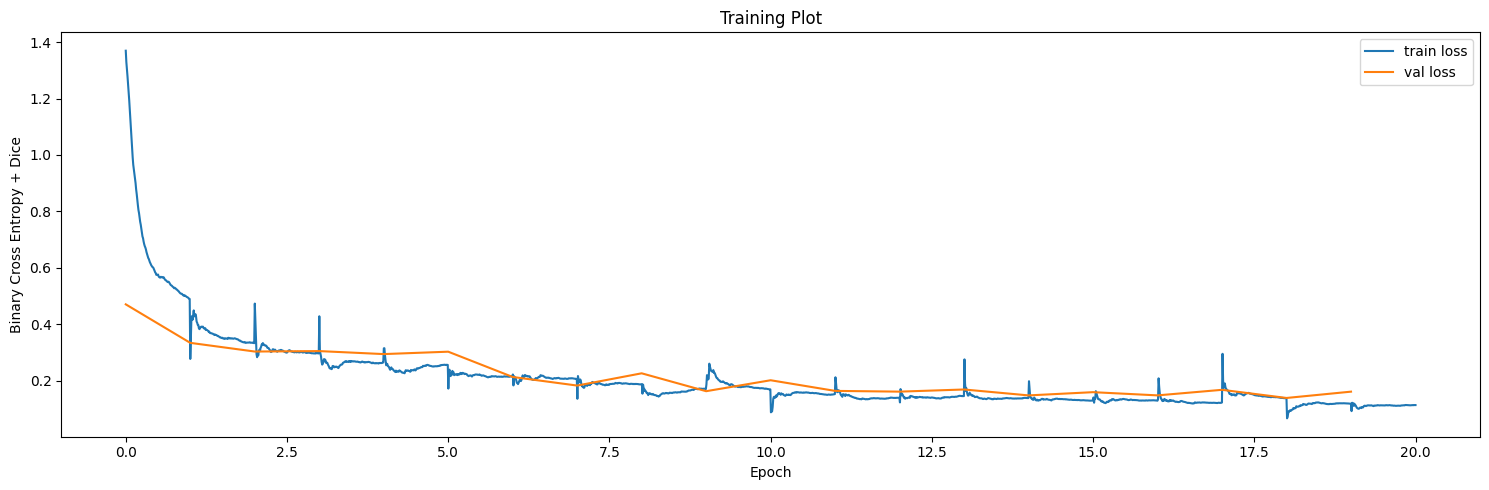

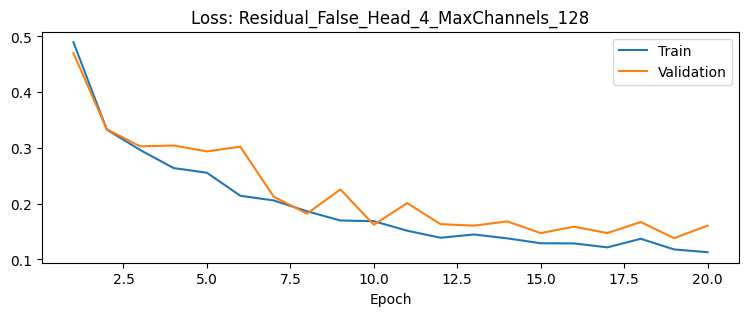

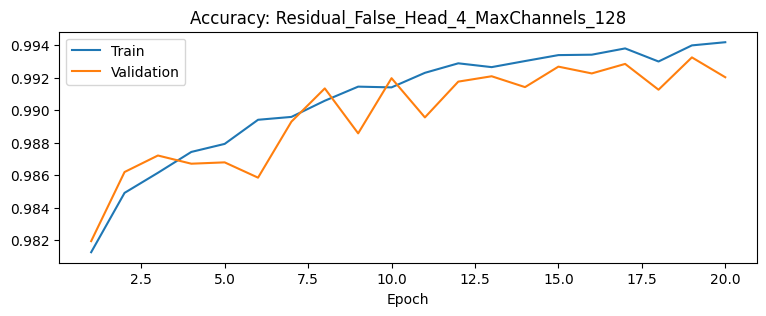

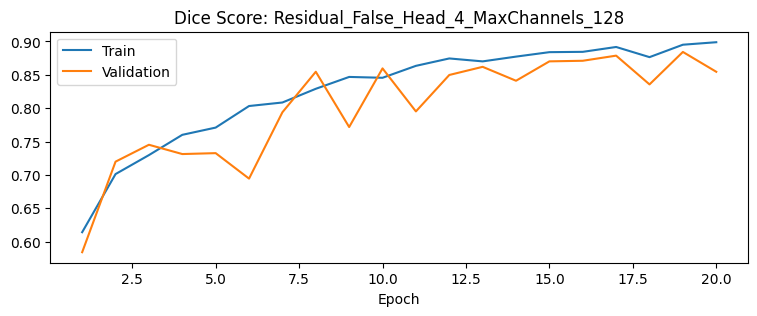

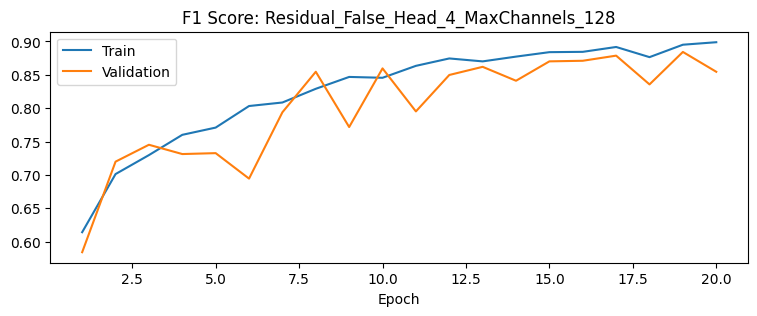

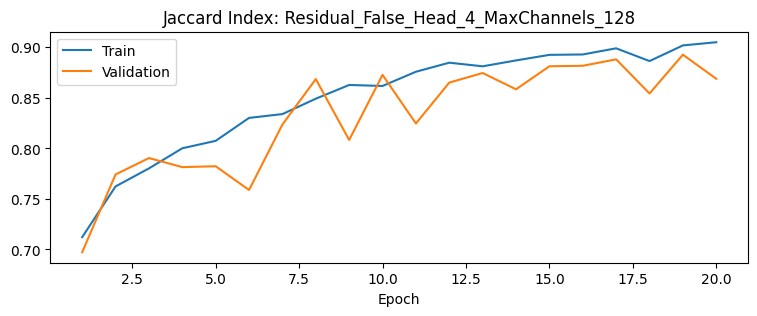

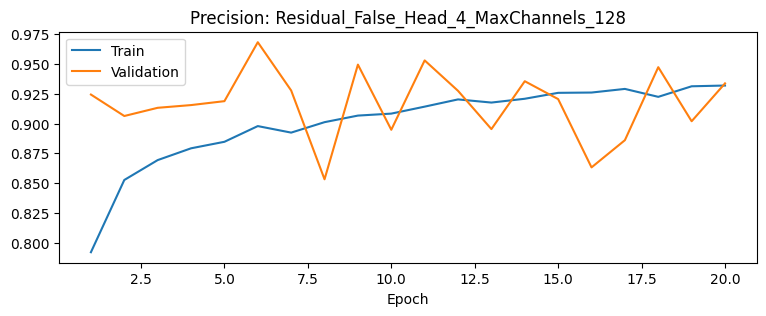

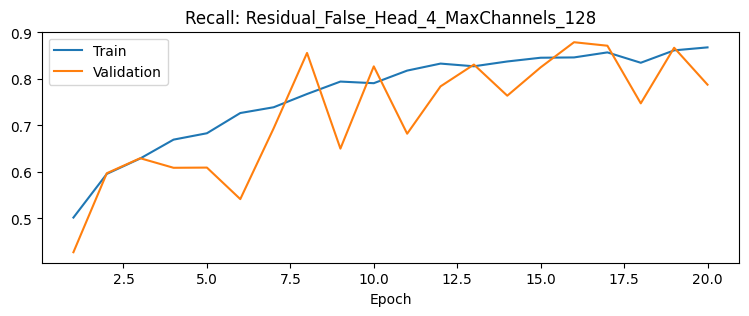

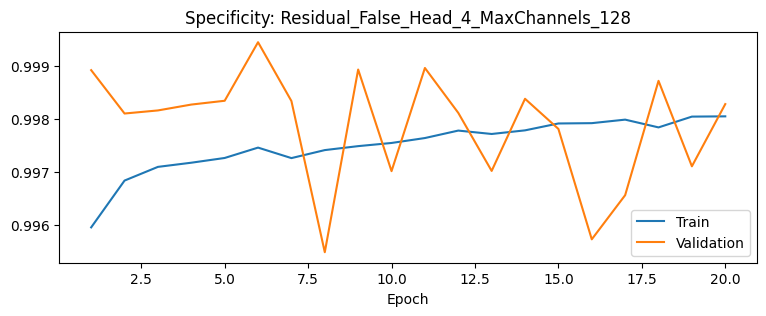

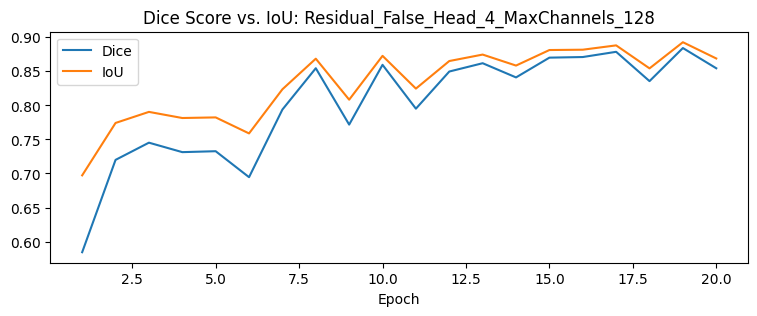

res_False_head_4_ch_256 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.5344]


Training   - Accuracy: 0.9475 | Dice: 0.3699 | IoU: 0.5868 | Loss: 0.7622
Validation - Accuracy: 0.9831 | Dice: 0.6289 | IoU: 0.7207 | Loss: 0.5230

res_False_head_4_ch_256 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.4300]


Training   - Accuracy: 0.9837 | Dice: 0.6684 | IoU: 0.7427 | Loss: 0.4236
Validation - Accuracy: 0.9842 | Dice: 0.6765 | IoU: 0.7475 | Loss: 0.4232

res_False_head_4_ch_256 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.5124]


Training   - Accuracy: 0.9855 | Dice: 0.7127 | IoU: 0.7694 | Loss: 0.3419
Validation - Accuracy: 0.9814 | Dice: 0.5547 | IoU: 0.6825 | Loss: 0.5021

res_False_head_4_ch_256 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.71it/s, Acc=0.9800, Dice=0.0889, IoU=0.5132, Loss=0.2860]


Training   - Accuracy: 0.9855 | Dice: 0.7137 | IoU: 0.7700 | Loss: 0.3207
Validation - Accuracy: 0.9881 | Dice: 0.7834 | IoU: 0.8159 | Loss: 0.2784

res_False_head_4_ch_256 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.73it/s, Acc=0.9859, Dice=0.5018, IoU=0.6604, Loss=0.2712]


Training   - Accuracy: 0.9881 | Dice: 0.7753 | IoU: 0.8104 | Loss: 0.2556
Validation - Accuracy: 0.9878 | Dice: 0.7626 | IoU: 0.8019 | Loss: 0.2697

res_False_head_4_ch_256 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9860, Dice=0.5040, IoU=0.6614, Loss=0.2414]


Training   - Accuracy: 0.9881 | Dice: 0.7750 | IoU: 0.8103 | Loss: 0.2461
Validation - Accuracy: 0.9893 | Dice: 0.8084 | IoU: 0.8337 | Loss: 0.2385

res_False_head_4_ch_256 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.73it/s, Acc=0.9871, Dice=0.5596, IoU=0.6877, Loss=0.2106]


Training   - Accuracy: 0.9885 | Dice: 0.7860 | IoU: 0.8178 | Loss: 0.2368
Validation - Accuracy: 0.9899 | Dice: 0.8133 | IoU: 0.8375 | Loss: 0.2088

res_False_head_4_ch_256 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9907, Dice=0.7213, IoU=0.7773, Loss=0.2147]


Training   - Accuracy: 0.9895 | Dice: 0.8061 | IoU: 0.8322 | Loss: 0.2132
Validation - Accuracy: 0.9898 | Dice: 0.8298 | IoU: 0.8493 | Loss: 0.2150

res_False_head_4_ch_256 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9815, Dice=0.2114, IoU=0.5498, Loss=0.2947]


Training   - Accuracy: 0.9902 | Dice: 0.8220 | IoU: 0.8439 | Loss: 0.1993
Validation - Accuracy: 0.9852 | Dice: 0.6858 | IoU: 0.7534 | Loss: 0.2912

res_False_head_4_ch_256 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.68it/s, Acc=0.9904, Dice=0.7088, IoU=0.7696, Loss=0.1911]


Training   - Accuracy: 0.9902 | Dice: 0.8211 | IoU: 0.8432 | Loss: 0.1959
Validation - Accuracy: 0.9910 | Dice: 0.8468 | IoU: 0.8625 | Loss: 0.1904

res_False_head_4_ch_256 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9912, Dice=0.7370, IoU=0.7873, Loss=0.2238]


Training   - Accuracy: 0.9914 | Dice: 0.8468 | IoU: 0.8628 | Loss: 0.1689
Validation - Accuracy: 0.9894 | Dice: 0.7929 | IoU: 0.8230 | Loss: 0.2244

res_False_head_4_ch_256 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.71it/s, Acc=0.9905, Dice=0.7110, IoU=0.7710, Loss=0.1813]

Training   - Accuracy: 0.9920 | Dice: 0.8584 | IoU: 0.8719 | Loss: 0.1585
Validation - Accuracy: 0.9907 | Dice: 0.8257 | IoU: 0.8468 | Loss: 0.1815

res_False_head_4_ch_256 - Epoch 13/20



Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9934, Dice=0.8196, IoU=0.8438, Loss=0.1775]


Training   - Accuracy: 0.9924 | Dice: 0.8659 | IoU: 0.8779 | Loss: 0.1497
Validation - Accuracy: 0.9917 | Dice: 0.8636 | IoU: 0.8757 | Loss: 0.1778

res_False_head_4_ch_256 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.71it/s, Acc=0.9960, Dice=0.9034, IoU=0.9098, Loss=0.1647]


Training   - Accuracy: 0.9924 | Dice: 0.8672 | IoU: 0.8789 | Loss: 0.1489
Validation - Accuracy: 0.9921 | Dice: 0.8684 | IoU: 0.8797 | Loss: 0.1658

res_False_head_4_ch_256 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.73it/s, Acc=0.9964, Dice=0.9165, IoU=0.9212, Loss=0.1601]


Training   - Accuracy: 0.9929 | Dice: 0.8739 | IoU: 0.8844 | Loss: 0.1400
Validation - Accuracy: 0.9919 | Dice: 0.8564 | IoU: 0.8703 | Loss: 0.1612

res_False_head_4_ch_256 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.70it/s, Acc=0.9957, Dice=0.8912, IoU=0.8996, Loss=0.1641]


Training   - Accuracy: 0.9928 | Dice: 0.8734 | IoU: 0.8839 | Loss: 0.1418
Validation - Accuracy: 0.9914 | Dice: 0.8416 | IoU: 0.8589 | Loss: 0.1652

res_False_head_4_ch_256 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9855, Dice=0.4711, IoU=0.6468, Loss=0.1803]


Training   - Accuracy: 0.9931 | Dice: 0.8780 | IoU: 0.8877 | Loss: 0.1352
Validation - Accuracy: 0.9918 | Dice: 0.8497 | IoU: 0.8652 | Loss: 0.1746

res_False_head_4_ch_256 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.71it/s, Acc=0.9958, Dice=0.8942, IoU=0.9022, Loss=0.1448]


Training   - Accuracy: 0.9931 | Dice: 0.8787 | IoU: 0.8883 | Loss: 0.1360
Validation - Accuracy: 0.9928 | Dice: 0.8726 | IoU: 0.8833 | Loss: 0.1457

res_False_head_4_ch_256 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.72it/s, Acc=0.9964, Dice=0.9126, IoU=0.9178, Loss=0.1477]


Training   - Accuracy: 0.9933 | Dice: 0.8819 | IoU: 0.8909 | Loss: 0.1330
Validation - Accuracy: 0.9928 | Dice: 0.8766 | IoU: 0.8865 | Loss: 0.1488

res_False_head_4_ch_256 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.71it/s, Acc=0.9927, Dice=0.7966, IoU=0.8273, Loss=0.1578]


Training   - Accuracy: 0.9933 | Dice: 0.8816 | IoU: 0.8906 | Loss: 0.1324
Validation - Accuracy: 0.9922 | Dice: 0.8587 | IoU: 0.8722 | Loss: 0.1577



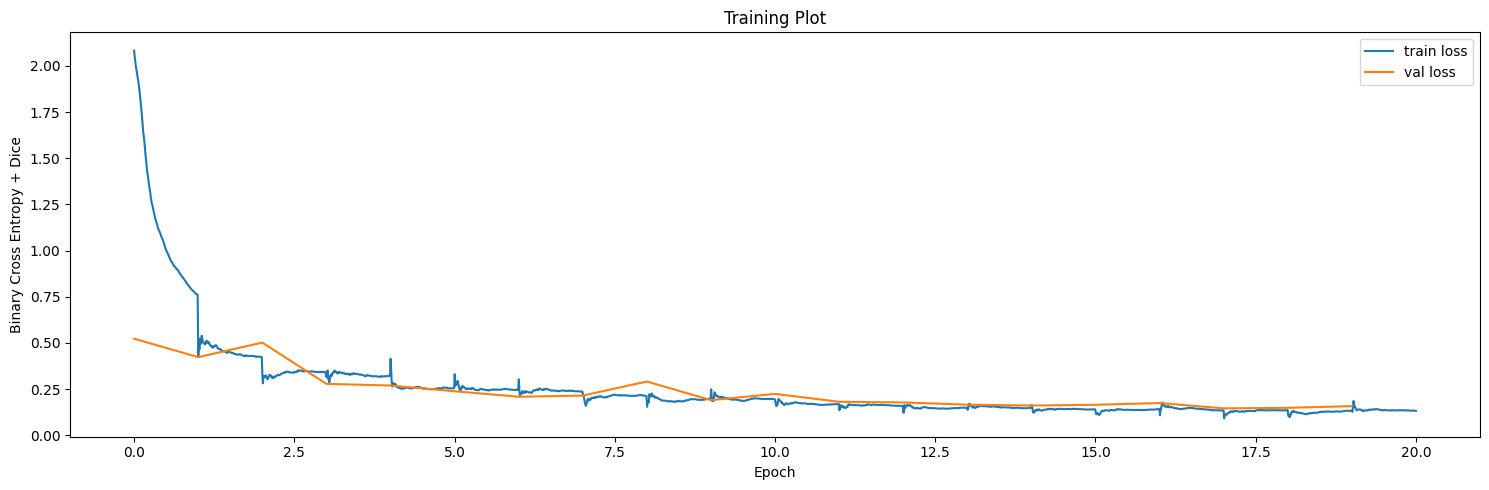

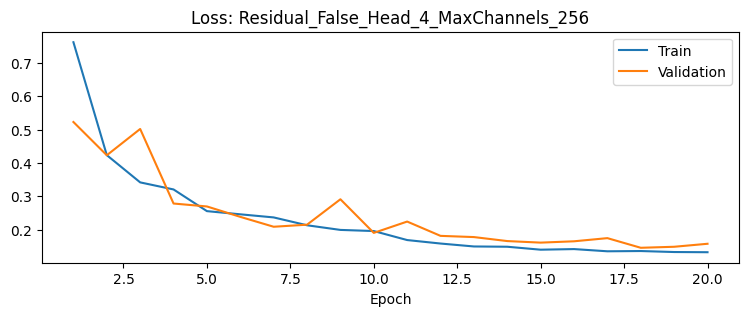

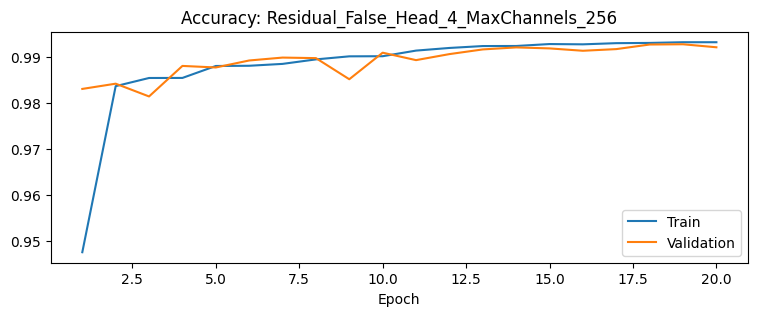

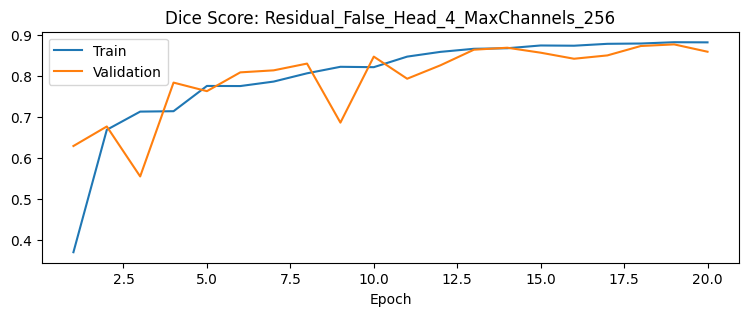

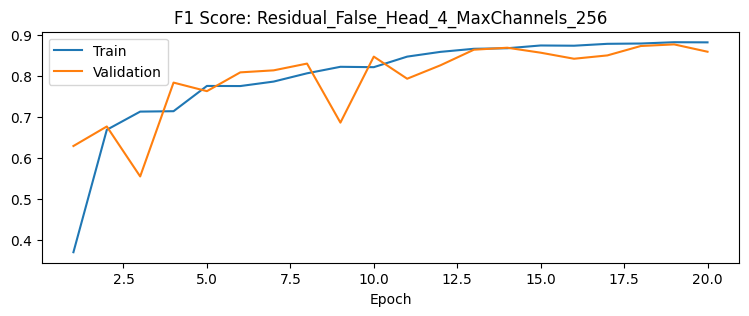

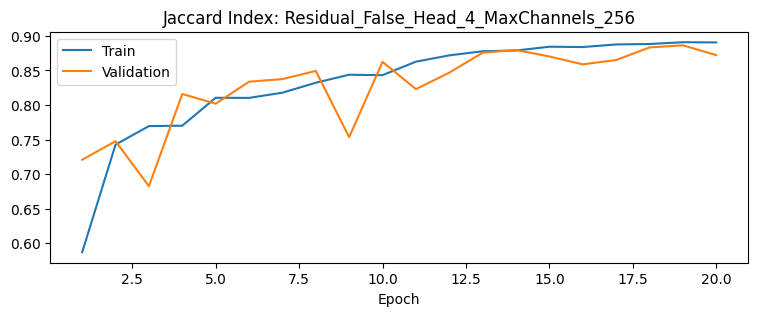

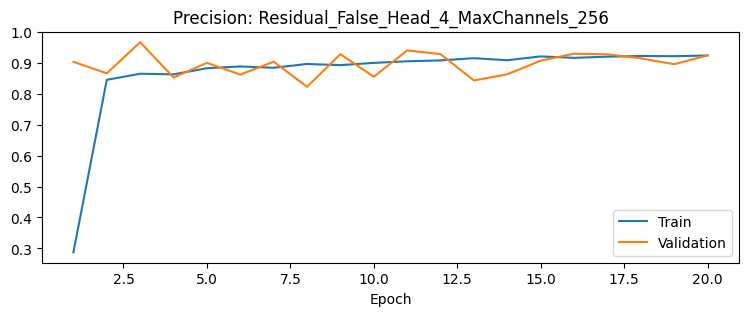

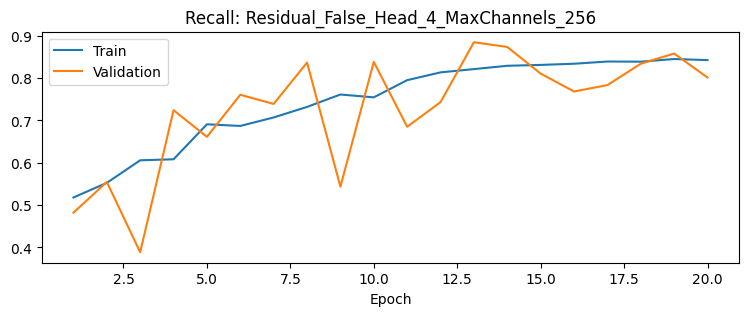

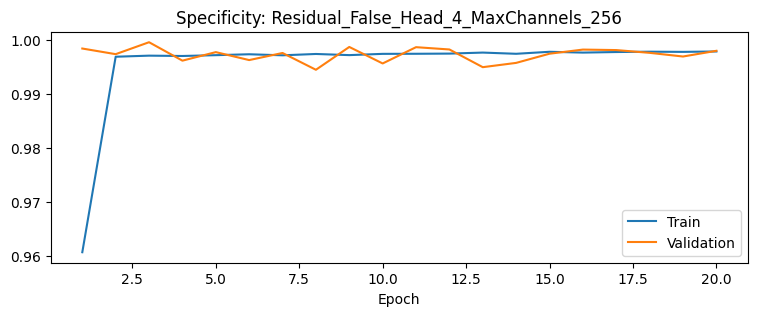

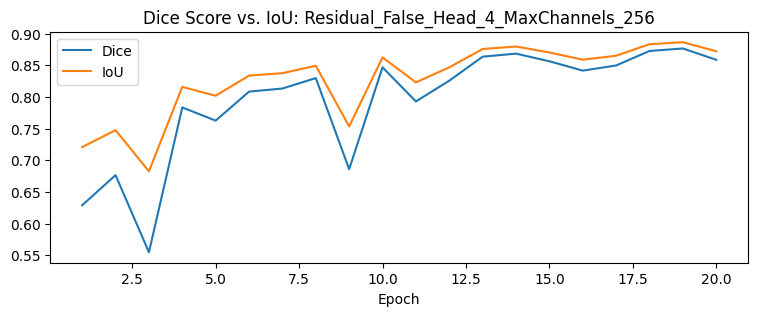

res_False_head_4_ch_512 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.5635]


Training   - Accuracy: 0.9585 | Dice: 0.4092 | IoU: 0.6075 | Loss: 0.7357
Validation - Accuracy: 0.9814 | Dice: 0.5598 | IoU: 0.6849 | Loss: 0.5529

res_False_head_4_ch_512 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3737]


Training   - Accuracy: 0.9830 | Dice: 0.6420 | IoU: 0.7277 | Loss: 0.4321
Validation - Accuracy: 0.9864 | Dice: 0.7359 | IoU: 0.7842 | Loss: 0.3605

res_False_head_4_ch_512 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.64it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3609]


Training   - Accuracy: 0.9848 | Dice: 0.6946 | IoU: 0.7583 | Loss: 0.3516
Validation - Accuracy: 0.9866 | Dice: 0.7515 | IoU: 0.7941 | Loss: 0.3478

res_False_head_4_ch_512 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3307]


Training   - Accuracy: 0.9863 | Dice: 0.7308 | IoU: 0.7809 | Loss: 0.3074
Validation - Accuracy: 0.9871 | Dice: 0.7411 | IoU: 0.7878 | Loss: 0.3175

res_False_head_4_ch_512 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.64it/s, Acc=0.9829, Dice=0.3121, IoU=0.5839, Loss=0.2624]


Training   - Accuracy: 0.9867 | Dice: 0.7449 | IoU: 0.7900 | Loss: 0.2895
Validation - Accuracy: 0.9885 | Dice: 0.7837 | IoU: 0.8163 | Loss: 0.2592

res_False_head_4_ch_512 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9846, Dice=0.4307, IoU=0.6295, Loss=0.2397]


Training   - Accuracy: 0.9871 | Dice: 0.7531 | IoU: 0.7954 | Loss: 0.2743
Validation - Accuracy: 0.9895 | Dice: 0.8104 | IoU: 0.8352 | Loss: 0.2360

res_False_head_4_ch_512 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.63it/s, Acc=0.9854, Dice=0.4751, IoU=0.6484, Loss=0.2176]


Training   - Accuracy: 0.9889 | Dice: 0.7953 | IoU: 0.8244 | Loss: 0.2287
Validation - Accuracy: 0.9899 | Dice: 0.8143 | IoU: 0.8382 | Loss: 0.2144

res_False_head_4_ch_512 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.63it/s, Acc=0.9923, Dice=0.7838, IoU=0.8183, Loss=0.2861]


Training   - Accuracy: 0.9892 | Dice: 0.8003 | IoU: 0.8280 | Loss: 0.2206
Validation - Accuracy: 0.9861 | Dice: 0.7093 | IoU: 0.7677 | Loss: 0.2881

res_False_head_4_ch_512 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.65it/s, Acc=0.9861, Dice=0.5083, IoU=0.6633, Loss=0.2175]


Training   - Accuracy: 0.9902 | Dice: 0.8223 | IoU: 0.8441 | Loss: 0.2003
Validation - Accuracy: 0.9901 | Dice: 0.8189 | IoU: 0.8416 | Loss: 0.2143

res_False_head_4_ch_512 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9943, Dice=0.8548, IoU=0.8703, Loss=0.1952]


Training   - Accuracy: 0.9908 | Dice: 0.8342 | IoU: 0.8531 | Loss: 0.1844
Validation - Accuracy: 0.9901 | Dice: 0.8129 | IoU: 0.8374 | Loss: 0.1960

res_False_head_4_ch_512 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9958, Dice=0.8936, IoU=0.9016, Loss=0.2085]


Training   - Accuracy: 0.9912 | Dice: 0.8429 | IoU: 0.8597 | Loss: 0.1747
Validation - Accuracy: 0.9898 | Dice: 0.8181 | IoU: 0.8409 | Loss: 0.2105

res_False_head_4_ch_512 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.64it/s, Acc=0.9958, Dice=0.8961, IoU=0.9038, Loss=0.1541]


Training   - Accuracy: 0.9917 | Dice: 0.8528 | IoU: 0.8674 | Loss: 0.1631
Validation - Accuracy: 0.9925 | Dice: 0.8721 | IoU: 0.8828 | Loss: 0.1549

res_False_head_4_ch_512 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.65it/s, Acc=0.9930, Dice=0.8032, IoU=0.8320, Loss=0.1969]


Training   - Accuracy: 0.9926 | Dice: 0.8695 | IoU: 0.8808 | Loss: 0.1447
Validation - Accuracy: 0.9907 | Dice: 0.8222 | IoU: 0.8443 | Loss: 0.1973

res_False_head_4_ch_512 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9955, Dice=0.8905, IoU=0.8990, Loss=0.1583]


Training   - Accuracy: 0.9927 | Dice: 0.8709 | IoU: 0.8820 | Loss: 0.1454
Validation - Accuracy: 0.9923 | Dice: 0.8677 | IoU: 0.8792 | Loss: 0.1590

res_False_head_4_ch_512 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.64it/s, Acc=0.9959, Dice=0.9050, IoU=0.9111, Loss=0.1484]


Training   - Accuracy: 0.9933 | Dice: 0.8820 | IoU: 0.8910 | Loss: 0.1312
Validation - Accuracy: 0.9925 | Dice: 0.8678 | IoU: 0.8794 | Loss: 0.1490

res_False_head_4_ch_512 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.65it/s, Acc=0.9965, Dice=0.9187, IoU=0.9230, Loss=0.1460]


Training   - Accuracy: 0.9932 | Dice: 0.8800 | IoU: 0.8894 | Loss: 0.1350
Validation - Accuracy: 0.9925 | Dice: 0.8682 | IoU: 0.8797 | Loss: 0.1467

res_False_head_4_ch_512 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.64it/s, Acc=0.9954, Dice=0.8831, IoU=0.8930, Loss=0.1439]


Training   - Accuracy: 0.9935 | Dice: 0.8857 | IoU: 0.8940 | Loss: 0.1292
Validation - Accuracy: 0.9929 | Dice: 0.8747 | IoU: 0.8850 | Loss: 0.1445

res_False_head_4_ch_512 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.64it/s, Acc=0.9936, Dice=0.8258, IoU=0.8484, Loss=0.1477]


Training   - Accuracy: 0.9936 | Dice: 0.8873 | IoU: 0.8954 | Loss: 0.1269
Validation - Accuracy: 0.9926 | Dice: 0.8691 | IoU: 0.8805 | Loss: 0.1477

res_False_head_4_ch_512 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.65it/s, Acc=0.9960, Dice=0.9063, IoU=0.9123, Loss=0.1480]


Training   - Accuracy: 0.9931 | Dice: 0.8794 | IoU: 0.8888 | Loss: 0.1344
Validation - Accuracy: 0.9930 | Dice: 0.8828 | IoU: 0.8915 | Loss: 0.1486

res_False_head_4_ch_512 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.65it/s, Acc=0.9949, Dice=0.8672, IoU=0.8802, Loss=0.1518]


Training   - Accuracy: 0.9940 | Dice: 0.8951 | IoU: 0.9020 | Loss: 0.1174
Validation - Accuracy: 0.9924 | Dice: 0.8610 | IoU: 0.8741 | Loss: 0.1521



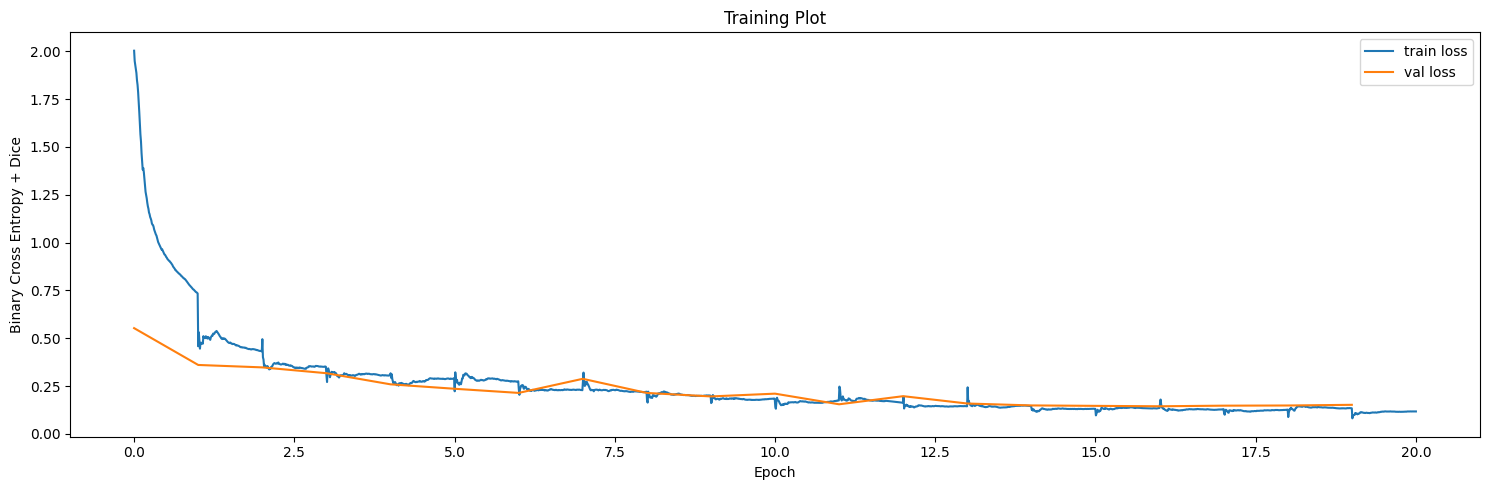

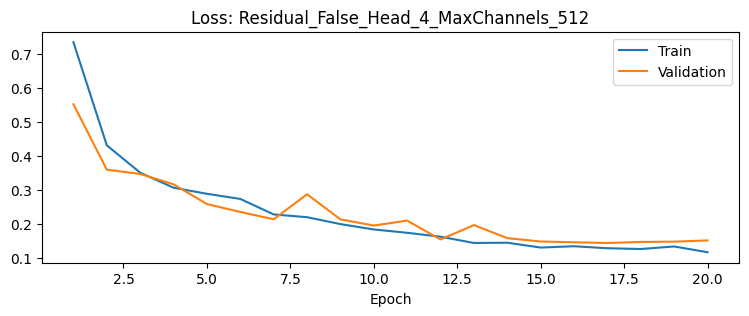

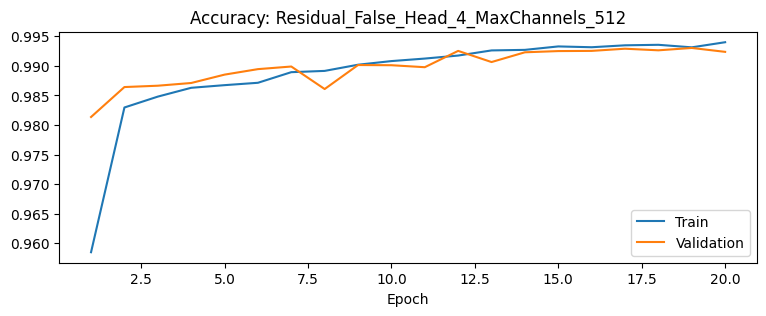

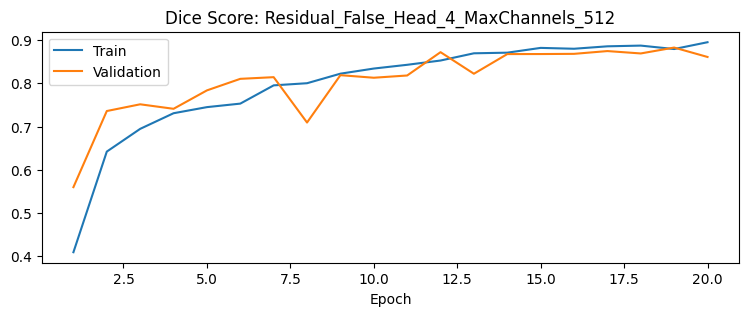

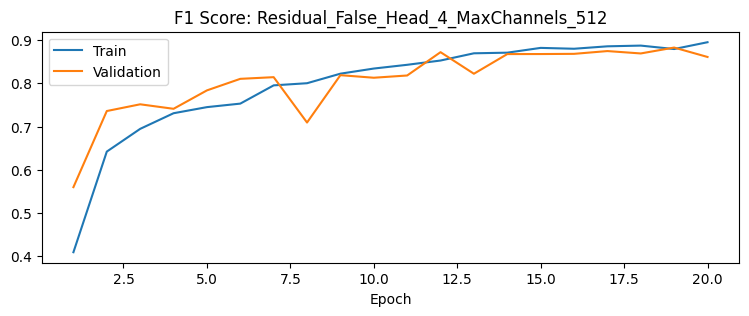

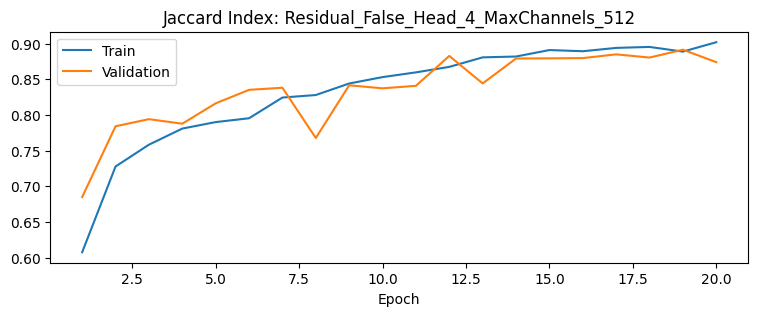

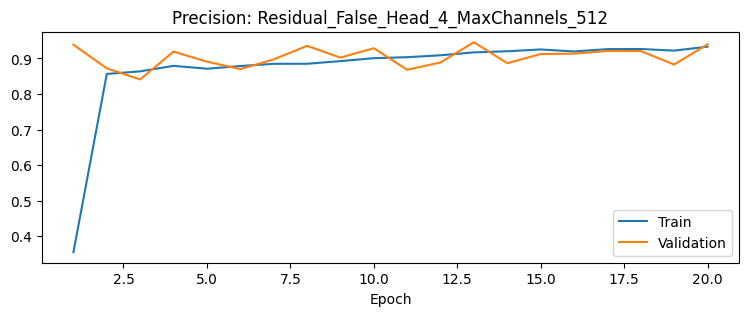

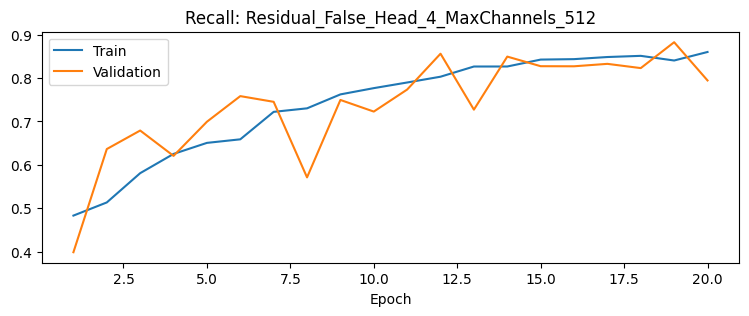

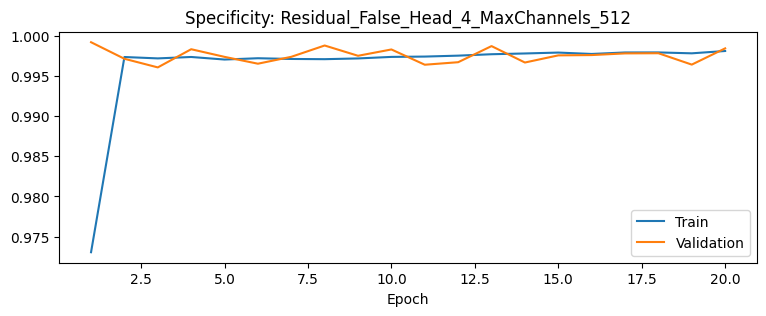

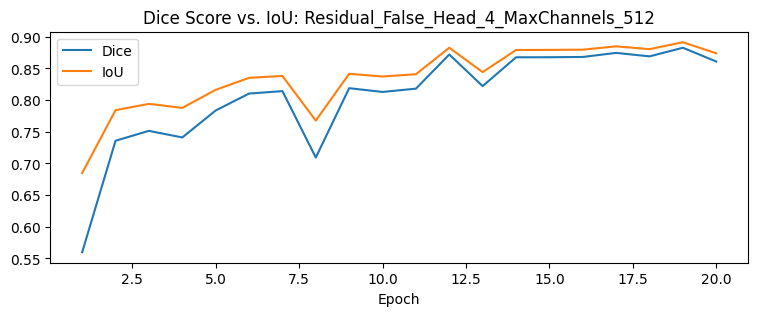

res_True_head_4_ch_128 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.16it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3905]


Training   - Accuracy: 0.9817 | Dice: 0.6159 | IoU: 0.7132 | Loss: 0.4422
Validation - Accuracy: 0.9847 | Dice: 0.6752 | IoU: 0.7470 | Loss: 0.3783

res_True_head_4_ch_128 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9898, Dice=0.6860, IoU=0.7559, Loss=0.2652]

Training   - Accuracy: 0.9874 | Dice: 0.7624 | IoU: 0.8016 | Loss: 0.2670
Validation - Accuracy: 0.9874 | Dice: 0.7874 | IoU: 0.8183 | Loss: 0.2656

res_True_head_4_ch_128 - Epoch 3/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.17it/s, Acc=0.9945, Dice=0.8588, IoU=0.8734, Loss=0.2188]

Training   - Accuracy: 0.9886 | Dice: 0.7906 | IoU: 0.8211 | Loss: 0.2314
Validation - Accuracy: 0.9895 | Dice: 0.8205 | IoU: 0.8424 | Loss: 0.2202

res_True_head_4_ch_128 - Epoch 4/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9936, Dice=0.8274, IoU=0.8495, Loss=0.2182]

Training   - Accuracy: 0.9897 | Dice: 0.8132 | IoU: 0.8373 | Loss: 0.2057
Validation - Accuracy: 0.9893 | Dice: 0.7949 | IoU: 0.8244 | Loss: 0.2193

res_True_head_4_ch_128 - Epoch 5/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.17it/s, Acc=0.9867, Dice=0.5395, IoU=0.6780, Loss=0.2041]


Training   - Accuracy: 0.9900 | Dice: 0.8200 | IoU: 0.8423 | Loss: 0.2003
Validation - Accuracy: 0.9903 | Dice: 0.8329 | IoU: 0.8519 | Loss: 0.2018

res_True_head_4_ch_128 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.16it/s, Acc=0.9927, Dice=0.7966, IoU=0.8273, Loss=0.1819]

Training   - Accuracy: 0.9906 | Dice: 0.8320 | IoU: 0.8513 | Loss: 0.1876
Validation - Accuracy: 0.9914 | Dice: 0.8557 | IoU: 0.8695 | Loss: 0.1821

res_True_head_4_ch_128 - Epoch 7/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9957, Dice=0.8984, IoU=0.9056, Loss=0.1647]

Training   - Accuracy: 0.9918 | Dice: 0.8545 | IoU: 0.8688 | Loss: 0.1601
Validation - Accuracy: 0.9919 | Dice: 0.8577 | IoU: 0.8713 | Loss: 0.1656

res_True_head_4_ch_128 - Epoch 8/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.17it/s, Acc=0.9931, Dice=0.8057, IoU=0.8338, Loss=0.1557]


Training   - Accuracy: 0.9923 | Dice: 0.8639 | IoU: 0.8763 | Loss: 0.1523
Validation - Accuracy: 0.9925 | Dice: 0.8680 | IoU: 0.8795 | Loss: 0.1558

res_True_head_4_ch_128 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.16it/s, Acc=0.9963, Dice=0.9084, IoU=0.9142, Loss=0.1465]


Training   - Accuracy: 0.9926 | Dice: 0.8695 | IoU: 0.8808 | Loss: 0.1467
Validation - Accuracy: 0.9926 | Dice: 0.8698 | IoU: 0.8810 | Loss: 0.1475

res_True_head_4_ch_128 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9961, Dice=0.9076, IoU=0.9134, Loss=0.1595]

Training   - Accuracy: 0.9933 | Dice: 0.8824 | IoU: 0.8913 | Loss: 0.1300
Validation - Accuracy: 0.9918 | Dice: 0.8490 | IoU: 0.8646 | Loss: 0.1603

res_True_head_4_ch_128 - Epoch 11/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9917, Dice=0.7580, IoU=0.8010, Loss=0.1614]

Training   - Accuracy: 0.9929 | Dice: 0.8749 | IoU: 0.8852 | Loss: 0.1396
Validation - Accuracy: 0.9919 | Dice: 0.8523 | IoU: 0.8671 | Loss: 0.1607

res_True_head_4_ch_128 - Epoch 12/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.17it/s, Acc=0.9949, Dice=0.8648, IoU=0.8783, Loss=0.1385]


Training   - Accuracy: 0.9936 | Dice: 0.8876 | IoU: 0.8957 | Loss: 0.1244
Validation - Accuracy: 0.9930 | Dice: 0.8767 | IoU: 0.8866 | Loss: 0.1389

res_True_head_4_ch_128 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9926, Dice=0.7874, IoU=0.8209, Loss=0.1490]

Training   - Accuracy: 0.9937 | Dice: 0.8903 | IoU: 0.8980 | Loss: 0.1228
Validation - Accuracy: 0.9925 | Dice: 0.8634 | IoU: 0.8759 | Loss: 0.1488

res_True_head_4_ch_128 - Epoch 14/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.17it/s, Acc=0.9965, Dice=0.9156, IoU=0.9203, Loss=0.1315]


Training   - Accuracy: 0.9939 | Dice: 0.8939 | IoU: 0.9010 | Loss: 0.1176
Validation - Accuracy: 0.9935 | Dice: 0.8887 | IoU: 0.8966 | Loss: 0.1322

res_True_head_4_ch_128 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.16it/s, Acc=0.9960, Dice=0.9002, IoU=0.9072, Loss=0.1349]


Training   - Accuracy: 0.9939 | Dice: 0.8924 | IoU: 0.8997 | Loss: 0.1207
Validation - Accuracy: 0.9934 | Dice: 0.8862 | IoU: 0.8944 | Loss: 0.1357

res_True_head_4_ch_128 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9947, Dice=0.8578, IoU=0.8728, Loss=0.1387]

Training   - Accuracy: 0.9936 | Dice: 0.8871 | IoU: 0.8952 | Loss: 0.1260
Validation - Accuracy: 0.9931 | Dice: 0.8804 | IoU: 0.8897 | Loss: 0.1392

res_True_head_4_ch_128 - Epoch 17/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.14it/s, Acc=0.9972, Dice=0.9350, IoU=0.9375, Loss=0.1341]

Training   - Accuracy: 0.9940 | Dice: 0.8951 | IoU: 0.9020 | Loss: 0.1156
Validation - Accuracy: 0.9933 | Dice: 0.8830 | IoU: 0.8918 | Loss: 0.1351

res_True_head_4_ch_128 - Epoch 18/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9972, Dice=0.9298, IoU=0.9329, Loss=0.1295]

Training   - Accuracy: 0.9944 | Dice: 0.9027 | IoU: 0.9085 | Loss: 0.1091
Validation - Accuracy: 0.9936 | Dice: 0.8919 | IoU: 0.8992 | Loss: 0.1307

res_True_head_4_ch_128 - Epoch 19/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9968, Dice=0.9220, IoU=0.9260, Loss=0.1375]

Training   - Accuracy: 0.9948 | Dice: 0.9092 | IoU: 0.9141 | Loss: 0.1008
Validation - Accuracy: 0.9933 | Dice: 0.8838 | IoU: 0.8924 | Loss: 0.1386

res_True_head_4_ch_128 - Epoch 20/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.15it/s, Acc=0.9957, Dice=0.8901, IoU=0.8988, Loss=0.1362]


Training   - Accuracy: 0.9944 | Dice: 0.9029 | IoU: 0.9086 | Loss: 0.1088
Validation - Accuracy: 0.9933 | Dice: 0.8809 | IoU: 0.8901 | Loss: 0.1369



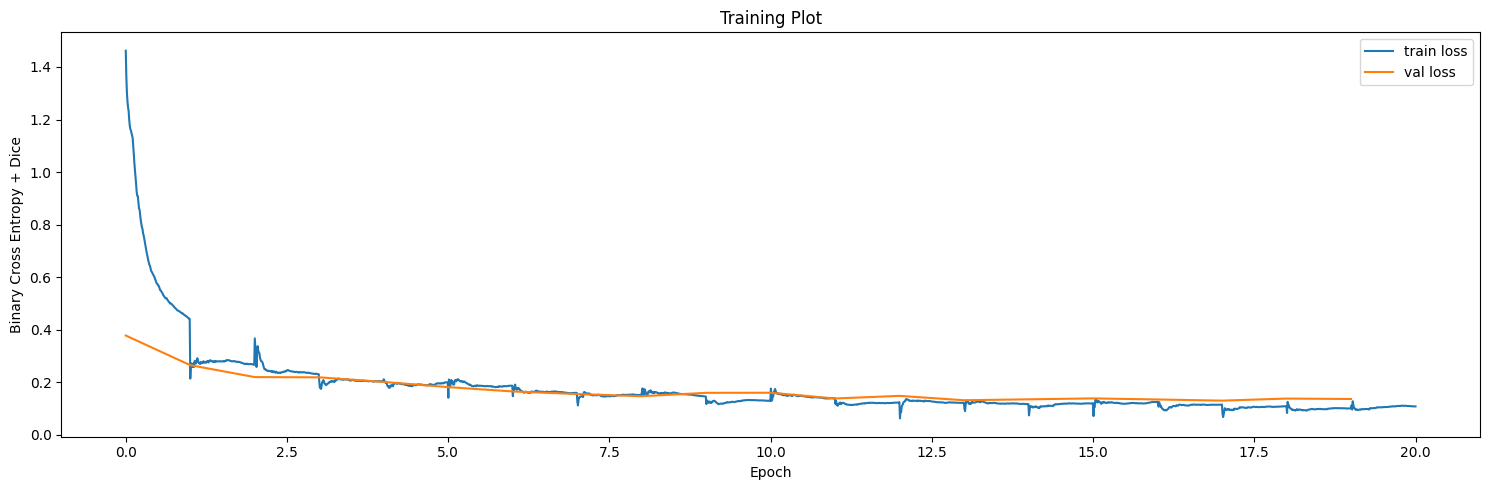

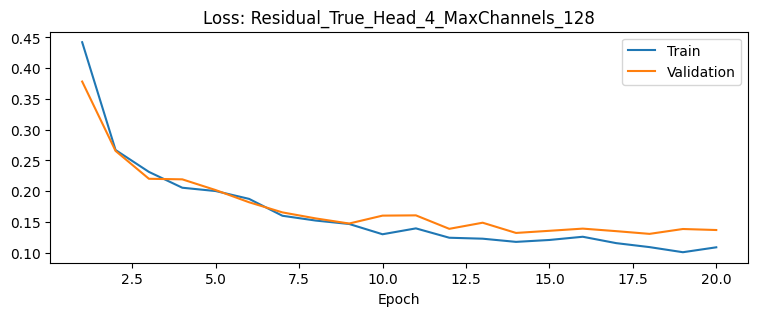

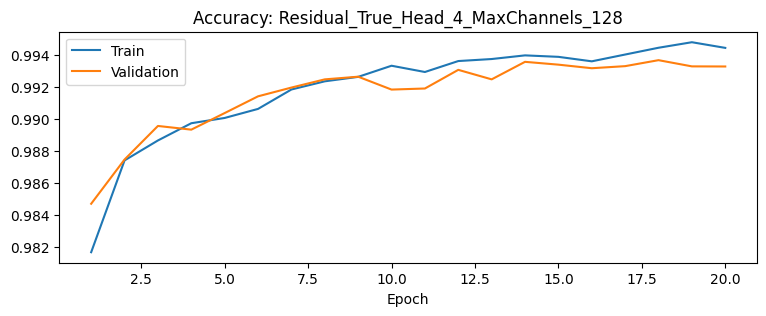

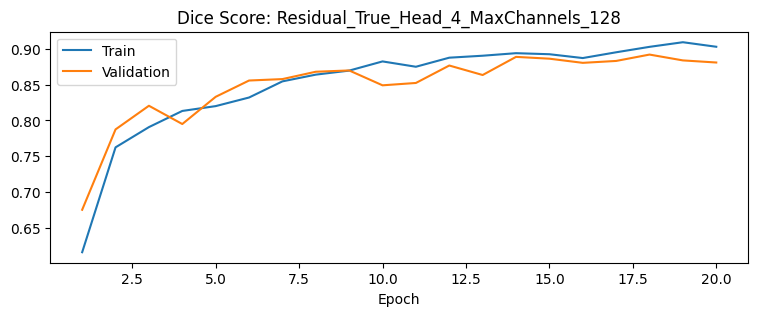

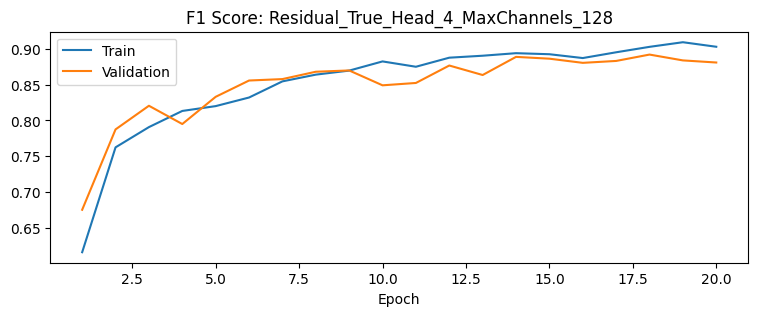

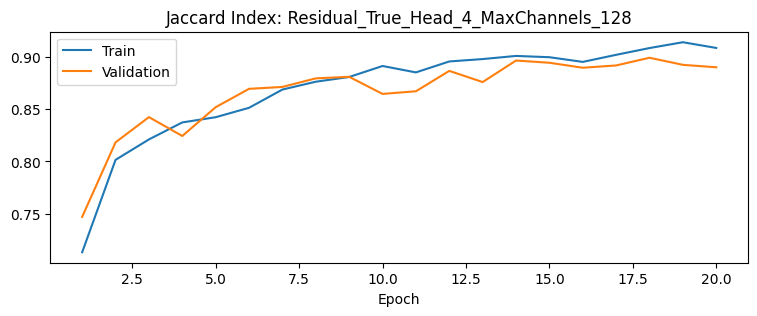

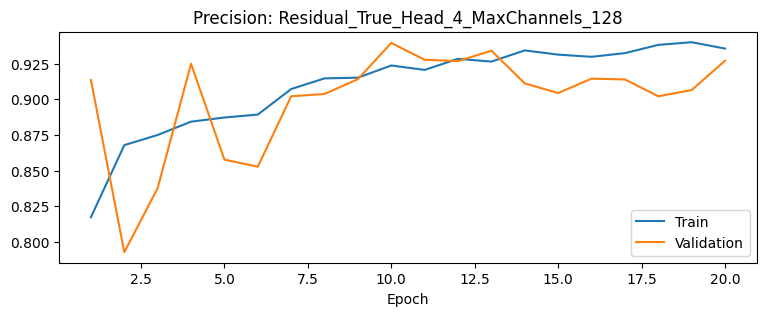

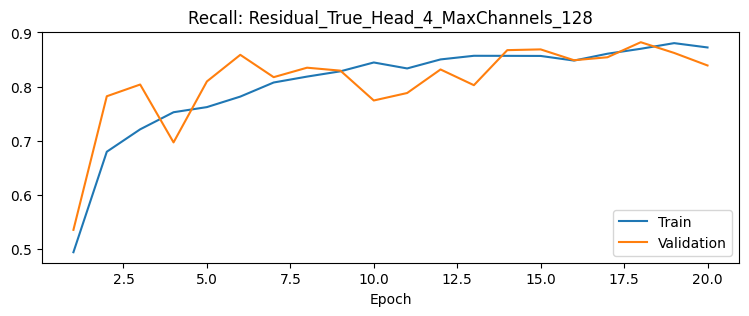

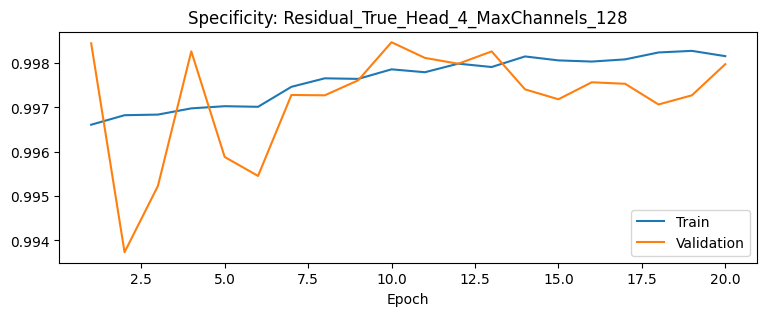

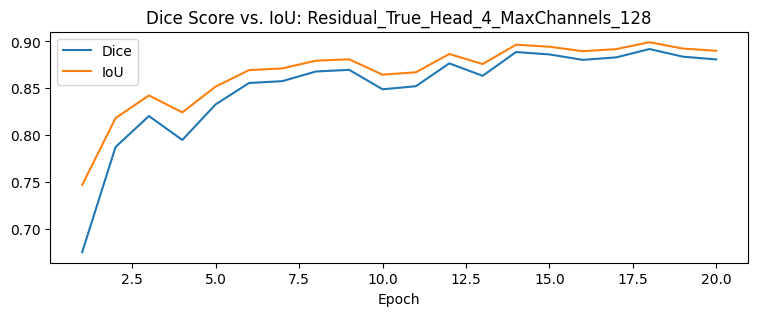

res_True_head_4_ch_256 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3448]


Training   - Accuracy: 0.9761 | Dice: 0.5327 | IoU: 0.6694 | Loss: 0.5132
Validation - Accuracy: 0.9864 | Dice: 0.7354 | IoU: 0.7839 | Loss: 0.3316

res_True_head_4_ch_256 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9827, Dice=0.3049, IoU=0.5813, Loss=0.2742]

Training   - Accuracy: 0.9867 | Dice: 0.7438 | IoU: 0.7892 | Loss: 0.2843
Validation - Accuracy: 0.9881 | Dice: 0.7734 | IoU: 0.8091 | Loss: 0.2700

res_True_head_4_ch_256 - Epoch 3/20



Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9791, Dice=0.0077, IoU=0.4915, Loss=0.2553]


Training   - Accuracy: 0.9881 | Dice: 0.7787 | IoU: 0.8127 | Loss: 0.2456
Validation - Accuracy: 0.9892 | Dice: 0.8120 | IoU: 0.8362 | Loss: 0.2452

res_True_head_4_ch_256 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9819, Dice=0.2449, IoU=0.5607, Loss=0.2805]


Training   - Accuracy: 0.9890 | Dice: 0.7970 | IoU: 0.8257 | Loss: 0.2271
Validation - Accuracy: 0.9876 | Dice: 0.7501 | IoU: 0.7937 | Loss: 0.2746

res_True_head_4_ch_256 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9791, Dice=0.0096, IoU=0.4920, Loss=0.2493]


Training   - Accuracy: 0.9890 | Dice: 0.7970 | IoU: 0.8256 | Loss: 0.2243
Validation - Accuracy: 0.9887 | Dice: 0.7797 | IoU: 0.8137 | Loss: 0.2363

res_True_head_4_ch_256 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9856, Dice=0.4825, IoU=0.6517, Loss=0.2717]


Training   - Accuracy: 0.9905 | Dice: 0.8286 | IoU: 0.8488 | Loss: 0.1901
Validation - Accuracy: 0.9869 | Dice: 0.7282 | IoU: 0.7796 | Loss: 0.2705

res_True_head_4_ch_256 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9880, Dice=0.6048, IoU=0.7107, Loss=0.1731]


Training   - Accuracy: 0.9913 | Dice: 0.8450 | IoU: 0.8613 | Loss: 0.1712
Validation - Accuracy: 0.9915 | Dice: 0.8495 | IoU: 0.8648 | Loss: 0.1713

res_True_head_4_ch_256 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.68it/s, Acc=0.9888, Dice=0.6405, IoU=0.7299, Loss=0.1700]


Training   - Accuracy: 0.9919 | Dice: 0.8573 | IoU: 0.8710 | Loss: 0.1579
Validation - Accuracy: 0.9918 | Dice: 0.8545 | IoU: 0.8688 | Loss: 0.1682

res_True_head_4_ch_256 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9956, Dice=0.8927, IoU=0.9009, Loss=0.1537]


Training   - Accuracy: 0.9925 | Dice: 0.8673 | IoU: 0.8790 | Loss: 0.1476
Validation - Accuracy: 0.9924 | Dice: 0.8686 | IoU: 0.8800 | Loss: 0.1545

res_True_head_4_ch_256 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9957, Dice=0.8918, IoU=0.9002, Loss=0.1562]


Training   - Accuracy: 0.9925 | Dice: 0.8667 | IoU: 0.8785 | Loss: 0.1473
Validation - Accuracy: 0.9924 | Dice: 0.8702 | IoU: 0.8812 | Loss: 0.1572

res_True_head_4_ch_256 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9943, Dice=0.8486, IoU=0.8656, Loss=0.1618]


Training   - Accuracy: 0.9931 | Dice: 0.8786 | IoU: 0.8882 | Loss: 0.1352
Validation - Accuracy: 0.9916 | Dice: 0.8442 | IoU: 0.8609 | Loss: 0.1624

res_True_head_4_ch_256 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9956, Dice=0.8917, IoU=0.9001, Loss=0.1459]


Training   - Accuracy: 0.9937 | Dice: 0.8889 | IoU: 0.8968 | Loss: 0.1244
Validation - Accuracy: 0.9924 | Dice: 0.8622 | IoU: 0.8750 | Loss: 0.1468

res_True_head_4_ch_256 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9951, Dice=0.8752, IoU=0.8866, Loss=0.1414]

Training   - Accuracy: 0.9937 | Dice: 0.8896 | IoU: 0.8973 | Loss: 0.1228
Validation - Accuracy: 0.9929 | Dice: 0.8737 | IoU: 0.8842 | Loss: 0.1419

res_True_head_4_ch_256 - Epoch 14/20



Validation: 100%|██████████| 35/35 [00:13<00:00,  2.68it/s, Acc=0.9963, Dice=0.9157, IoU=0.9203, Loss=0.1460]


Training   - Accuracy: 0.9938 | Dice: 0.8906 | IoU: 0.8982 | Loss: 0.1234
Validation - Accuracy: 0.9927 | Dice: 0.8704 | IoU: 0.8815 | Loss: 0.1465

res_True_head_4_ch_256 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9957, Dice=0.8918, IoU=0.9002, Loss=0.1350]


Training   - Accuracy: 0.9939 | Dice: 0.8939 | IoU: 0.9009 | Loss: 0.1187
Validation - Accuracy: 0.9934 | Dice: 0.8884 | IoU: 0.8963 | Loss: 0.1355

res_True_head_4_ch_256 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9954, Dice=0.8848, IoU=0.8944, Loss=0.1498]


Training   - Accuracy: 0.9940 | Dice: 0.8942 | IoU: 0.9012 | Loss: 0.1160
Validation - Accuracy: 0.9923 | Dice: 0.8599 | IoU: 0.8732 | Loss: 0.1506

res_True_head_4_ch_256 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9899, Dice=0.6897, IoU=0.7581, Loss=0.1386]

Training   - Accuracy: 0.9943 | Dice: 0.9010 | IoU: 0.9070 | Loss: 0.1121
Validation - Accuracy: 0.9932 | Dice: 0.8810 | IoU: 0.8902 | Loss: 0.1364

res_True_head_4_ch_256 - Epoch 18/20



Validation: 100%|██████████| 35/35 [00:13<00:00,  2.67it/s, Acc=0.9955, Dice=0.8866, IoU=0.8959, Loss=0.1306]


Training   - Accuracy: 0.9945 | Dice: 0.9043 | IoU: 0.9098 | Loss: 0.1070
Validation - Accuracy: 0.9934 | Dice: 0.8851 | IoU: 0.8936 | Loss: 0.1310

res_True_head_4_ch_256 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.66it/s, Acc=0.9964, Dice=0.9166, IoU=0.9212, Loss=0.1285]


Training   - Accuracy: 0.9948 | Dice: 0.9092 | IoU: 0.9141 | Loss: 0.1016
Validation - Accuracy: 0.9938 | Dice: 0.8954 | IoU: 0.9021 | Loss: 0.1291

res_True_head_4_ch_256 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.68it/s, Acc=0.9965, Dice=0.9151, IoU=0.9199, Loss=0.1381]


Training   - Accuracy: 0.9948 | Dice: 0.9095 | IoU: 0.9144 | Loss: 0.1000
Validation - Accuracy: 0.9931 | Dice: 0.8790 | IoU: 0.8885 | Loss: 0.1390



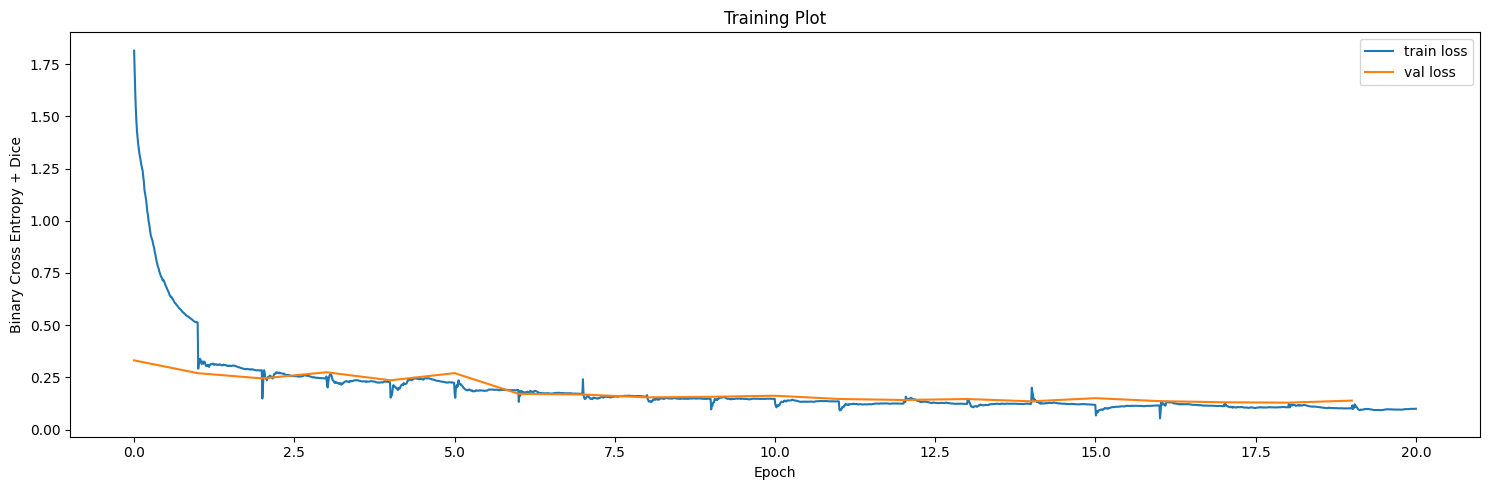

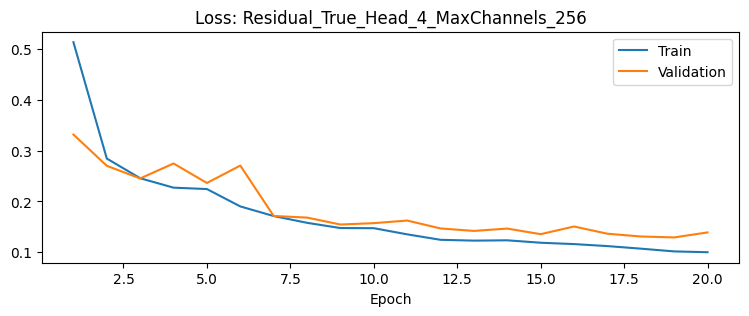

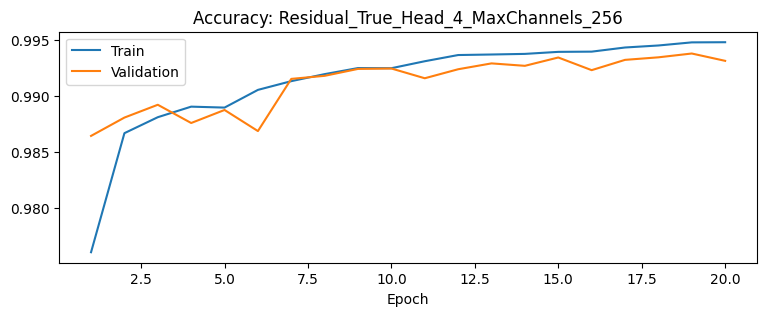

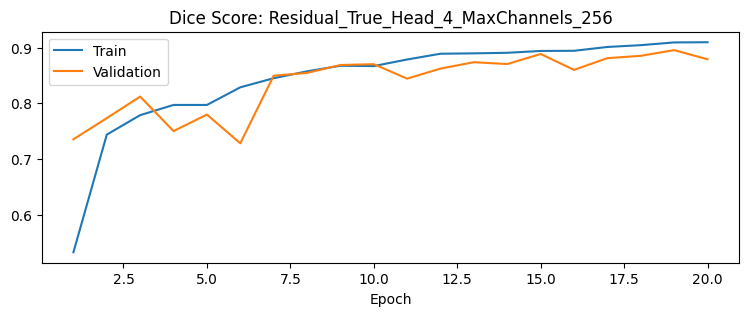

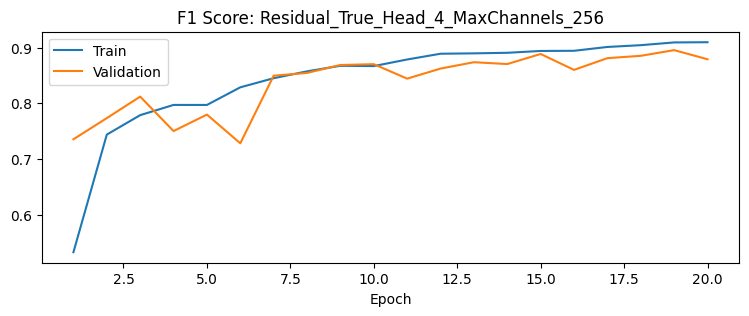

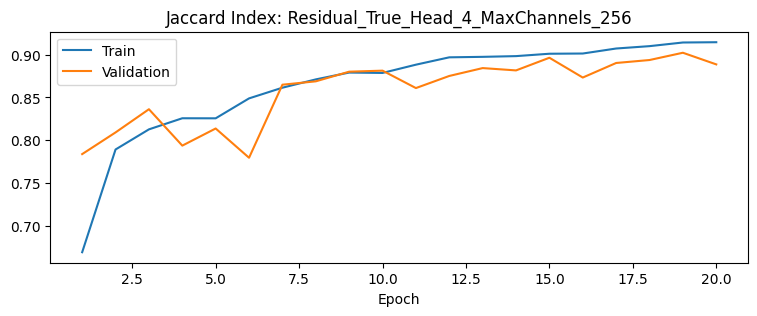

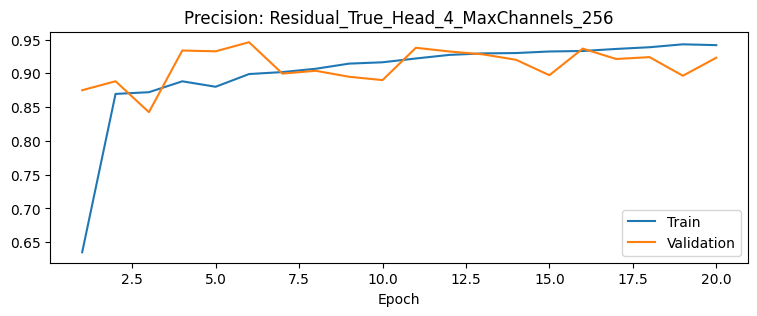

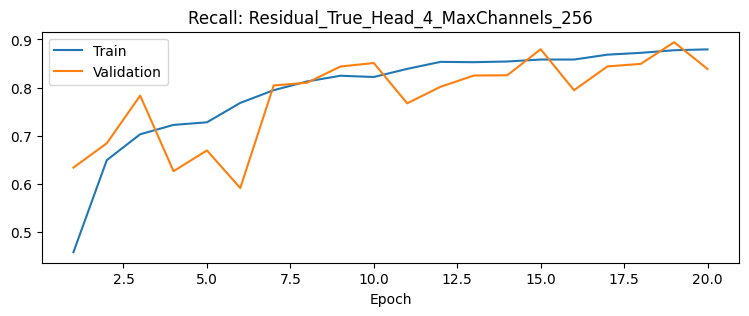

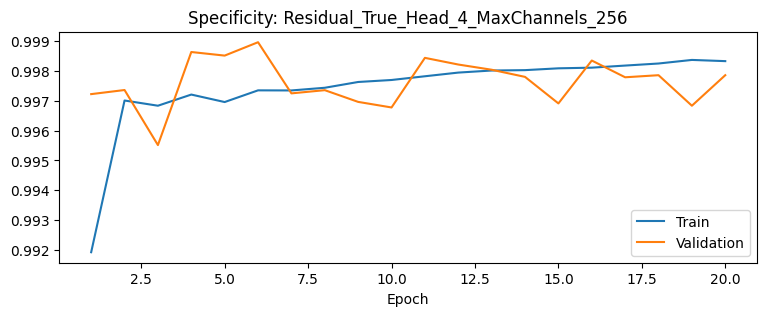

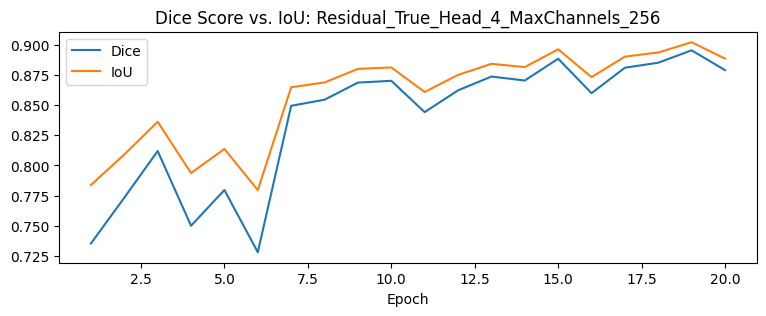

res_True_head_4_ch_512 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.62it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.4719]


Training   - Accuracy: 0.9819 | Dice: 0.6224 | IoU: 0.7167 | Loss: 0.4306
Validation - Accuracy: 0.9820 | Dice: 0.5831 | IoU: 0.6966 | Loss: 0.4612

res_True_head_4_ch_512 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.60it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3154]


Training   - Accuracy: 0.9867 | Dice: 0.7451 | IoU: 0.7901 | Loss: 0.2822
Validation - Accuracy: 0.9867 | Dice: 0.7704 | IoU: 0.8065 | Loss: 0.3011

res_True_head_4_ch_512 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.58it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3103]


Training   - Accuracy: 0.9877 | Dice: 0.7677 | IoU: 0.8052 | Loss: 0.2565
Validation - Accuracy: 0.9876 | Dice: 0.7641 | IoU: 0.8028 | Loss: 0.2968

res_True_head_4_ch_512 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.62it/s, Acc=0.9943, Dice=0.8520, IoU=0.8682, Loss=0.2171]


Training   - Accuracy: 0.9892 | Dice: 0.8016 | IoU: 0.8289 | Loss: 0.2167
Validation - Accuracy: 0.9897 | Dice: 0.8294 | IoU: 0.8490 | Loss: 0.2187

res_True_head_4_ch_512 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.62it/s, Acc=0.9952, Dice=0.8804, IoU=0.8907, Loss=0.1978]


Training   - Accuracy: 0.9901 | Dice: 0.8205 | IoU: 0.8427 | Loss: 0.1986
Validation - Accuracy: 0.9905 | Dice: 0.8221 | IoU: 0.8441 | Loss: 0.1991

res_True_head_4_ch_512 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.61it/s, Acc=0.9962, Dice=0.9088, IoU=0.9145, Loss=0.1723]


Training   - Accuracy: 0.9912 | Dice: 0.8426 | IoU: 0.8595 | Loss: 0.1728
Validation - Accuracy: 0.9916 | Dice: 0.8568 | IoU: 0.8704 | Loss: 0.1735

res_True_head_4_ch_512 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.58it/s, Acc=0.9909, Dice=0.7264, IoU=0.7805, Loss=0.1768]


Training   - Accuracy: 0.9915 | Dice: 0.8490 | IoU: 0.8645 | Loss: 0.1702
Validation - Accuracy: 0.9912 | Dice: 0.8394 | IoU: 0.8572 | Loss: 0.1760

res_True_head_4_ch_512 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.57it/s, Acc=0.9942, Dice=0.8431, IoU=0.8615, Loss=0.1580]


Training   - Accuracy: 0.9921 | Dice: 0.8607 | IoU: 0.8737 | Loss: 0.1544
Validation - Accuracy: 0.9920 | Dice: 0.8573 | IoU: 0.8710 | Loss: 0.1586

res_True_head_4_ch_512 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.62it/s, Acc=0.9905, Dice=0.7134, IoU=0.7724, Loss=0.1835]


Training   - Accuracy: 0.9930 | Dice: 0.8767 | IoU: 0.8866 | Loss: 0.1369
Validation - Accuracy: 0.9908 | Dice: 0.8298 | IoU: 0.8499 | Loss: 0.1833

res_True_head_4_ch_512 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.61it/s, Acc=0.9954, Dice=0.8805, IoU=0.8909, Loss=0.1594]


Training   - Accuracy: 0.9930 | Dice: 0.8769 | IoU: 0.8868 | Loss: 0.1381
Validation - Accuracy: 0.9919 | Dice: 0.8541 | IoU: 0.8686 | Loss: 0.1606

res_True_head_4_ch_512 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.61it/s, Acc=0.9967, Dice=0.9170, IoU=0.9217, Loss=0.1526]


Training   - Accuracy: 0.9936 | Dice: 0.8869 | IoU: 0.8951 | Loss: 0.1264
Validation - Accuracy: 0.9926 | Dice: 0.8754 | IoU: 0.8855 | Loss: 0.1540

res_True_head_4_ch_512 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.58it/s, Acc=0.9945, Dice=0.8507, IoU=0.8673, Loss=0.1525]


Training   - Accuracy: 0.9938 | Dice: 0.8923 | IoU: 0.8996 | Loss: 0.1215
Validation - Accuracy: 0.9921 | Dice: 0.8530 | IoU: 0.8678 | Loss: 0.1531

res_True_head_4_ch_512 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.63it/s, Acc=0.9960, Dice=0.8988, IoU=0.9061, Loss=0.1488]


Training   - Accuracy: 0.9936 | Dice: 0.8883 | IoU: 0.8962 | Loss: 0.1219
Validation - Accuracy: 0.9926 | Dice: 0.8666 | IoU: 0.8785 | Loss: 0.1500

res_True_head_4_ch_512 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.62it/s, Acc=0.9963, Dice=0.9068, IoU=0.9129, Loss=0.1575]


Training   - Accuracy: 0.9943 | Dice: 0.9000 | IoU: 0.9062 | Loss: 0.1132
Validation - Accuracy: 0.9916 | Dice: 0.8435 | IoU: 0.8604 | Loss: 0.1589

res_True_head_4_ch_512 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.61it/s, Acc=0.9967, Dice=0.9203, IoU=0.9245, Loss=0.1789]


Training   - Accuracy: 0.9939 | Dice: 0.8922 | IoU: 0.8995 | Loss: 0.1186
Validation - Accuracy: 0.9913 | Dice: 0.8588 | IoU: 0.8718 | Loss: 0.1806

res_True_head_4_ch_512 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.64it/s, Acc=0.9959, Dice=0.8933, IoU=0.9015, Loss=0.1312]


Training   - Accuracy: 0.9938 | Dice: 0.8910 | IoU: 0.8985 | Loss: 0.1191
Validation - Accuracy: 0.9933 | Dice: 0.8823 | IoU: 0.8913 | Loss: 0.1320

res_True_head_4_ch_512 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.63it/s, Acc=0.9974, Dice=0.9363, IoU=0.9388, Loss=0.1326]


Training   - Accuracy: 0.9946 | Dice: 0.9052 | IoU: 0.9106 | Loss: 0.1055
Validation - Accuracy: 0.9933 | Dice: 0.8796 | IoU: 0.8890 | Loss: 0.1336

res_True_head_4_ch_512 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.62it/s, Acc=0.9972, Dice=0.9353, IoU=0.9378, Loss=0.1271]


Training   - Accuracy: 0.9949 | Dice: 0.9110 | IoU: 0.9156 | Loss: 0.0985
Validation - Accuracy: 0.9937 | Dice: 0.8920 | IoU: 0.8993 | Loss: 0.1279

res_True_head_4_ch_512 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.63it/s, Acc=0.9965, Dice=0.9122, IoU=0.9175, Loss=0.1336]


Training   - Accuracy: 0.9938 | Dice: 0.8915 | IoU: 0.8990 | Loss: 0.1226
Validation - Accuracy: 0.9935 | Dice: 0.8885 | IoU: 0.8963 | Loss: 0.1345

res_True_head_4_ch_512 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:13<00:00,  2.60it/s, Acc=0.9969, Dice=0.9216, IoU=0.9257, Loss=0.1296]


Training   - Accuracy: 0.9944 | Dice: 0.9015 | IoU: 0.9075 | Loss: 0.1091
Validation - Accuracy: 0.9934 | Dice: 0.8835 | IoU: 0.8923 | Loss: 0.1306



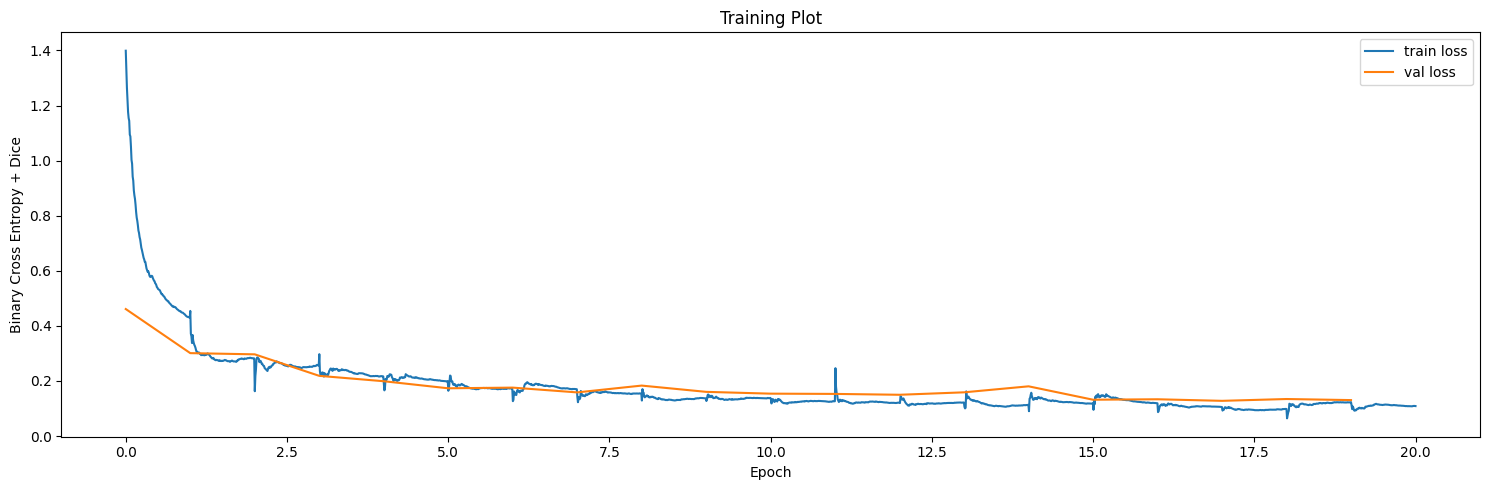

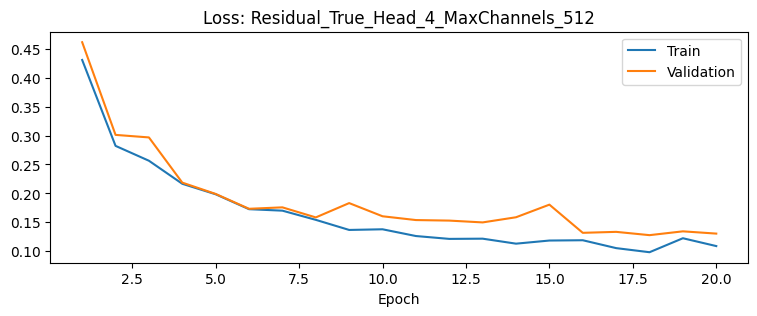

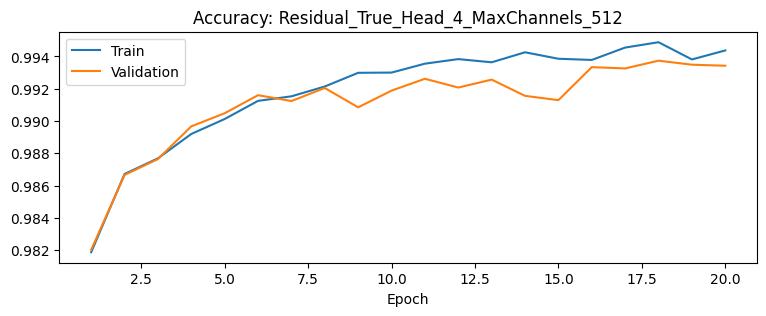

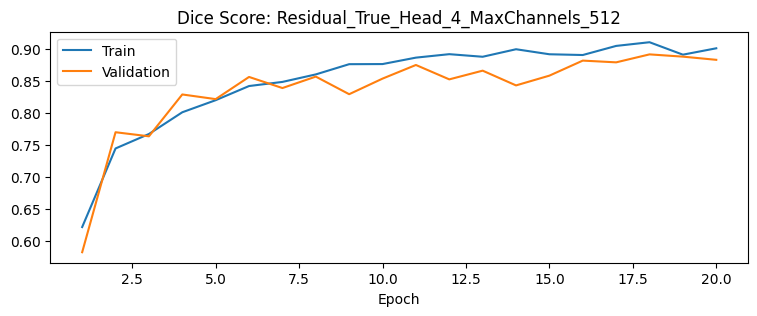

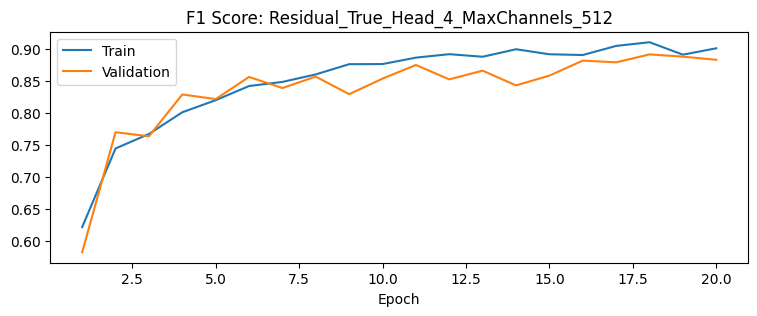

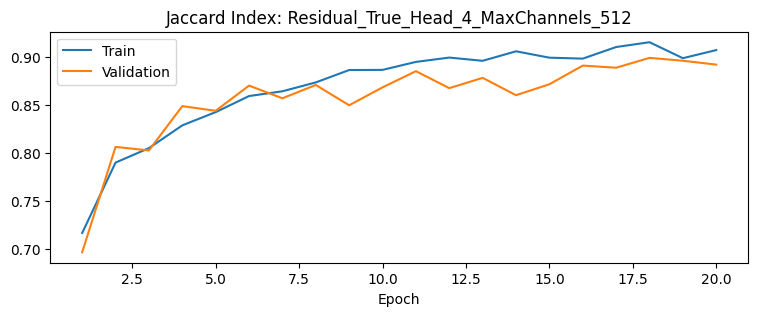

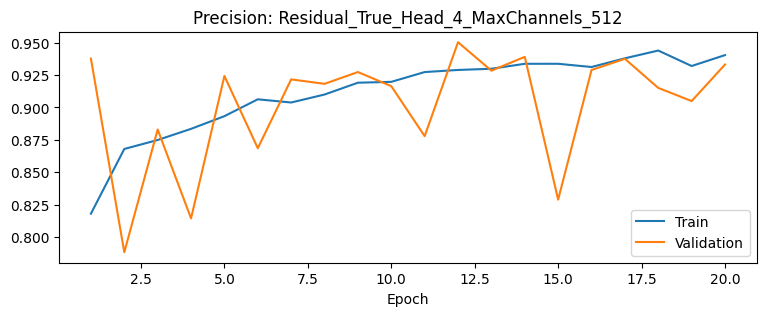

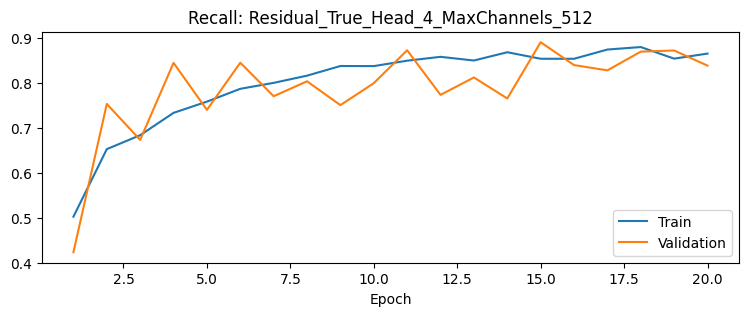

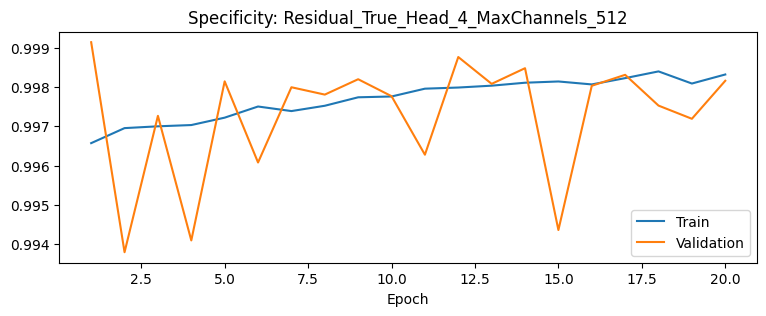

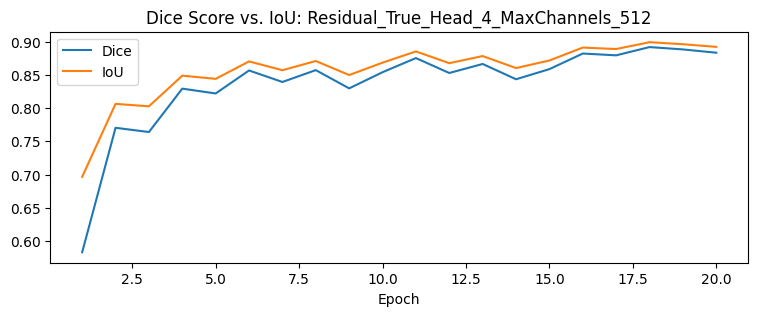

In [4]:
best_model = None
best_dice_score = 0.0
best_train_loss_batch_history = None
best_train_loss_history = None
best_val_loss_history = None
best_train_metrics = None
best_val_metrics = None

seed = 42
epochs = 20
channels = (3, 32, 64, 128, 256, 512)
is_residual = True
bias = True
heads = 4
learning_rate = 1e-3
weight_decay = 1e-5
lr_reduce_factor = 0.15
patience = 2
model_name = 'TransformerUNet'

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

channels = [[3, 32, 64, 128], [3, 32, 64, 128, 256], [3, 32, 64, 128, 256, 512]]
residuals = [False, True]
all_heads = [4]

for res in residuals:
    for head in all_heads:
        for ch in channels:
            model_path = f'res_{res}_head_{head}_ch_{ch[-1]}'
            model = TransformerUNetParallel(ch, head, size[0], res, bias)
            criterion = DiceBCELoss('cuda:0').to(device='cuda:0')
            optimizer = torch.optim.Adam(model.parameters())
            # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=lr_reduce_factor, patience=patience)
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-6)

            solver = Solver(
                model,
                epochs,
                device,
                train_loader,
                val_loader,
                criterion,
                optimizer,
                scheduler,
                model_name,
                model_path
            )

            solver.fit()
        
            best_train_loss_batch_history = solver.train_loss_batch
            best_train_loss_history = solver.train_loss_history
            best_val_loss_history = solver.val_loss_history
            best_train_metrics = solver.train_metrics
            best_val_metrics = solver.val_metrics

            plot_path = f'../reports/{model_name}/{model_path}'
            title = f'Residual_{res}_Head_{head}_MaxChannels_{ch[-1]}'
            plot_losses(best_train_loss_batch_history, best_val_loss_history, f'{plot_path}_train.png')
            train_metrics_acc = best_train_metrics.get_metrics()
            val_metrics_acc = best_val_metrics.get_metrics()

            plot_generic(f'Loss: {title}', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history, f'{plot_path}_Loss.png')
            plot_generic(f'Accuracy: {title}', 'Epoch', 'Train', train_metrics_acc[ACCURACY], 'Validation', val_metrics_acc[ACCURACY], f'{plot_path}_Accuracy.png')
            plot_generic(f'Dice Score: {title}', 'Epoch', 'Train', train_metrics_acc[DICE_SCORE], 'Validation', val_metrics_acc[DICE_SCORE], f'{plot_path}_Dice.png')
            plot_generic(f'F1 Score: {title}', 'Epoch', 'Train', train_metrics_acc[F1_SCORE], 'Validation', val_metrics_acc[F1_SCORE], f'{plot_path}_F1.png')
            plot_generic(f'Jaccard Index: {title}', 'Epoch', 'Train', train_metrics_acc[JACCARD_INDEX], 'Validation', val_metrics_acc[JACCARD_INDEX], f'{plot_path}_IoU.png')
            plot_generic(f'Precision: {title}', 'Epoch', 'Train', train_metrics_acc[PRECISION], 'Validation', val_metrics_acc[PRECISION], f'{plot_path}_Precision.png')
            plot_generic(f'Recall: {title}', 'Epoch', 'Train', train_metrics_acc[RECALL], 'Validation', val_metrics_acc[RECALL], f'{plot_path}_Recall.png')
            plot_generic(f'Specificity: {title}', 'Epoch', 'Train', train_metrics_acc[SPECIFICITY], 'Validation', val_metrics_acc[SPECIFICITY], f'{plot_path}_Specifity.png')
            plot_generic(f'Dice Score vs. IoU: {title}', 'Epoch', 'Dice', val_metrics_acc[DICE_SCORE], 'IoU', val_metrics_acc[JACCARD_INDEX], f'{plot_path}_DiceVsIoU.png')

            #if solver.best_dice_score > best_dice_score:
                #best_model = solver.best_model
                #best_dice_score = solver.best_dice_score
                #best_train_loss_batch_history = solver.train_loss_batch
                #best_train_loss_history = solver.train_loss_history
                #best_val_loss_history = solver.val_loss_history
                #best_train_metrics = solver.train_metrics
                #best_val_metrics = solver.val_metrics
                #best_train_loss = solver.best_train_loss
                #best_val_loss = solver.best_val_loss
                #torch.save(best_model, f'saved_models/{model_name}/Dice_{best_dice_score:.4f}_lr_{learning_rate}_train_loss_{best_train_loss:.4f}_val_loss_{best_val_loss:.4f}_heads_{heads}_ch_{channels[-1]}.pt')


In [5]:
#plot_losses(best_train_loss_batch_history, best_val_loss_history)

In [6]:
#train_metrics_acc = best_train_metrics.get_metrics()
#val_metrics_acc = best_val_metrics.get_metrics()
#plot_generic('Loss', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history)
#plot_generic('Accuracy', 'Epoch', 'Train', train_metrics_acc[ACCURACY], 'Validation', val_metrics_acc[ACCURACY])
#plot_generic('Dice Score', 'Epoch', 'Train', train_metrics_acc[DICE_SCORE], 'Validation', val_metrics_acc[DICE_SCORE])
#plot_generic('Jaccard Index', 'Epoch', 'Train', train_metrics_acc[JACCARD_INDEX], 'Validation', val_metrics_acc[JACCARD_INDEX])
#plot_generic('Dice Score vs. Jaccard Index', 'Epoch', 'Dice', val_metrics_acc[DICE_SCORE], 'IoU', val_metrics_acc[JACCARD_INDEX])

In [7]:
#test_metrics_acc = Metrics(device, 2)
#criterion = DiceBCELoss(device).to(device=device)
#model_test = 'res_True_head_2_ch_512/19_TDice_0.9021_VDice_0.8912_TLoss_0.1100_VLoss_0.1419.pt'
#test_loss = solver.evaluate(torch.load(f'saved_models/TransformerUNet/{model_test}'), criterion, device, test_loader, test_metrics_acc)
#test_metrics_acc.compute()
#test_metrics_acc = test_metrics_acc.get_metrics()
#test_loss, test_metrics_acc[ACCURACY], test_metrics_acc[DICE_SCORE], test_metrics_acc[JACCARD_INDEX]


res_False_head_2_ch_128 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.76it/s, Acc=0.9797, Dice=0.0602, IoU=0.5053, Loss=0.4133]


Training   - Accuracy: 0.9813 | Dice: 0.6145 | IoU: 0.7122 | Loss: 0.4885
Validation - Accuracy: 0.9841 | Dice: 0.6580 | IoU: 0.7371 | Loss: 0.4060

res_False_head_2_ch_128 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.75it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3866]


Training   - Accuracy: 0.9854 | Dice: 0.7120 | IoU: 0.7690 | Loss: 0.3243
Validation - Accuracy: 0.9848 | Dice: 0.6754 | IoU: 0.7473 | Loss: 0.3739

res_False_head_2_ch_128 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.68it/s, Acc=0.9790, Dice=0.0039, IoU=0.4905, Loss=0.3290]


Training   - Accuracy: 0.9863 | Dice: 0.7328 | IoU: 0.7821 | Loss: 0.2944
Validation - Accuracy: 0.9869 | Dice: 0.7412 | IoU: 0.7877 | Loss: 0.3170

res_False_head_2_ch_128 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.69it/s, Acc=0.9930, Dice=0.8036, IoU=0.8323, Loss=0.3138]


Training   - Accuracy: 0.9875 | Dice: 0.7601 | IoU: 0.8001 | Loss: 0.2627
Validation - Accuracy: 0.9857 | Dice: 0.6985 | IoU: 0.7611 | Loss: 0.3167

res_False_head_2_ch_128 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.66it/s, Acc=0.9847, Dice=0.4292, IoU=0.6290, Loss=0.2334]

Training   - Accuracy: 0.9885 | Dice: 0.7837 | IoU: 0.8162 | Loss: 0.2342
Validation - Accuracy: 0.9888 | Dice: 0.7858 | IoU: 0.8179 | Loss: 0.2294

res_False_head_2_ch_128 - Epoch 6/20



Validation: 100%|██████████| 35/35 [00:09<00:00,  3.68it/s, Acc=0.9923, Dice=0.7789, IoU=0.8151, Loss=0.2462]


Training   - Accuracy: 0.9891 | Dice: 0.7986 | IoU: 0.8268 | Loss: 0.2182
Validation - Accuracy: 0.9875 | Dice: 0.7443 | IoU: 0.7900 | Loss: 0.2481

res_False_head_2_ch_128 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.65it/s, Acc=0.9965, Dice=0.9162, IoU=0.9209, Loss=0.1903]

Training   - Accuracy: 0.9905 | Dice: 0.8263 | IoU: 0.8471 | Loss: 0.1890
Validation - Accuracy: 0.9904 | Dice: 0.8241 | IoU: 0.8455 | Loss: 0.1919

res_False_head_2_ch_128 - Epoch 8/20



Validation: 100%|██████████| 35/35 [00:09<00:00,  3.74it/s, Acc=0.9938, Dice=0.8362, IoU=0.8561, Loss=0.1910]


Training   - Accuracy: 0.9904 | Dice: 0.8253 | IoU: 0.8464 | Loss: 0.1922
Validation - Accuracy: 0.9907 | Dice: 0.8427 | IoU: 0.8593 | Loss: 0.1918

res_False_head_2_ch_128 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.75it/s, Acc=0.9911, Dice=0.7330, IoU=0.7848, Loss=0.2233]


Training   - Accuracy: 0.9912 | Dice: 0.8424 | IoU: 0.8594 | Loss: 0.1743
Validation - Accuracy: 0.9889 | Dice: 0.7808 | IoU: 0.8145 | Loss: 0.2241

res_False_head_2_ch_128 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.75it/s, Acc=0.9919, Dice=0.7680, IoU=0.8076, Loss=0.1674]


Training   - Accuracy: 0.9919 | Dice: 0.8559 | IoU: 0.8699 | Loss: 0.1588
Validation - Accuracy: 0.9918 | Dice: 0.8545 | IoU: 0.8688 | Loss: 0.1673

res_False_head_2_ch_128 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.66it/s, Acc=0.9944, Dice=0.8485, IoU=0.8656, Loss=0.2418]


Training   - Accuracy: 0.9921 | Dice: 0.8601 | IoU: 0.8732 | Loss: 0.1544
Validation - Accuracy: 0.9878 | Dice: 0.7505 | IoU: 0.7941 | Loss: 0.2442

res_False_head_2_ch_128 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.72it/s, Acc=0.9918, Dice=0.7609, IoU=0.8029, Loss=0.1762]

Training   - Accuracy: 0.9928 | Dice: 0.8731 | IoU: 0.8837 | Loss: 0.1411
Validation - Accuracy: 0.9912 | Dice: 0.8371 | IoU: 0.8554 | Loss: 0.1759

res_False_head_2_ch_128 - Epoch 13/20



Validation: 100%|██████████| 35/35 [00:09<00:00,  3.75it/s, Acc=0.9904, Dice=0.7122, IoU=0.7717, Loss=0.1587]

Training   - Accuracy: 0.9928 | Dice: 0.8737 | IoU: 0.8842 | Loss: 0.1404
Validation - Accuracy: 0.9919 | Dice: 0.8564 | IoU: 0.8703 | Loss: 0.1580

res_False_head_2_ch_128 - Epoch 14/20



Validation: 100%|██████████| 35/35 [00:09<00:00,  3.66it/s, Acc=0.9975, Dice=0.9393, IoU=0.9415, Loss=0.1601]


Training   - Accuracy: 0.9931 | Dice: 0.8786 | IoU: 0.8882 | Loss: 0.1368
Validation - Accuracy: 0.9917 | Dice: 0.8459 | IoU: 0.8622 | Loss: 0.1618

res_False_head_2_ch_128 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.74it/s, Acc=0.9960, Dice=0.8972, IoU=0.9048, Loss=0.1539]


Training   - Accuracy: 0.9937 | Dice: 0.8897 | IoU: 0.8975 | Loss: 0.1221
Validation - Accuracy: 0.9920 | Dice: 0.8538 | IoU: 0.8683 | Loss: 0.1552

res_False_head_2_ch_128 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.68it/s, Acc=0.9910, Dice=0.7336, IoU=0.7851, Loss=0.1484]


Training   - Accuracy: 0.9935 | Dice: 0.8861 | IoU: 0.8945 | Loss: 0.1279
Validation - Accuracy: 0.9930 | Dice: 0.8800 | IoU: 0.8892 | Loss: 0.1471

res_False_head_2_ch_128 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.75it/s, Acc=0.9971, Dice=0.9300, IoU=0.9331, Loss=0.1452]


Training   - Accuracy: 0.9937 | Dice: 0.8906 | IoU: 0.8982 | Loss: 0.1229
Validation - Accuracy: 0.9930 | Dice: 0.8828 | IoU: 0.8915 | Loss: 0.1464

res_False_head_2_ch_128 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.69it/s, Acc=0.9975, Dice=0.9388, IoU=0.9410, Loss=0.1494]


Training   - Accuracy: 0.9936 | Dice: 0.8869 | IoU: 0.8951 | Loss: 0.1267
Validation - Accuracy: 0.9922 | Dice: 0.8600 | IoU: 0.8732 | Loss: 0.1508

res_False_head_2_ch_128 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.74it/s, Acc=0.9970, Dice=0.9286, IoU=0.9319, Loss=0.1633]


Training   - Accuracy: 0.9937 | Dice: 0.8894 | IoU: 0.8972 | Loss: 0.1232
Validation - Accuracy: 0.9924 | Dice: 0.8782 | IoU: 0.8876 | Loss: 0.1648

res_False_head_2_ch_128 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.74it/s, Acc=0.9963, Dice=0.9064, IoU=0.9125, Loss=0.1428]


Training   - Accuracy: 0.9941 | Dice: 0.8979 | IoU: 0.9044 | Loss: 0.1145
Validation - Accuracy: 0.9927 | Dice: 0.8684 | IoU: 0.8799 | Loss: 0.1438



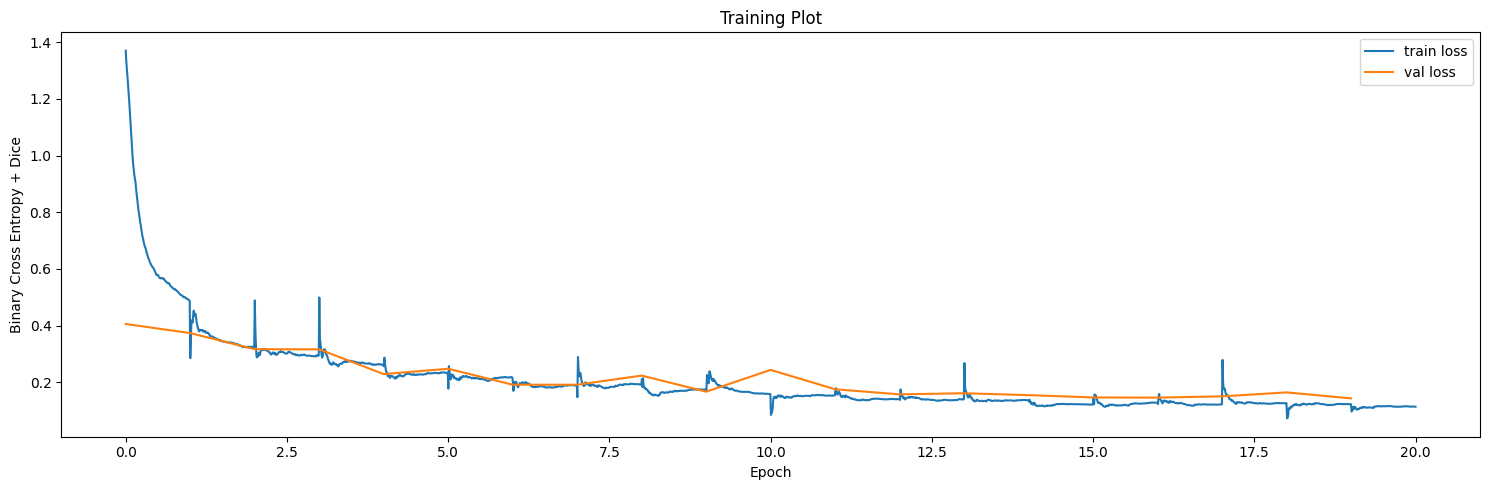

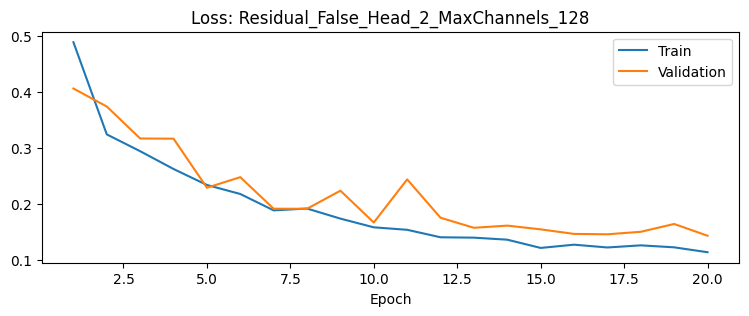

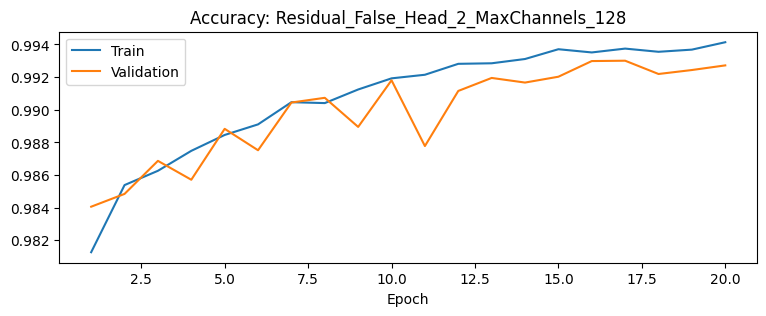

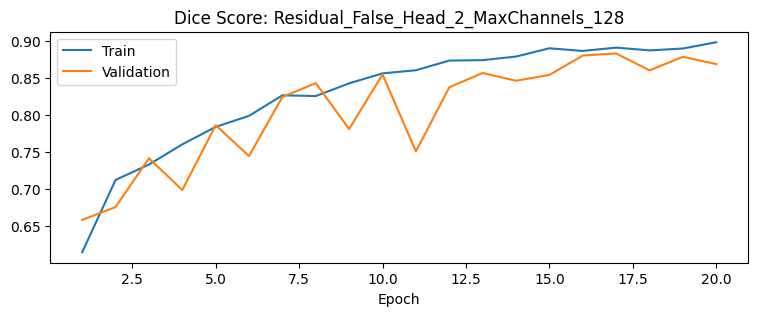

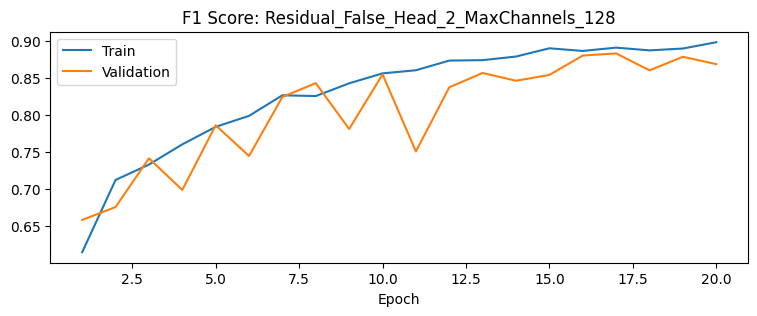

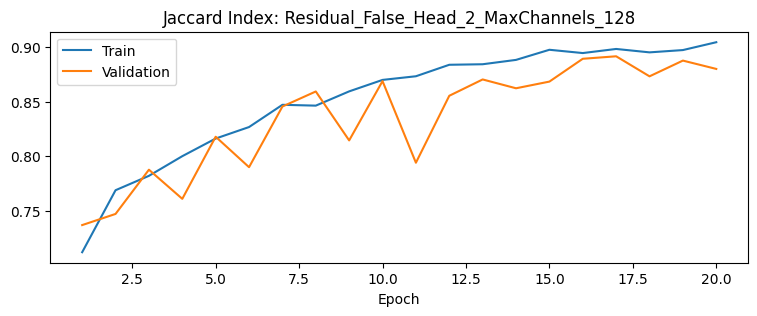

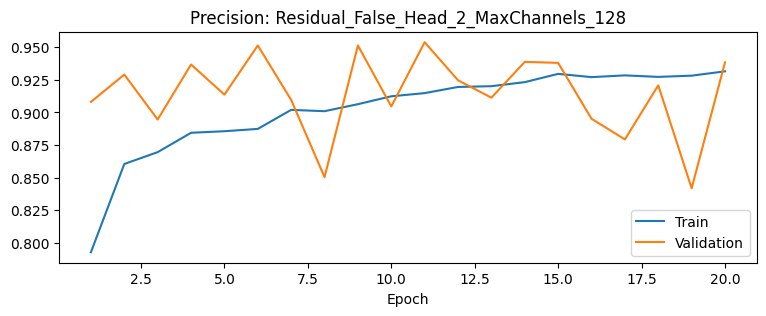

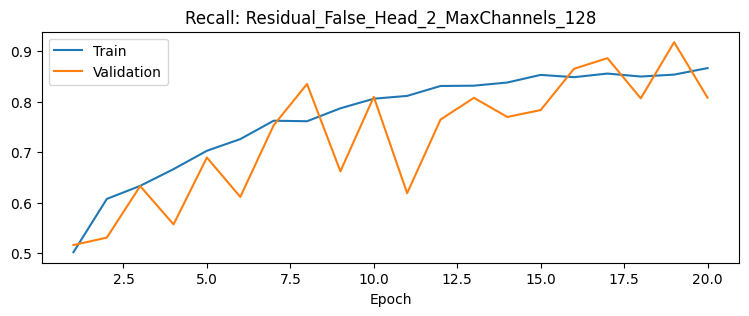

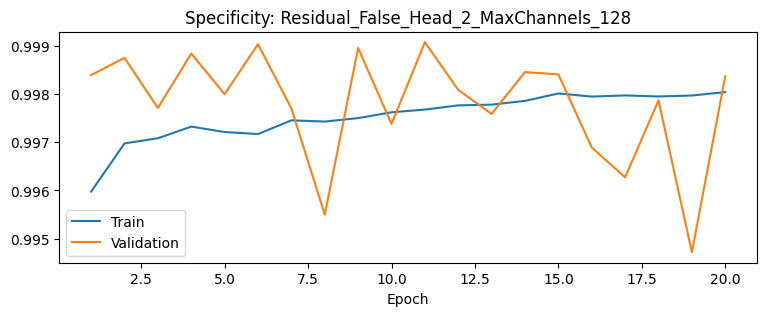

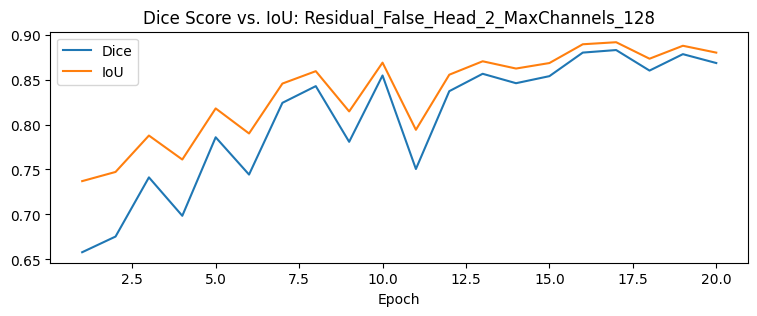

res_False_head_2_ch_256 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.97it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.5429]


Training   - Accuracy: 0.9463 | Dice: 0.3513 | IoU: 0.5793 | Loss: 0.8014
Validation - Accuracy: 0.9817 | Dice: 0.5828 | IoU: 0.6964 | Loss: 0.5317

res_False_head_2_ch_256 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.01it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3920]


Training   - Accuracy: 0.9836 | Dice: 0.6613 | IoU: 0.7386 | Loss: 0.4323
Validation - Accuracy: 0.9860 | Dice: 0.7137 | IoU: 0.7703 | Loss: 0.3791

res_False_head_2_ch_256 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.97it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3797]


Training   - Accuracy: 0.9854 | Dice: 0.7086 | IoU: 0.7669 | Loss: 0.3407
Validation - Accuracy: 0.9858 | Dice: 0.7027 | IoU: 0.7636 | Loss: 0.3670

res_False_head_2_ch_256 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s, Acc=0.9932, Dice=0.8203, IoU=0.8443, Loss=0.3030]

Training   - Accuracy: 0.9868 | Dice: 0.7448 | IoU: 0.7900 | Loss: 0.2907
Validation - Accuracy: 0.9854 | Dice: 0.6948 | IoU: 0.7587 | Loss: 0.3048

res_False_head_2_ch_256 - Epoch 5/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  2.99it/s, Acc=0.9906, Dice=0.7222, IoU=0.7779, Loss=0.2397]


Training   - Accuracy: 0.9878 | Dice: 0.7718 | IoU: 0.8080 | Loss: 0.2597
Validation - Accuracy: 0.9891 | Dice: 0.7989 | IoU: 0.8270 | Loss: 0.2406

res_False_head_2_ch_256 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s, Acc=0.9866, Dice=0.5387, IoU=0.6776, Loss=0.2487]

Training   - Accuracy: 0.9888 | Dice: 0.7924 | IoU: 0.8224 | Loss: 0.2324
Validation - Accuracy: 0.9887 | Dice: 0.8082 | IoU: 0.8332 | Loss: 0.2467

res_False_head_2_ch_256 - Epoch 7/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s, Acc=0.9906, Dice=0.7184, IoU=0.7755, Loss=0.2042]

Training   - Accuracy: 0.9891 | Dice: 0.7984 | IoU: 0.8266 | Loss: 0.2250
Validation - Accuracy: 0.9905 | Dice: 0.8273 | IoU: 0.8479 | Loss: 0.2041

res_False_head_2_ch_256 - Epoch 8/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  2.97it/s, Acc=0.9860, Dice=0.5036, IoU=0.6612, Loss=0.2165]


Training   - Accuracy: 0.9897 | Dice: 0.8120 | IoU: 0.8365 | Loss: 0.2056
Validation - Accuracy: 0.9902 | Dice: 0.8229 | IoU: 0.8445 | Loss: 0.2122

res_False_head_2_ch_256 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s, Acc=0.9958, Dice=0.9038, IoU=0.9101, Loss=0.2179]

Training   - Accuracy: 0.9902 | Dice: 0.8238 | IoU: 0.8452 | Loss: 0.1991
Validation - Accuracy: 0.9901 | Dice: 0.8401 | IoU: 0.8571 | Loss: 0.2191

res_False_head_2_ch_256 - Epoch 10/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s, Acc=0.9923, Dice=0.7842, IoU=0.8186, Loss=0.2017]


Training   - Accuracy: 0.9906 | Dice: 0.8313 | IoU: 0.8509 | Loss: 0.1890
Validation - Accuracy: 0.9903 | Dice: 0.8201 | IoU: 0.8426 | Loss: 0.2021

res_False_head_2_ch_256 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.03it/s, Acc=0.9957, Dice=0.8905, IoU=0.8991, Loss=0.1881]


Training   - Accuracy: 0.9910 | Dice: 0.8394 | IoU: 0.8570 | Loss: 0.1789
Validation - Accuracy: 0.9911 | Dice: 0.8432 | IoU: 0.8599 | Loss: 0.1896

res_False_head_2_ch_256 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.05it/s, Acc=0.9917, Dice=0.7602, IoU=0.8024, Loss=0.1933]


Training   - Accuracy: 0.9914 | Dice: 0.8461 | IoU: 0.8622 | Loss: 0.1706
Validation - Accuracy: 0.9905 | Dice: 0.8191 | IoU: 0.8419 | Loss: 0.1935

res_False_head_2_ch_256 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.97it/s, Acc=0.9946, Dice=0.8585, IoU=0.8733, Loss=0.1697]

Training   - Accuracy: 0.9916 | Dice: 0.8489 | IoU: 0.8644 | Loss: 0.1671
Validation - Accuracy: 0.9921 | Dice: 0.8671 | IoU: 0.8786 | Loss: 0.1705

res_False_head_2_ch_256 - Epoch 14/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s, Acc=0.9946, Dice=0.8588, IoU=0.8735, Loss=0.1554]


Training   - Accuracy: 0.9927 | Dice: 0.8720 | IoU: 0.8828 | Loss: 0.1433
Validation - Accuracy: 0.9925 | Dice: 0.8688 | IoU: 0.8802 | Loss: 0.1558

res_False_head_2_ch_256 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.01it/s, Acc=0.9935, Dice=0.8212, IoU=0.8450, Loss=0.1823]


Training   - Accuracy: 0.9925 | Dice: 0.8683 | IoU: 0.8798 | Loss: 0.1472
Validation - Accuracy: 0.9910 | Dice: 0.8352 | IoU: 0.8539 | Loss: 0.1830

res_False_head_2_ch_256 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s, Acc=0.9916, Dice=0.7549, IoU=0.7989, Loss=0.1560]


Training   - Accuracy: 0.9926 | Dice: 0.8686 | IoU: 0.8800 | Loss: 0.1466
Validation - Accuracy: 0.9923 | Dice: 0.8667 | IoU: 0.8785 | Loss: 0.1557

res_False_head_2_ch_256 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s, Acc=0.9927, Dice=0.7934, IoU=0.8250, Loss=0.1572]


Training   - Accuracy: 0.9932 | Dice: 0.8799 | IoU: 0.8892 | Loss: 0.1325
Validation - Accuracy: 0.9924 | Dice: 0.8664 | IoU: 0.8783 | Loss: 0.1569

res_False_head_2_ch_256 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.99it/s, Acc=0.9927, Dice=0.7947, IoU=0.8260, Loss=0.2140]


Training   - Accuracy: 0.9927 | Dice: 0.8706 | IoU: 0.8817 | Loss: 0.1457
Validation - Accuracy: 0.9895 | Dice: 0.7938 | IoU: 0.8237 | Loss: 0.2150

res_False_head_2_ch_256 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.97it/s, Acc=0.9965, Dice=0.9212, IoU=0.9251, Loss=0.1444]

Training   - Accuracy: 0.9930 | Dice: 0.8756 | IoU: 0.8857 | Loss: 0.1390
Validation - Accuracy: 0.9931 | Dice: 0.8823 | IoU: 0.8911 | Loss: 0.1450

res_False_head_2_ch_256 - Epoch 20/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  2.99it/s, Acc=0.9935, Dice=0.8209, IoU=0.8448, Loss=0.1449]


Training   - Accuracy: 0.9937 | Dice: 0.8894 | IoU: 0.8972 | Loss: 0.1254
Validation - Accuracy: 0.9926 | Dice: 0.8682 | IoU: 0.8798 | Loss: 0.1454



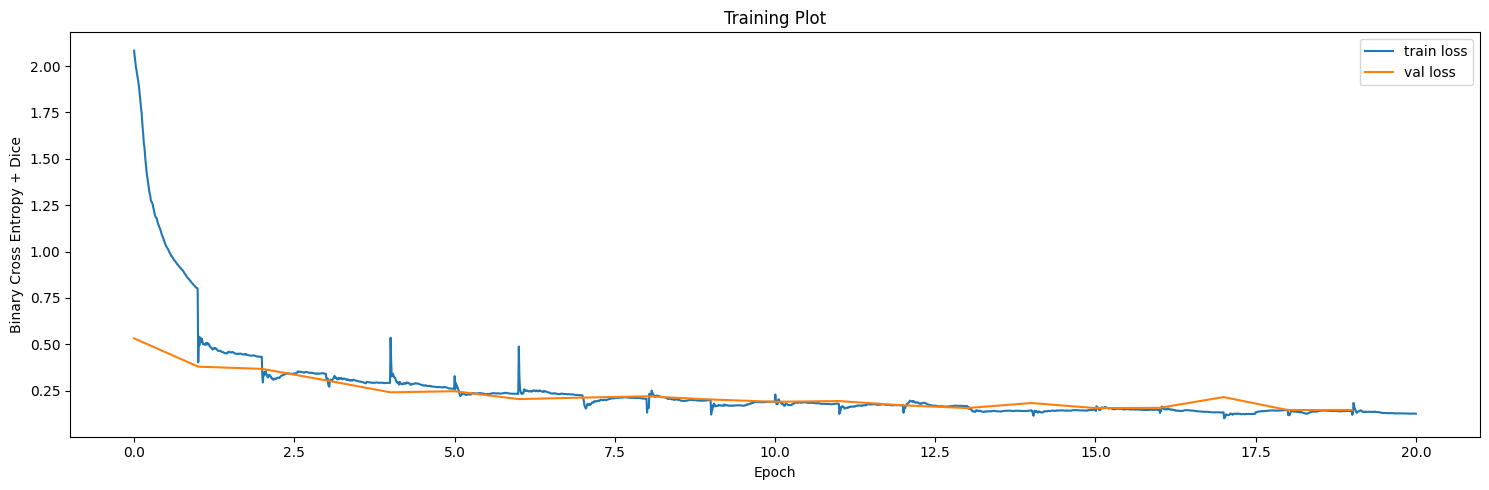

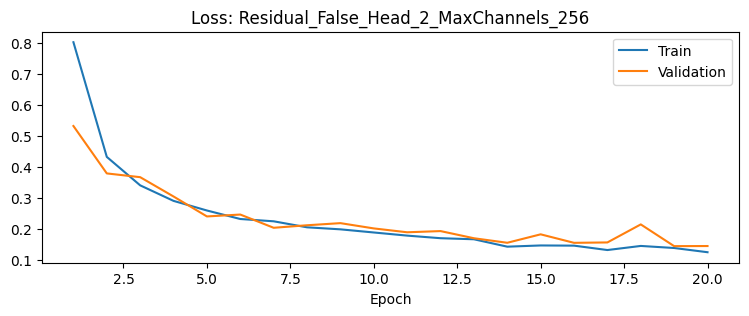

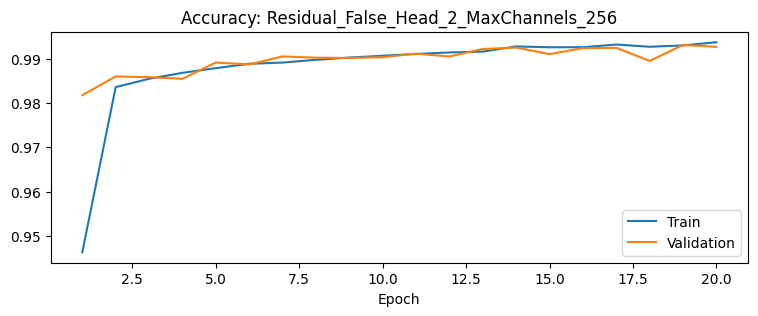

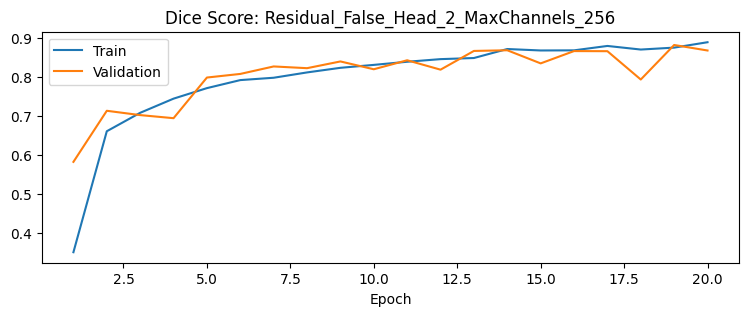

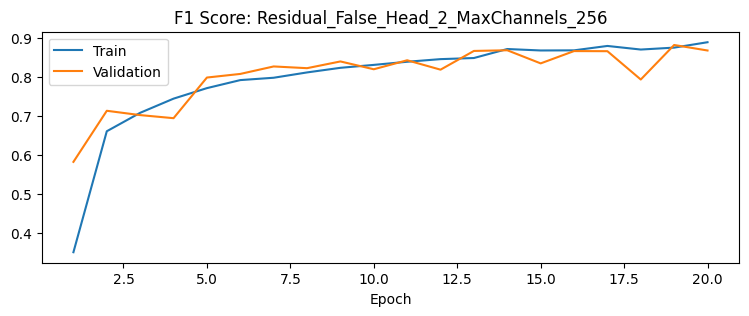

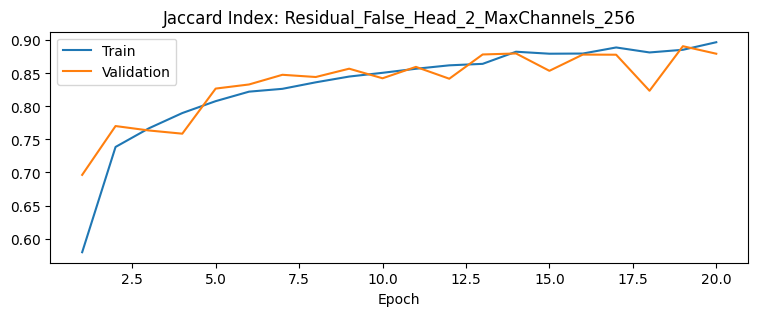

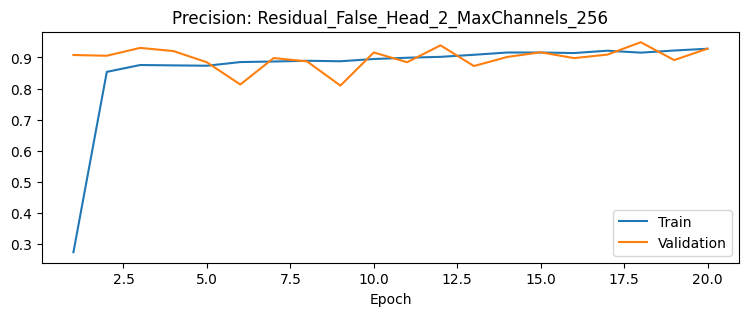

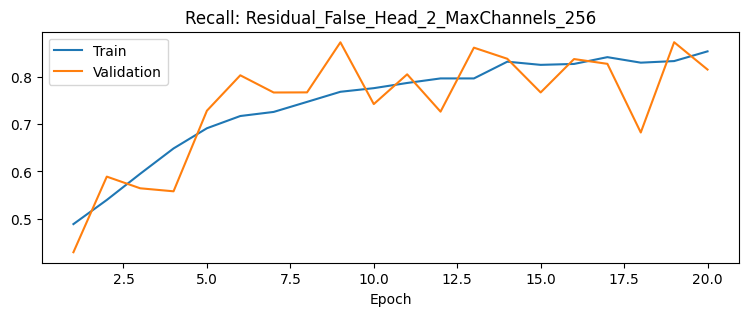

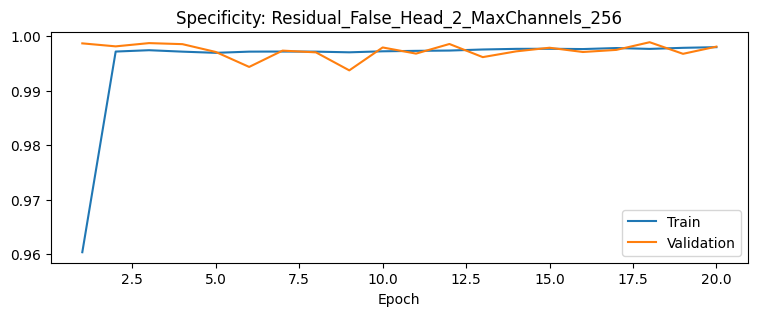

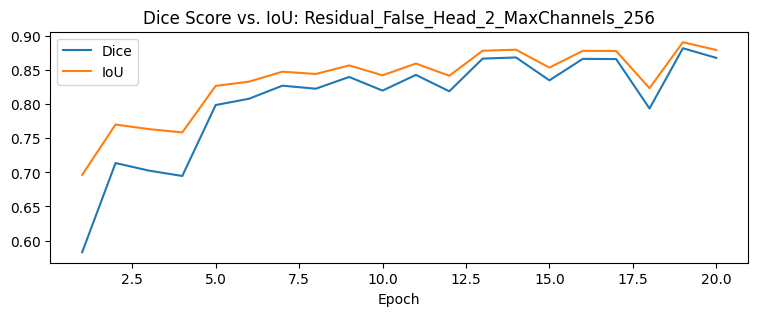

res_False_head_2_ch_512 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.90it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.5151]


Training   - Accuracy: 0.9589 | Dice: 0.4076 | IoU: 0.6071 | Loss: 0.7398
Validation - Accuracy: 0.9828 | Dice: 0.6886 | IoU: 0.7538 | Loss: 0.5036

res_False_head_2_ch_512 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3918]


Training   - Accuracy: 0.9826 | Dice: 0.6353 | IoU: 0.7239 | Loss: 0.4387
Validation - Accuracy: 0.9859 | Dice: 0.7299 | IoU: 0.7802 | Loss: 0.3790

res_False_head_2_ch_512 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.87it/s, Acc=0.9793, Dice=0.0249, IoU=0.4959, Loss=0.3338]


Training   - Accuracy: 0.9847 | Dice: 0.6937 | IoU: 0.7577 | Loss: 0.3491
Validation - Accuracy: 0.9869 | Dice: 0.7459 | IoU: 0.7907 | Loss: 0.3234

res_False_head_2_ch_512 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.90it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3317]


Training   - Accuracy: 0.9863 | Dice: 0.7328 | IoU: 0.7822 | Loss: 0.3042
Validation - Accuracy: 0.9867 | Dice: 0.7268 | IoU: 0.7787 | Loss: 0.3188

res_False_head_2_ch_512 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.88it/s, Acc=0.9883, Dice=0.6186, IoU=0.7180, Loss=0.2485]


Training   - Accuracy: 0.9866 | Dice: 0.7428 | IoU: 0.7886 | Loss: 0.2914
Validation - Accuracy: 0.9886 | Dice: 0.7854 | IoU: 0.8175 | Loss: 0.2482

res_False_head_2_ch_512 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.90it/s, Acc=0.9835, Dice=0.3514, IoU=0.5983, Loss=0.2634]


Training   - Accuracy: 0.9877 | Dice: 0.7670 | IoU: 0.8047 | Loss: 0.2630
Validation - Accuracy: 0.9885 | Dice: 0.7771 | IoU: 0.8118 | Loss: 0.2578

res_False_head_2_ch_512 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.89it/s, Acc=0.9872, Dice=0.5649, IoU=0.6904, Loss=0.2328]


Training   - Accuracy: 0.9886 | Dice: 0.7874 | IoU: 0.8188 | Loss: 0.2397
Validation - Accuracy: 0.9889 | Dice: 0.7860 | IoU: 0.8180 | Loss: 0.2313

res_False_head_2_ch_512 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.87it/s, Acc=0.9852, Dice=0.4612, IoU=0.6424, Loss=0.2656]


Training   - Accuracy: 0.9893 | Dice: 0.8024 | IoU: 0.8295 | Loss: 0.2184
Validation - Accuracy: 0.9873 | Dice: 0.7423 | IoU: 0.7886 | Loss: 0.2636

res_False_head_2_ch_512 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.89it/s, Acc=0.9902, Dice=0.7023, IoU=0.7656, Loss=0.2048]


Training   - Accuracy: 0.9893 | Dice: 0.8046 | IoU: 0.8311 | Loss: 0.2175
Validation - Accuracy: 0.9904 | Dice: 0.8276 | IoU: 0.8480 | Loss: 0.2044

res_False_head_2_ch_512 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.90it/s, Acc=0.9919, Dice=0.7647, IoU=0.8054, Loss=0.1898]


Training   - Accuracy: 0.9907 | Dice: 0.8327 | IoU: 0.8519 | Loss: 0.1859
Validation - Accuracy: 0.9903 | Dice: 0.8163 | IoU: 0.8399 | Loss: 0.1901

res_False_head_2_ch_512 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, Acc=0.9917, Dice=0.7586, IoU=0.8013, Loss=0.2089]


Training   - Accuracy: 0.9910 | Dice: 0.8393 | IoU: 0.8569 | Loss: 0.1792
Validation - Accuracy: 0.9898 | Dice: 0.8283 | IoU: 0.8482 | Loss: 0.2093

res_False_head_2_ch_512 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.87it/s, Acc=0.9939, Dice=0.8358, IoU=0.8559, Loss=0.1672]


Training   - Accuracy: 0.9916 | Dice: 0.8508 | IoU: 0.8658 | Loss: 0.1658
Validation - Accuracy: 0.9920 | Dice: 0.8652 | IoU: 0.8771 | Loss: 0.1678

res_False_head_2_ch_512 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.87it/s, Acc=0.9870, Dice=0.5512, IoU=0.6837, Loss=0.2032]


Training   - Accuracy: 0.9918 | Dice: 0.8544 | IoU: 0.8687 | Loss: 0.1633
Validation - Accuracy: 0.9900 | Dice: 0.8085 | IoU: 0.8341 | Loss: 0.2001

res_False_head_2_ch_512 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.88it/s, Acc=0.9944, Dice=0.8510, IoU=0.8674, Loss=0.1614]


Training   - Accuracy: 0.9930 | Dice: 0.8770 | IoU: 0.8869 | Loss: 0.1382
Validation - Accuracy: 0.9923 | Dice: 0.8679 | IoU: 0.8793 | Loss: 0.1621

res_False_head_2_ch_512 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.94it/s, Acc=0.9962, Dice=0.9042, IoU=0.9106, Loss=0.1580]


Training   - Accuracy: 0.9928 | Dice: 0.8731 | IoU: 0.8837 | Loss: 0.1417
Validation - Accuracy: 0.9924 | Dice: 0.8729 | IoU: 0.8833 | Loss: 0.1592

res_False_head_2_ch_512 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.88it/s, Acc=0.9944, Dice=0.8549, IoU=0.8704, Loss=0.1686]


Training   - Accuracy: 0.9928 | Dice: 0.8725 | IoU: 0.8832 | Loss: 0.1425
Validation - Accuracy: 0.9913 | Dice: 0.8391 | IoU: 0.8570 | Loss: 0.1691

res_False_head_2_ch_512 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.89it/s, Acc=0.9965, Dice=0.9147, IoU=0.9196, Loss=0.1455]


Training   - Accuracy: 0.9930 | Dice: 0.8767 | IoU: 0.8866 | Loss: 0.1392
Validation - Accuracy: 0.9928 | Dice: 0.8725 | IoU: 0.8832 | Loss: 0.1466

res_False_head_2_ch_512 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.88it/s, Acc=0.9964, Dice=0.9121, IoU=0.9174, Loss=0.1397]


Training   - Accuracy: 0.9935 | Dice: 0.8867 | IoU: 0.8949 | Loss: 0.1267
Validation - Accuracy: 0.9931 | Dice: 0.8818 | IoU: 0.8908 | Loss: 0.1406

res_False_head_2_ch_512 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9963, Dice=0.9142, IoU=0.9191, Loss=0.1429]


Training   - Accuracy: 0.9933 | Dice: 0.8826 | IoU: 0.8915 | Loss: 0.1310
Validation - Accuracy: 0.9929 | Dice: 0.8739 | IoU: 0.8844 | Loss: 0.1436

res_False_head_2_ch_512 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.92it/s, Acc=0.9952, Dice=0.8759, IoU=0.8872, Loss=0.1399]


Training   - Accuracy: 0.9940 | Dice: 0.8959 | IoU: 0.9027 | Loss: 0.1162
Validation - Accuracy: 0.9931 | Dice: 0.8784 | IoU: 0.8880 | Loss: 0.1404



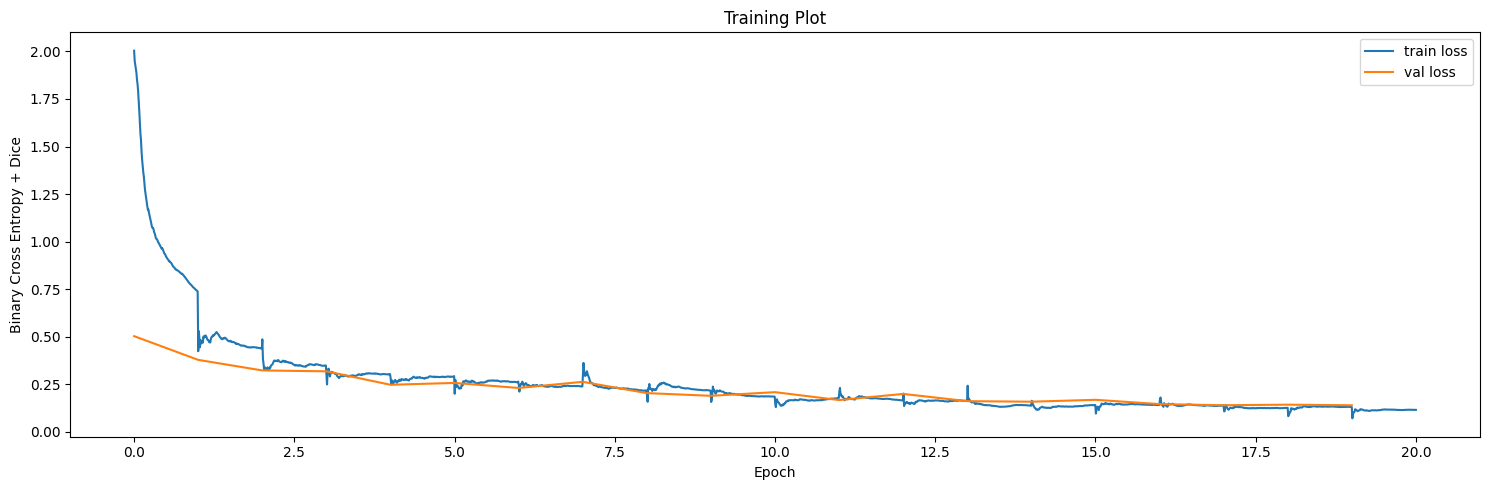

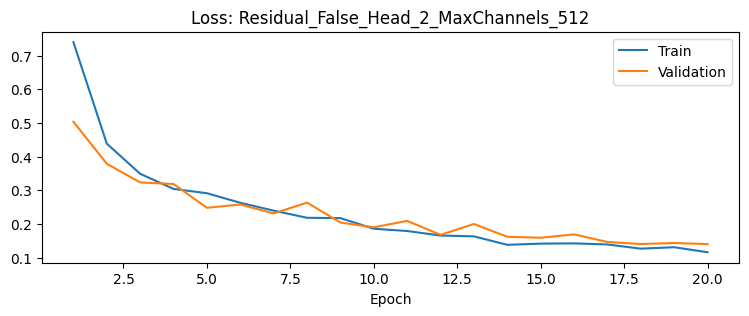

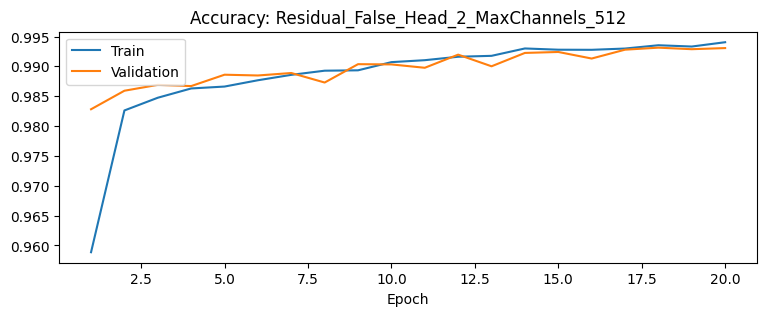

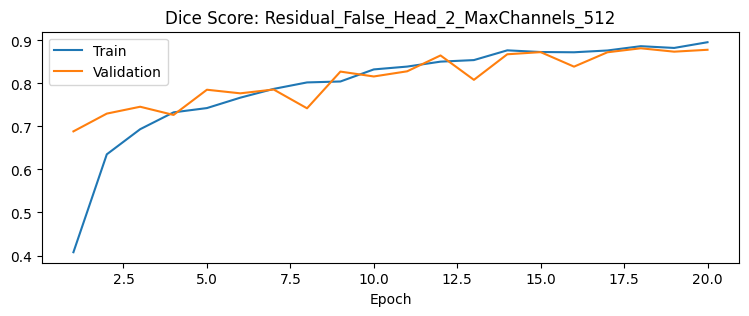

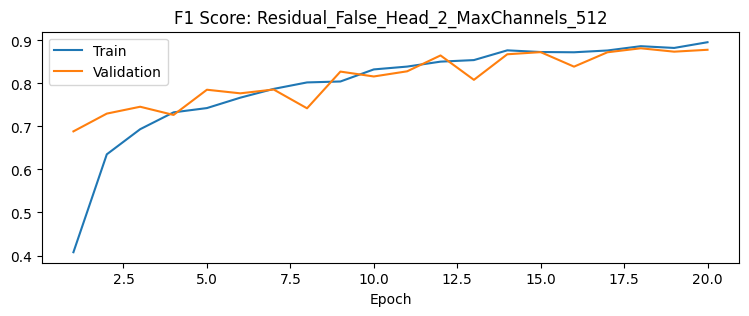

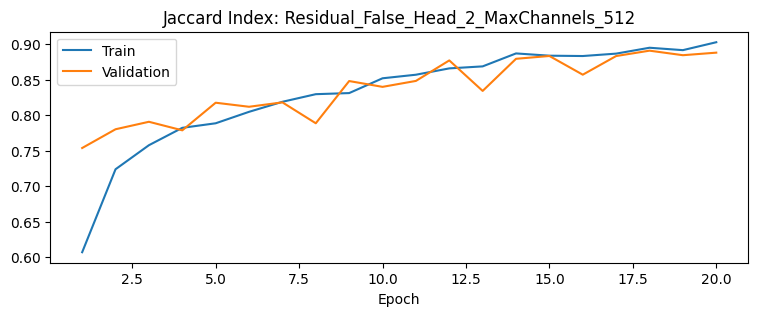

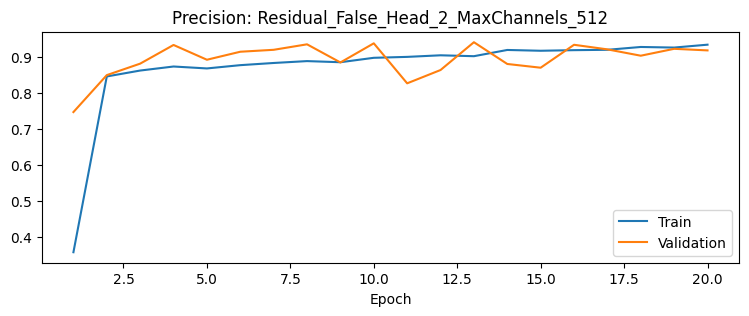

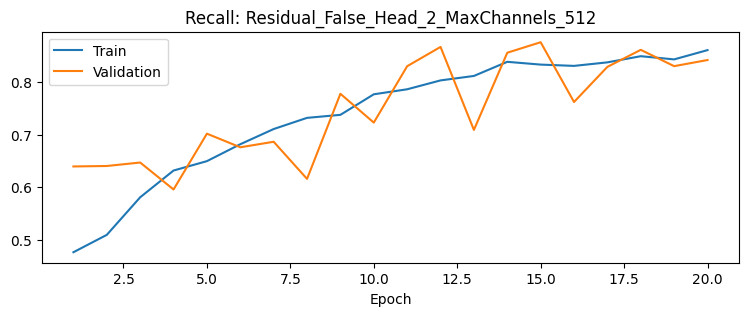

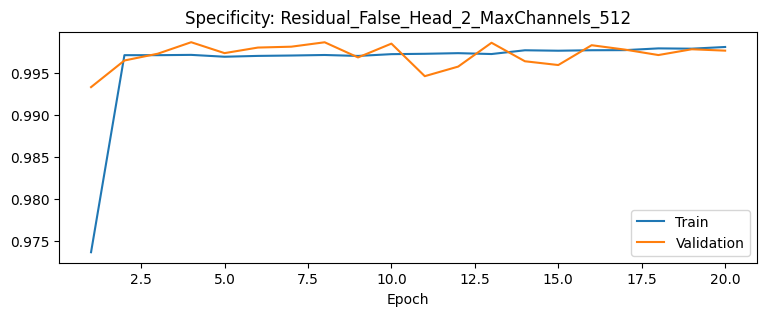

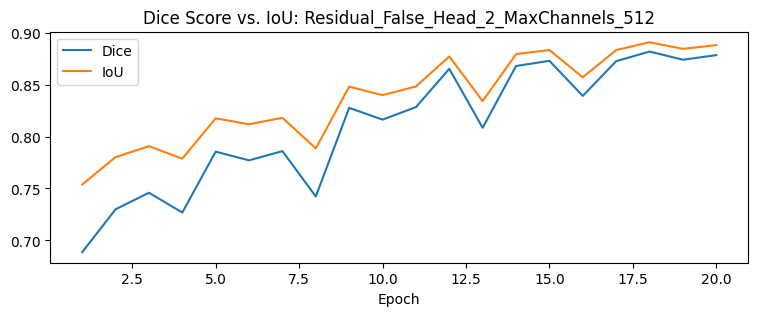

res_True_head_2_ch_128 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3457]


Training   - Accuracy: 0.9815 | Dice: 0.6096 | IoU: 0.7098 | Loss: 0.4494
Validation - Accuracy: 0.9864 | Dice: 0.7311 | IoU: 0.7812 | Loss: 0.3326

res_True_head_2_ch_128 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9840, Dice=0.3824, IoU=0.6102, Loss=0.2757]


Training   - Accuracy: 0.9868 | Dice: 0.7487 | IoU: 0.7925 | Loss: 0.2831
Validation - Accuracy: 0.9875 | Dice: 0.7769 | IoU: 0.8112 | Loss: 0.2719

res_True_head_2_ch_128 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.2774]


Training   - Accuracy: 0.9886 | Dice: 0.7893 | IoU: 0.8202 | Loss: 0.2319
Validation - Accuracy: 0.9887 | Dice: 0.8052 | IoU: 0.8311 | Loss: 0.2631

res_True_head_2_ch_128 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9909, Dice=0.7288, IoU=0.7821, Loss=0.2183]


Training   - Accuracy: 0.9898 | Dice: 0.8141 | IoU: 0.8380 | Loss: 0.2063
Validation - Accuracy: 0.9896 | Dice: 0.8027 | IoU: 0.8299 | Loss: 0.2185

res_True_head_2_ch_128 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9951, Dice=0.8796, IoU=0.8901, Loss=0.2008]


Training   - Accuracy: 0.9900 | Dice: 0.8190 | IoU: 0.8416 | Loss: 0.1987
Validation - Accuracy: 0.9905 | Dice: 0.8309 | IoU: 0.8505 | Loss: 0.2020

res_True_head_2_ch_128 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9959, Dice=0.9047, IoU=0.9109, Loss=0.1875]


Training   - Accuracy: 0.9912 | Dice: 0.8424 | IoU: 0.8593 | Loss: 0.1756
Validation - Accuracy: 0.9905 | Dice: 0.8229 | IoU: 0.8447 | Loss: 0.1888

res_True_head_2_ch_128 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9955, Dice=0.8876, IoU=0.8967, Loss=0.1677]


Training   - Accuracy: 0.9917 | Dice: 0.8514 | IoU: 0.8663 | Loss: 0.1638
Validation - Accuracy: 0.9916 | Dice: 0.8488 | IoU: 0.8644 | Loss: 0.1686

res_True_head_2_ch_128 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s, Acc=0.9952, Dice=0.8776, IoU=0.8885, Loss=0.1518]


Training   - Accuracy: 0.9925 | Dice: 0.8670 | IoU: 0.8788 | Loss: 0.1482
Validation - Accuracy: 0.9923 | Dice: 0.8638 | IoU: 0.8762 | Loss: 0.1525

res_True_head_2_ch_128 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.70it/s, Acc=0.9956, Dice=0.8942, IoU=0.9021, Loss=0.1522]


Training   - Accuracy: 0.9927 | Dice: 0.8720 | IoU: 0.8828 | Loss: 0.1446
Validation - Accuracy: 0.9926 | Dice: 0.8735 | IoU: 0.8839 | Loss: 0.1528

res_True_head_2_ch_128 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s, Acc=0.9950, Dice=0.8678, IoU=0.8807, Loss=0.1516]


Training   - Accuracy: 0.9925 | Dice: 0.8678 | IoU: 0.8794 | Loss: 0.1458
Validation - Accuracy: 0.9921 | Dice: 0.8563 | IoU: 0.8703 | Loss: 0.1523

res_True_head_2_ch_128 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s, Acc=0.9950, Dice=0.8699, IoU=0.8823, Loss=0.1482]


Training   - Accuracy: 0.9929 | Dice: 0.8747 | IoU: 0.8850 | Loss: 0.1404
Validation - Accuracy: 0.9925 | Dice: 0.8663 | IoU: 0.8782 | Loss: 0.1487

res_True_head_2_ch_128 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.67it/s, Acc=0.9962, Dice=0.9082, IoU=0.9140, Loss=0.1424]


Training   - Accuracy: 0.9934 | Dice: 0.8831 | IoU: 0.8919 | Loss: 0.1295
Validation - Accuracy: 0.9929 | Dice: 0.8768 | IoU: 0.8867 | Loss: 0.1431

res_True_head_2_ch_128 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s, Acc=0.9954, Dice=0.8847, IoU=0.8943, Loss=0.1430]


Training   - Accuracy: 0.9936 | Dice: 0.8878 | IoU: 0.8959 | Loss: 0.1258
Validation - Accuracy: 0.9926 | Dice: 0.8689 | IoU: 0.8803 | Loss: 0.1437

res_True_head_2_ch_128 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.86it/s, Acc=0.9964, Dice=0.9165, IoU=0.9212, Loss=0.1363]


Training   - Accuracy: 0.9933 | Dice: 0.8825 | IoU: 0.8914 | Loss: 0.1317
Validation - Accuracy: 0.9933 | Dice: 0.8866 | IoU: 0.8947 | Loss: 0.1371

res_True_head_2_ch_128 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s, Acc=0.9961, Dice=0.9038, IoU=0.9103, Loss=0.1311]


Training   - Accuracy: 0.9939 | Dice: 0.8939 | IoU: 0.9010 | Loss: 0.1195
Validation - Accuracy: 0.9934 | Dice: 0.8845 | IoU: 0.8931 | Loss: 0.1318

res_True_head_2_ch_128 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9960, Dice=0.9051, IoU=0.9113, Loss=0.1343]


Training   - Accuracy: 0.9939 | Dice: 0.8939 | IoU: 0.9010 | Loss: 0.1182
Validation - Accuracy: 0.9934 | Dice: 0.8856 | IoU: 0.8940 | Loss: 0.1347

res_True_head_2_ch_128 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9971, Dice=0.9322, IoU=0.9350, Loss=0.1346]


Training   - Accuracy: 0.9942 | Dice: 0.8998 | IoU: 0.9059 | Loss: 0.1116
Validation - Accuracy: 0.9932 | Dice: 0.8803 | IoU: 0.8897 | Loss: 0.1356

res_True_head_2_ch_128 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s, Acc=0.9969, Dice=0.9272, IoU=0.9305, Loss=0.1292]


Training   - Accuracy: 0.9945 | Dice: 0.9036 | IoU: 0.9092 | Loss: 0.1088
Validation - Accuracy: 0.9936 | Dice: 0.8884 | IoU: 0.8963 | Loss: 0.1302

res_True_head_2_ch_128 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.61it/s, Acc=0.9970, Dice=0.9289, IoU=0.9321, Loss=0.1388]


Training   - Accuracy: 0.9945 | Dice: 0.9038 | IoU: 0.9094 | Loss: 0.1072
Validation - Accuracy: 0.9931 | Dice: 0.8787 | IoU: 0.8883 | Loss: 0.1400

res_True_head_2_ch_128 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s, Acc=0.9940, Dice=0.8686, IoU=0.8808, Loss=0.1694]


Training   - Accuracy: 0.9934 | Dice: 0.8845 | IoU: 0.8930 | Loss: 0.1288
Validation - Accuracy: 0.9919 | Dice: 0.8608 | IoU: 0.8737 | Loss: 0.1689



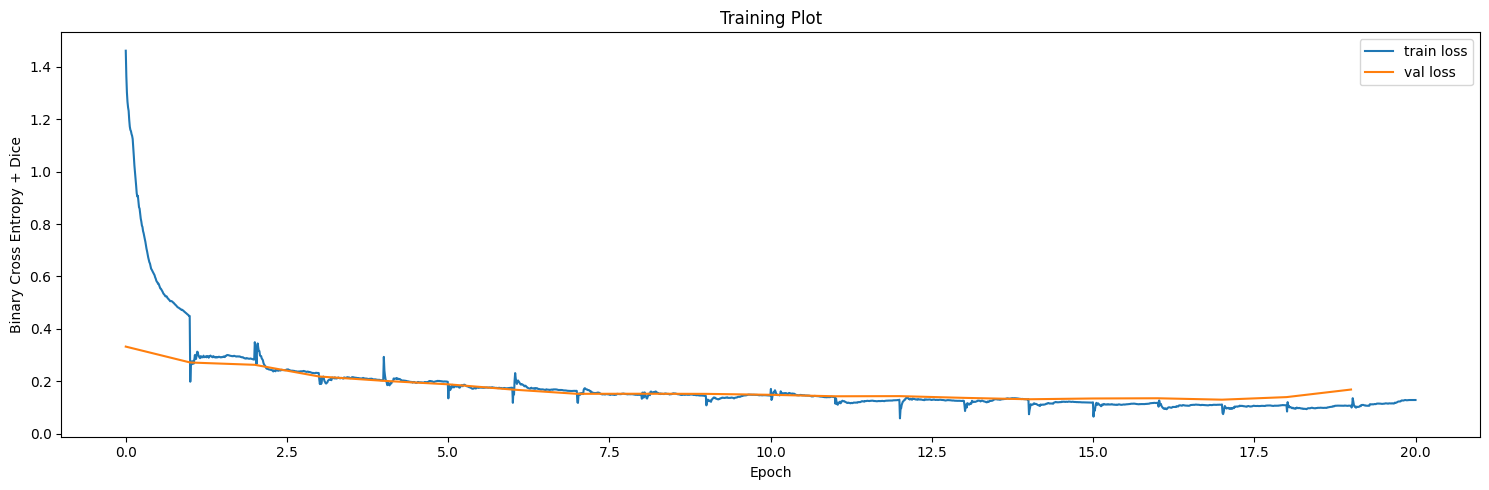

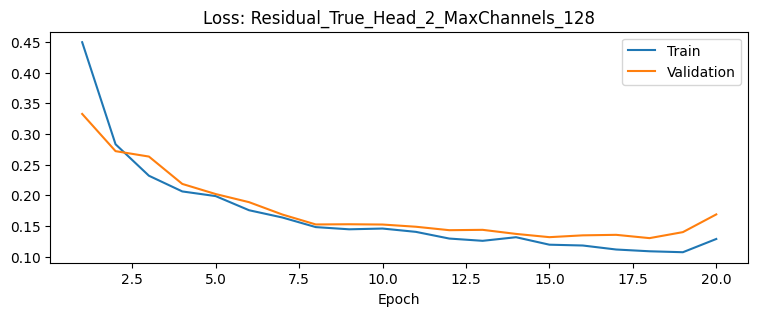

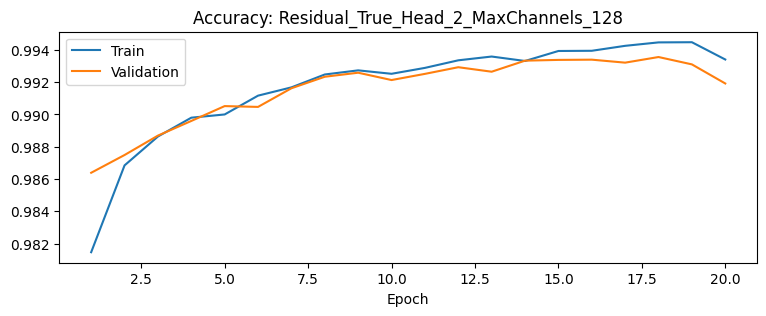

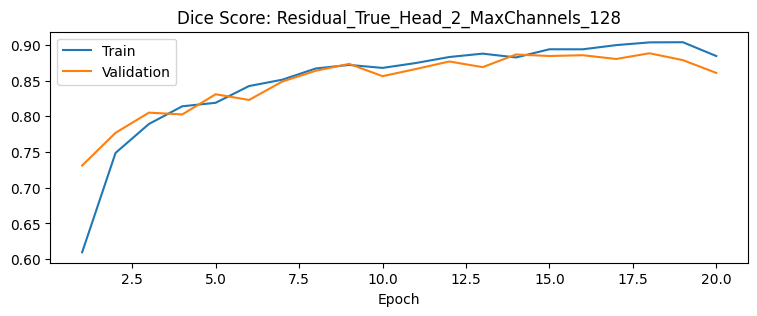

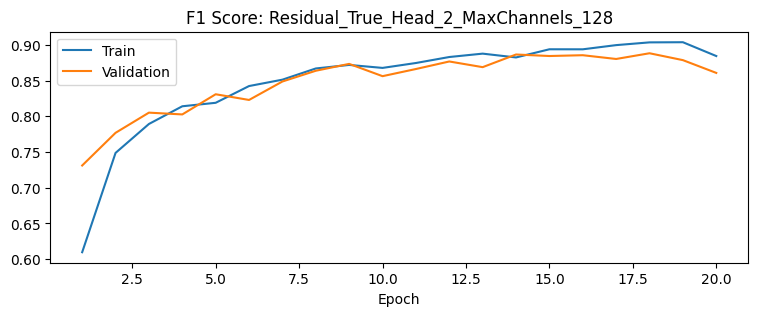

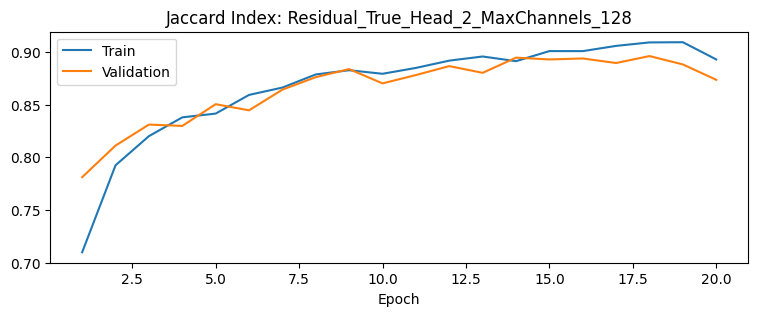

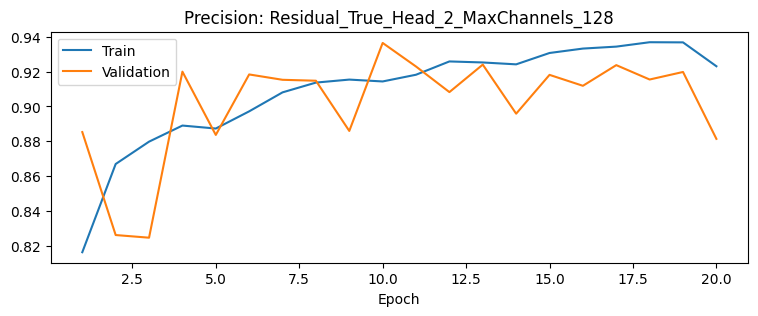

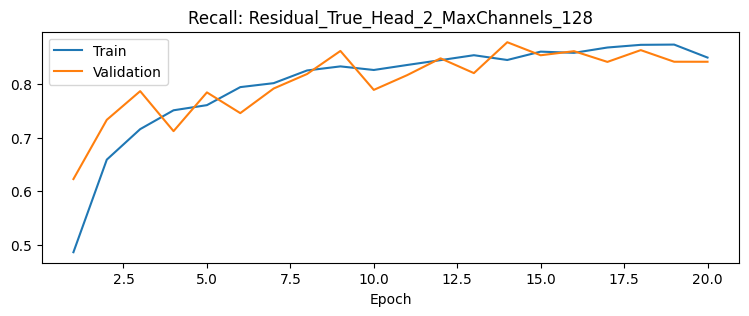

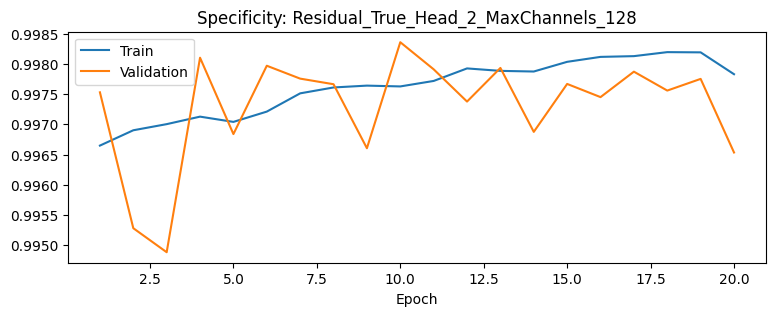

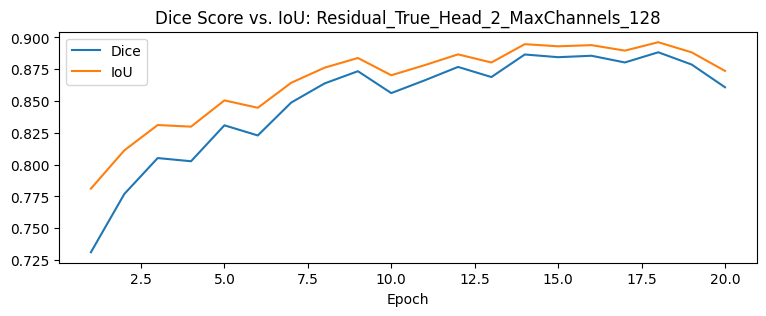

res_True_head_2_ch_256 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3712]


Training   - Accuracy: 0.9755 | Dice: 0.5163 | IoU: 0.6616 | Loss: 0.5270
Validation - Accuracy: 0.9851 | Dice: 0.7434 | IoU: 0.7882 | Loss: 0.3582

res_True_head_2_ch_256 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9791, Dice=0.0116, IoU=0.4925, Loss=0.2950]


Training   - Accuracy: 0.9861 | Dice: 0.7305 | IoU: 0.7806 | Loss: 0.3000
Validation - Accuracy: 0.9875 | Dice: 0.7623 | IoU: 0.8016 | Loss: 0.2855

res_True_head_2_ch_256 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.2956]


Training   - Accuracy: 0.9864 | Dice: 0.7366 | IoU: 0.7846 | Loss: 0.2950
Validation - Accuracy: 0.9878 | Dice: 0.7687 | IoU: 0.8059 | Loss: 0.2822

res_True_head_2_ch_256 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.96it/s, Acc=0.9814, Dice=0.2052, IoU=0.5479, Loss=0.2868]


Training   - Accuracy: 0.9871 | Dice: 0.7561 | IoU: 0.7973 | Loss: 0.2704
Validation - Accuracy: 0.9874 | Dice: 0.7618 | IoU: 0.8012 | Loss: 0.2815

res_True_head_2_ch_256 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9850, Dice=0.4478, IoU=0.6367, Loss=0.2196]


Training   - Accuracy: 0.9887 | Dice: 0.7910 | IoU: 0.8214 | Loss: 0.2274
Validation - Accuracy: 0.9897 | Dice: 0.8171 | IoU: 0.8401 | Loss: 0.2163

res_True_head_2_ch_256 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, Acc=0.9802, Dice=0.1116, IoU=0.5197, Loss=0.2881]

Training   - Accuracy: 0.9894 | Dice: 0.8049 | IoU: 0.8314 | Loss: 0.2155
Validation - Accuracy: 0.9865 | Dice: 0.7176 | IoU: 0.7729 | Loss: 0.2820

res_True_head_2_ch_256 - Epoch 7/20



Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9791, Dice=0.0058, IoU=0.4910, Loss=0.2686]

Training   - Accuracy: 0.9892 | Dice: 0.7999 | IoU: 0.8277 | Loss: 0.2169
Validation - Accuracy: 0.9887 | Dice: 0.7816 | IoU: 0.8150 | Loss: 0.2555

res_True_head_2_ch_256 - Epoch 8/20



Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9905, Dice=0.7124, IoU=0.7718, Loss=0.2246]


Training   - Accuracy: 0.9902 | Dice: 0.8216 | IoU: 0.8436 | Loss: 0.1974
Validation - Accuracy: 0.9893 | Dice: 0.7952 | IoU: 0.8246 | Loss: 0.2244

res_True_head_2_ch_256 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.96it/s, Acc=0.9949, Dice=0.8680, IoU=0.8808, Loss=0.1947]


Training   - Accuracy: 0.9909 | Dice: 0.8355 | IoU: 0.8541 | Loss: 0.1822
Validation - Accuracy: 0.9908 | Dice: 0.8454 | IoU: 0.8614 | Loss: 0.1961

res_True_head_2_ch_256 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, Acc=0.9857, Dice=0.4846, IoU=0.6527, Loss=0.1770]


Training   - Accuracy: 0.9914 | Dice: 0.8457 | IoU: 0.8619 | Loss: 0.1696
Validation - Accuracy: 0.9916 | Dice: 0.8489 | IoU: 0.8644 | Loss: 0.1736

res_True_head_2_ch_256 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.96it/s, Acc=0.9949, Dice=0.8656, IoU=0.8789, Loss=0.2074]


Training   - Accuracy: 0.9918 | Dice: 0.8542 | IoU: 0.8685 | Loss: 0.1624
Validation - Accuracy: 0.9892 | Dice: 0.7880 | IoU: 0.8196 | Loss: 0.2092

res_True_head_2_ch_256 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9916, Dice=0.7513, IoU=0.7966, Loss=0.1655]

Training   - Accuracy: 0.9921 | Dice: 0.8611 | IoU: 0.8740 | Loss: 0.1542
Validation - Accuracy: 0.9917 | Dice: 0.8486 | IoU: 0.8643 | Loss: 0.1653

res_True_head_2_ch_256 - Epoch 13/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, Acc=0.9956, Dice=0.8879, IoU=0.8969, Loss=0.1653]


Training   - Accuracy: 0.9920 | Dice: 0.8577 | IoU: 0.8713 | Loss: 0.1572
Validation - Accuracy: 0.9914 | Dice: 0.8406 | IoU: 0.8581 | Loss: 0.1665

res_True_head_2_ch_256 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, Acc=0.9963, Dice=0.9164, IoU=0.9210, Loss=0.1671]

Training   - Accuracy: 0.9924 | Dice: 0.8657 | IoU: 0.8777 | Loss: 0.1508
Validation - Accuracy: 0.9922 | Dice: 0.8726 | IoU: 0.8830 | Loss: 0.1682

res_True_head_2_ch_256 - Epoch 15/20



Validation: 100%|██████████| 35/35 [00:11<00:00,  2.93it/s, Acc=0.9955, Dice=0.8926, IoU=0.9007, Loss=0.1510]


Training   - Accuracy: 0.9926 | Dice: 0.8688 | IoU: 0.8802 | Loss: 0.1459
Validation - Accuracy: 0.9928 | Dice: 0.8778 | IoU: 0.8874 | Loss: 0.1515

res_True_head_2_ch_256 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9960, Dice=0.9036, IoU=0.9100, Loss=0.1485]


Training   - Accuracy: 0.9930 | Dice: 0.8770 | IoU: 0.8869 | Loss: 0.1339
Validation - Accuracy: 0.9927 | Dice: 0.8745 | IoU: 0.8848 | Loss: 0.1492

res_True_head_2_ch_256 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, Acc=0.9842, Dice=0.3988, IoU=0.6166, Loss=0.1699]


Training   - Accuracy: 0.9937 | Dice: 0.8897 | IoU: 0.8975 | Loss: 0.1253
Validation - Accuracy: 0.9922 | Dice: 0.8619 | IoU: 0.8747 | Loss: 0.1631

res_True_head_2_ch_256 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, Acc=0.9966, Dice=0.9201, IoU=0.9243, Loss=0.1485]


Training   - Accuracy: 0.9936 | Dice: 0.8873 | IoU: 0.8954 | Loss: 0.1257
Validation - Accuracy: 0.9923 | Dice: 0.8609 | IoU: 0.8739 | Loss: 0.1496

res_True_head_2_ch_256 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, Acc=0.9961, Dice=0.9018, IoU=0.9086, Loss=0.1519]


Training   - Accuracy: 0.9936 | Dice: 0.8872 | IoU: 0.8954 | Loss: 0.1264
Validation - Accuracy: 0.9928 | Dice: 0.8798 | IoU: 0.8890 | Loss: 0.1531

res_True_head_2_ch_256 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  2.95it/s, Acc=0.9968, Dice=0.9236, IoU=0.9274, Loss=0.1341]


Training   - Accuracy: 0.9936 | Dice: 0.8880 | IoU: 0.8960 | Loss: 0.1234
Validation - Accuracy: 0.9934 | Dice: 0.8867 | IoU: 0.8948 | Loss: 0.1350



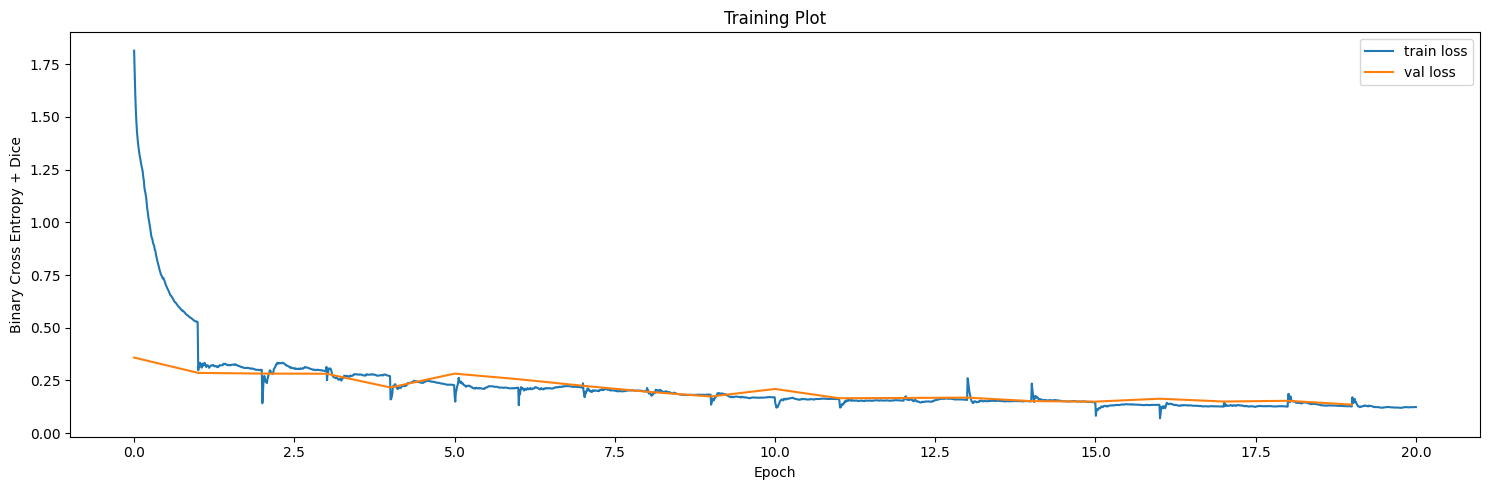

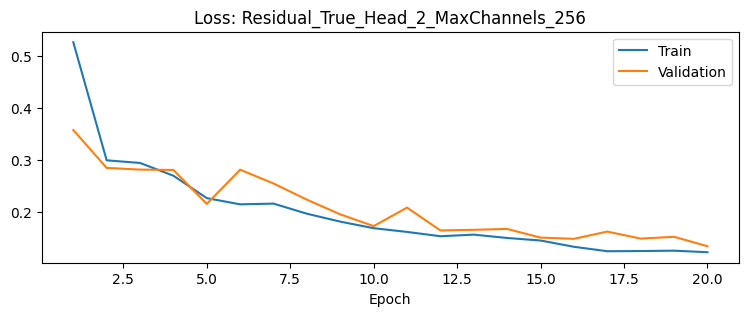

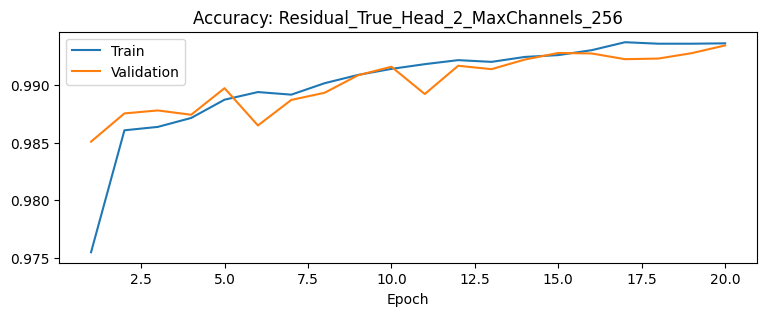

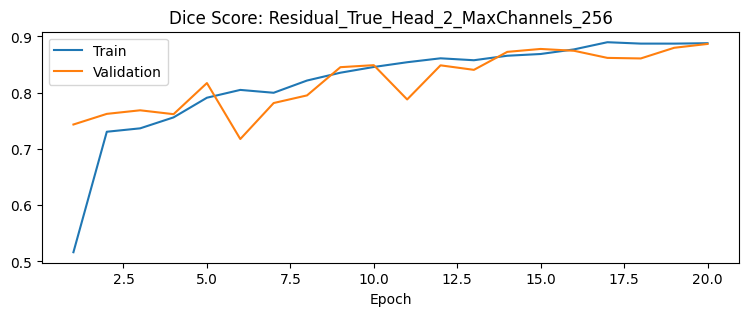

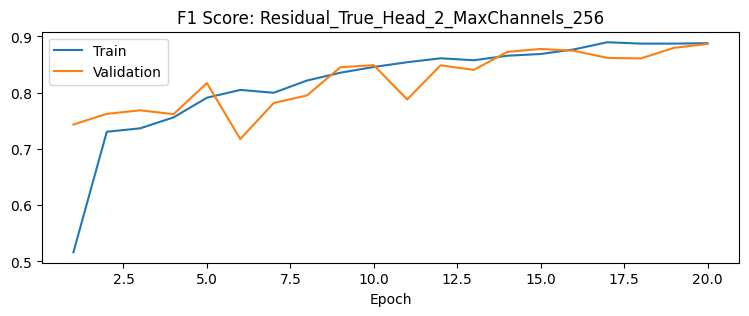

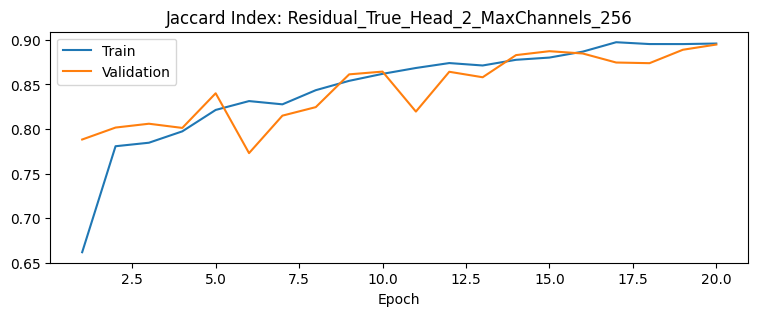

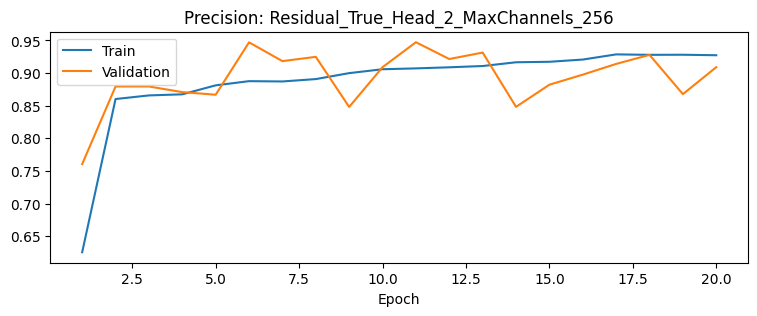

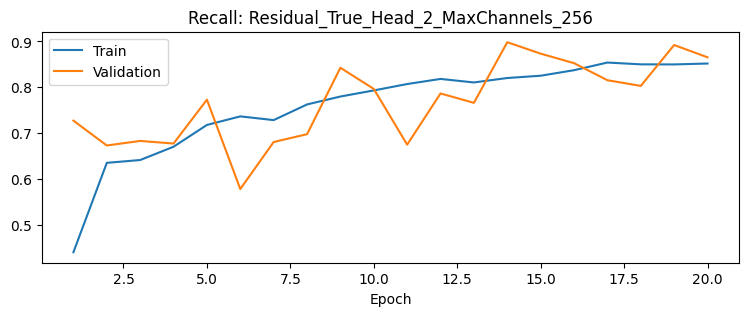

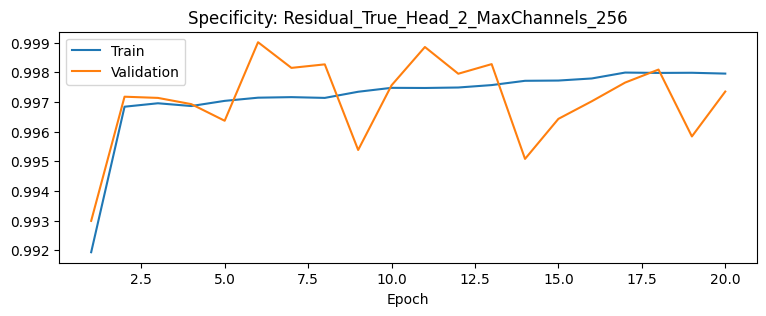

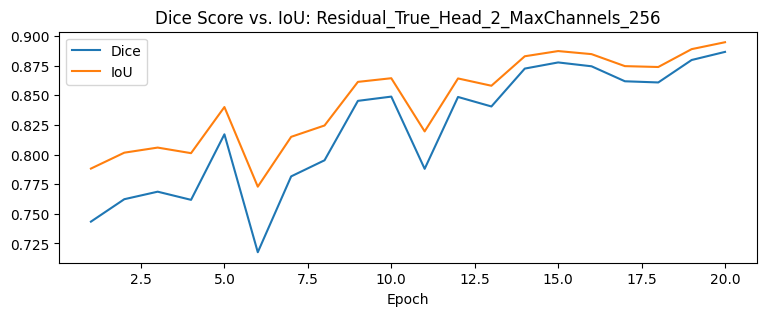

res_True_head_2_ch_512 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.88it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.4646]


Training   - Accuracy: 0.9819 | Dice: 0.6221 | IoU: 0.7165 | Loss: 0.4331
Validation - Accuracy: 0.9829 | Dice: 0.6095 | IoU: 0.7105 | Loss: 0.4540

res_True_head_2_ch_512 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.87it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3233]


Training   - Accuracy: 0.9868 | Dice: 0.7477 | IoU: 0.7918 | Loss: 0.2789
Validation - Accuracy: 0.9862 | Dice: 0.7670 | IoU: 0.8040 | Loss: 0.3097

res_True_head_2_ch_512 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.90it/s, Acc=0.9846, Dice=0.4202, IoU=0.6252, Loss=0.2630]


Training   - Accuracy: 0.9879 | Dice: 0.7734 | IoU: 0.8091 | Loss: 0.2468
Validation - Accuracy: 0.9878 | Dice: 0.7555 | IoU: 0.7973 | Loss: 0.2604

res_True_head_2_ch_512 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.82it/s, Acc=0.9901, Dice=0.6978, IoU=0.7629, Loss=0.2037]


Training   - Accuracy: 0.9890 | Dice: 0.7972 | IoU: 0.8258 | Loss: 0.2216
Validation - Accuracy: 0.9901 | Dice: 0.8338 | IoU: 0.8524 | Loss: 0.2041

res_True_head_2_ch_512 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.85it/s, Acc=0.9929, Dice=0.8041, IoU=0.8326, Loss=0.1945]


Training   - Accuracy: 0.9904 | Dice: 0.8264 | IoU: 0.8472 | Loss: 0.1926
Validation - Accuracy: 0.9903 | Dice: 0.8156 | IoU: 0.8393 | Loss: 0.1953

res_True_head_2_ch_512 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.91it/s, Acc=0.9960, Dice=0.9058, IoU=0.9119, Loss=0.1711]


Training   - Accuracy: 0.9917 | Dice: 0.8521 | IoU: 0.8669 | Loss: 0.1637
Validation - Accuracy: 0.9915 | Dice: 0.8528 | IoU: 0.8673 | Loss: 0.1720

res_True_head_2_ch_512 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.89it/s, Acc=0.9929, Dice=0.8000, IoU=0.8297, Loss=0.1894]


Training   - Accuracy: 0.9915 | Dice: 0.8478 | IoU: 0.8635 | Loss: 0.1688
Validation - Accuracy: 0.9905 | Dice: 0.8227 | IoU: 0.8446 | Loss: 0.1900

res_True_head_2_ch_512 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.86it/s, Acc=0.9922, Dice=0.7741, IoU=0.8118, Loss=0.1726]


Training   - Accuracy: 0.9919 | Dice: 0.8550 | IoU: 0.8692 | Loss: 0.1598
Validation - Accuracy: 0.9912 | Dice: 0.8346 | IoU: 0.8536 | Loss: 0.1731

res_True_head_2_ch_512 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.85it/s, Acc=0.9937, Dice=0.8237, IoU=0.8469, Loss=0.1696]


Training   - Accuracy: 0.9924 | Dice: 0.8645 | IoU: 0.8767 | Loss: 0.1502
Validation - Accuracy: 0.9913 | Dice: 0.8390 | IoU: 0.8569 | Loss: 0.1705

res_True_head_2_ch_512 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.88it/s, Acc=0.9944, Dice=0.8484, IoU=0.8655, Loss=0.1513]


Training   - Accuracy: 0.9932 | Dice: 0.8800 | IoU: 0.8894 | Loss: 0.1339
Validation - Accuracy: 0.9924 | Dice: 0.8660 | IoU: 0.8779 | Loss: 0.1518

res_True_head_2_ch_512 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.89it/s, Acc=0.9969, Dice=0.9291, IoU=0.9322, Loss=0.1573]


Training   - Accuracy: 0.9935 | Dice: 0.8848 | IoU: 0.8933 | Loss: 0.1282
Validation - Accuracy: 0.9925 | Dice: 0.8767 | IoU: 0.8864 | Loss: 0.1585

res_True_head_2_ch_512 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.85it/s, Acc=0.9866, Dice=0.5350, IoU=0.6759, Loss=0.1962]


Training   - Accuracy: 0.9935 | Dice: 0.8865 | IoU: 0.8947 | Loss: 0.1277
Validation - Accuracy: 0.9903 | Dice: 0.8114 | IoU: 0.8364 | Loss: 0.1933

res_True_head_2_ch_512 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s, Acc=0.9961, Dice=0.8993, IoU=0.9065, Loss=0.1392]


Training   - Accuracy: 0.9939 | Dice: 0.8926 | IoU: 0.8999 | Loss: 0.1182
Validation - Accuracy: 0.9933 | Dice: 0.8855 | IoU: 0.8938 | Loss: 0.1401

res_True_head_2_ch_512 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.87it/s, Acc=0.9957, Dice=0.8876, IoU=0.8968, Loss=0.1383]


Training   - Accuracy: 0.9944 | Dice: 0.9021 | IoU: 0.9080 | Loss: 0.1108
Validation - Accuracy: 0.9928 | Dice: 0.8692 | IoU: 0.8807 | Loss: 0.1391

res_True_head_2_ch_512 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.84it/s, Acc=0.9954, Dice=0.8837, IoU=0.8934, Loss=0.1707]


Training   - Accuracy: 0.9936 | Dice: 0.8880 | IoU: 0.8960 | Loss: 0.1244
Validation - Accuracy: 0.9916 | Dice: 0.8515 | IoU: 0.8664 | Loss: 0.1717

res_True_head_2_ch_512 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.86it/s, Acc=0.9960, Dice=0.8960, IoU=0.9037, Loss=0.1455]


Training   - Accuracy: 0.9931 | Dice: 0.8788 | IoU: 0.8884 | Loss: 0.1335
Validation - Accuracy: 0.9924 | Dice: 0.8608 | IoU: 0.8739 | Loss: 0.1466

res_True_head_2_ch_512 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.87it/s, Acc=0.9965, Dice=0.9150, IoU=0.9199, Loss=0.1367]


Training   - Accuracy: 0.9941 | Dice: 0.8978 | IoU: 0.9043 | Loss: 0.1130
Validation - Accuracy: 0.9930 | Dice: 0.8732 | IoU: 0.8839 | Loss: 0.1376

res_True_head_2_ch_512 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.88it/s, Acc=0.9971, Dice=0.9297, IoU=0.9328, Loss=0.1274]


Training   - Accuracy: 0.9944 | Dice: 0.9030 | IoU: 0.9088 | Loss: 0.1081
Validation - Accuracy: 0.9936 | Dice: 0.8862 | IoU: 0.8946 | Loss: 0.1283

res_True_head_2_ch_512 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.86it/s, Acc=0.9968, Dice=0.9198, IoU=0.9241, Loss=0.1229]


Training   - Accuracy: 0.9944 | Dice: 0.9029 | IoU: 0.9086 | Loss: 0.1086
Validation - Accuracy: 0.9939 | Dice: 0.8925 | IoU: 0.8998 | Loss: 0.1238

res_True_head_2_ch_512 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:12<00:00,  2.83it/s, Acc=0.9968, Dice=0.9203, IoU=0.9245, Loss=0.1337]


Training   - Accuracy: 0.9949 | Dice: 0.9117 | IoU: 0.9163 | Loss: 0.0982
Validation - Accuracy: 0.9930 | Dice: 0.8718 | IoU: 0.8828 | Loss: 0.1347



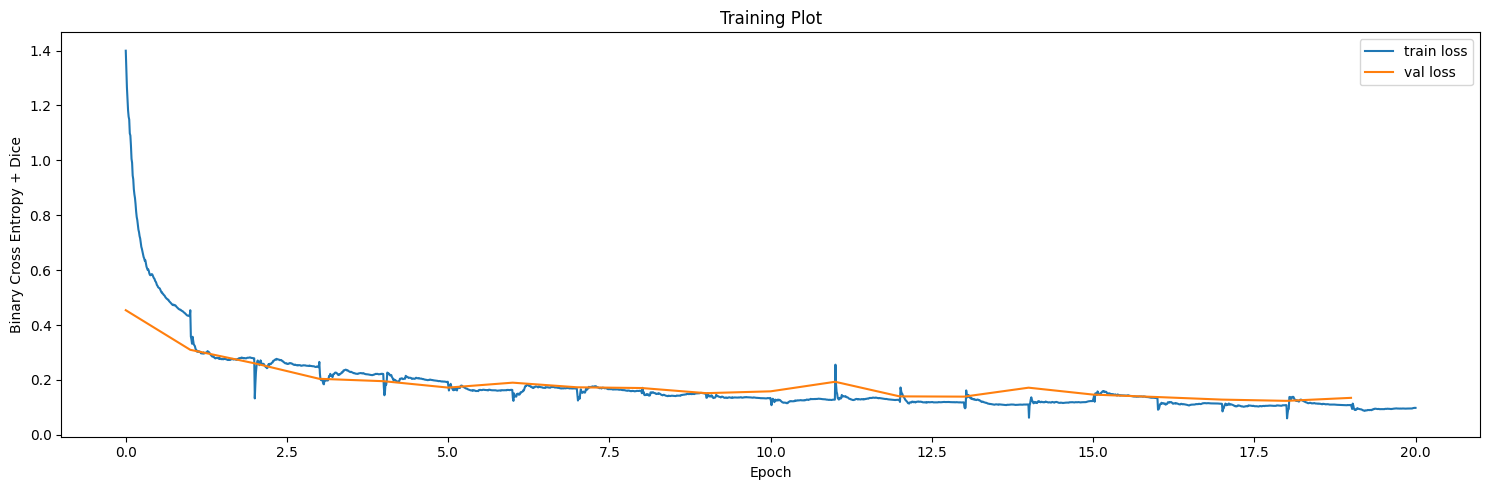

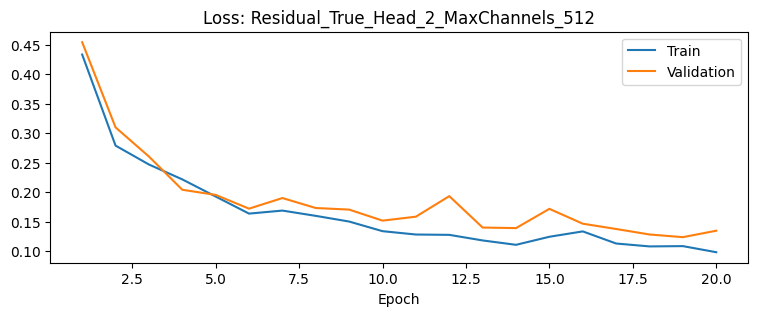

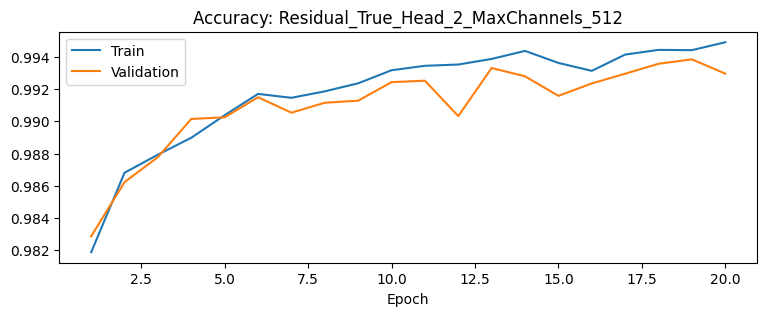

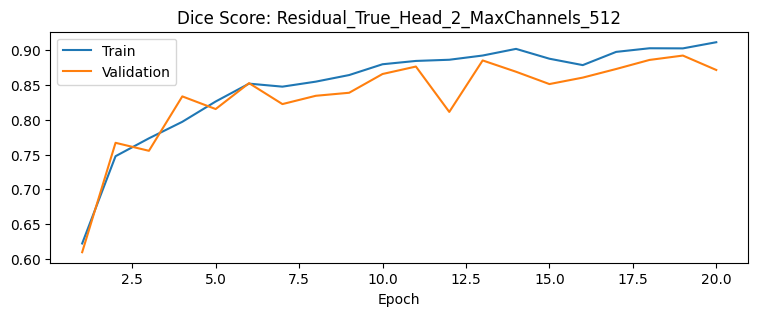

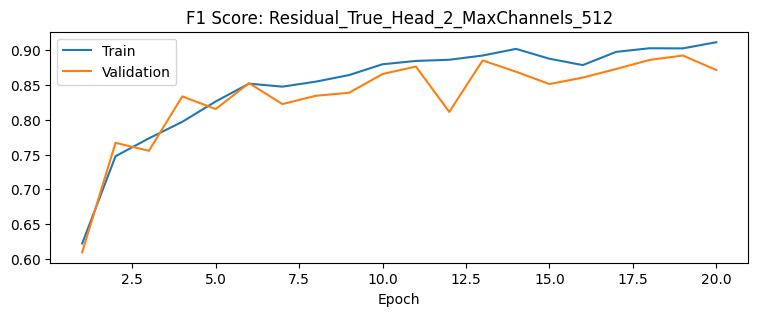

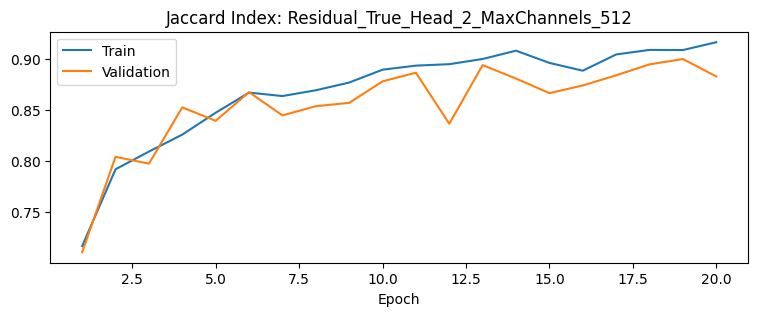

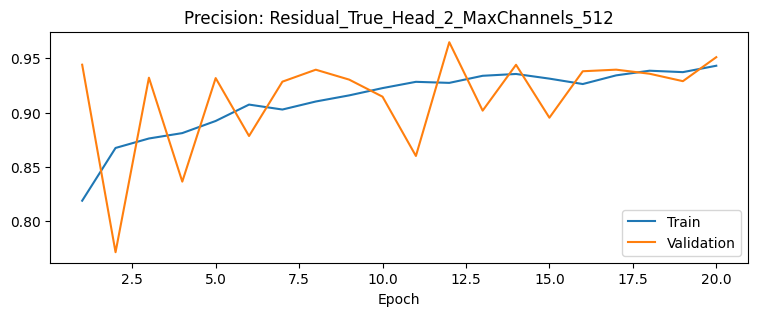

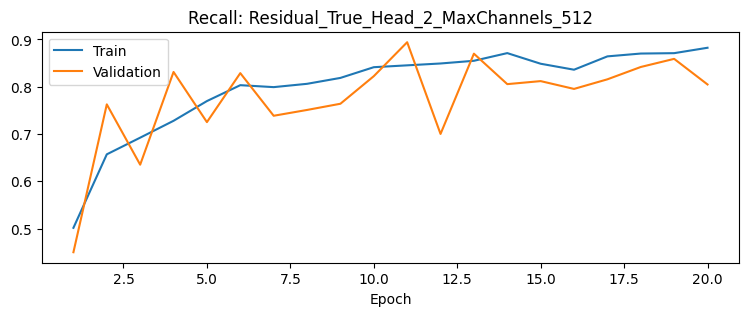

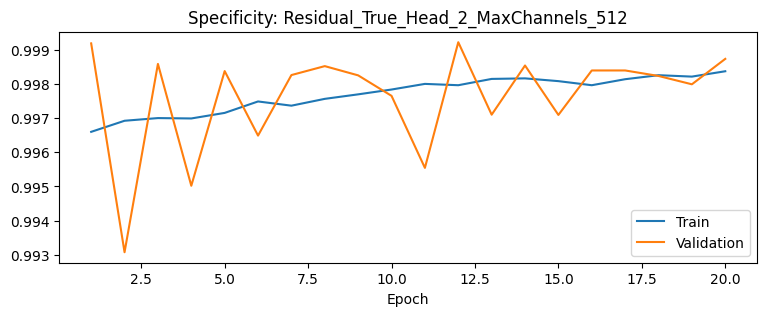

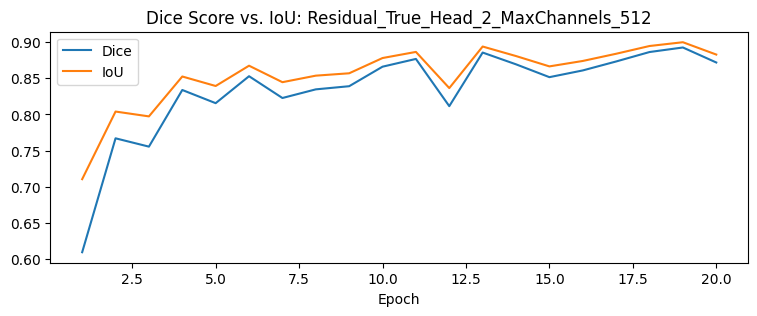

In [8]:
best_model = None
best_dice_score = 0.0
best_train_loss_batch_history = None
best_train_loss_history = None
best_val_loss_history = None
best_train_metrics = None
best_val_metrics = None

seed = 42
epochs = 20
channels = (3, 32, 64, 128, 256, 512)
is_residual = True
bias = True
heads = 4
learning_rate = 1e-3
weight_decay = 1e-5
lr_reduce_factor = 0.15
patience = 2
model_name = 'TransformerUNet'

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

channels = [[3, 32, 64, 128], [3, 32, 64, 128, 256], [3, 32, 64, 128, 256, 512]]
residuals = [False, True]
all_heads = [2]

for res in residuals:
    for head in all_heads:
        for ch in channels:
            model_path = f'res_{res}_head_{head}_ch_{ch[-1]}'
            model = TransformerUNetParallel(ch, head, size[0], res, bias)
            criterion = DiceBCELoss('cuda:0').to(device='cuda:0')
            optimizer = torch.optim.Adam(model.parameters())
            # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=lr_reduce_factor, patience=patience)
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-6)

            solver = Solver(
                model,
                epochs,
                device,
                train_loader,
                val_loader,
                criterion,
                optimizer,
                scheduler,
                model_name,
                model_path
            )

            solver.fit()
        
            best_train_loss_batch_history = solver.train_loss_batch
            best_train_loss_history = solver.train_loss_history
            best_val_loss_history = solver.val_loss_history
            best_train_metrics = solver.train_metrics
            best_val_metrics = solver.val_metrics

            plot_path = f'saved_plots/{model_name}/{model_path}'
            title = f'Residual_{res}_Head_{head}_MaxChannels_{ch[-1]}'
            plot_losses(best_train_loss_batch_history, best_val_loss_history, f'{plot_path}_train.png')
            train_metrics_acc = best_train_metrics.get_metrics()
            val_metrics_acc = best_val_metrics.get_metrics()

            plot_generic(f'Loss: {title}', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history, f'{plot_path}_Loss.png')
            plot_generic(f'Accuracy: {title}', 'Epoch', 'Train', train_metrics_acc[ACCURACY], 'Validation', val_metrics_acc[ACCURACY], f'{plot_path}_Accuracy.png')
            plot_generic(f'Dice Score: {title}', 'Epoch', 'Train', train_metrics_acc[DICE_SCORE], 'Validation', val_metrics_acc[DICE_SCORE], f'{plot_path}_Dice.png')
            plot_generic(f'F1 Score: {title}', 'Epoch', 'Train', train_metrics_acc[F1_SCORE], 'Validation', val_metrics_acc[F1_SCORE], f'{plot_path}_F1.png')
            plot_generic(f'Jaccard Index: {title}', 'Epoch', 'Train', train_metrics_acc[JACCARD_INDEX], 'Validation', val_metrics_acc[JACCARD_INDEX], f'{plot_path}_IoU.png')
            plot_generic(f'Precision: {title}', 'Epoch', 'Train', train_metrics_acc[PRECISION], 'Validation', val_metrics_acc[PRECISION], f'{plot_path}_Precision.png')
            plot_generic(f'Recall: {title}', 'Epoch', 'Train', train_metrics_acc[RECALL], 'Validation', val_metrics_acc[RECALL], f'{plot_path}_Recall.png')
            plot_generic(f'Specificity: {title}', 'Epoch', 'Train', train_metrics_acc[SPECIFICITY], 'Validation', val_metrics_acc[SPECIFICITY], f'{plot_path}_Specifity.png')
            plot_generic(f'Dice Score vs. IoU: {title}', 'Epoch', 'Dice', val_metrics_acc[DICE_SCORE], 'IoU', val_metrics_acc[JACCARD_INDEX], f'{plot_path}_DiceVsIoU.png')

            #if solver.best_dice_score > best_dice_score:
                #best_model = solver.best_model
                #best_dice_score = solver.best_dice_score
                #best_train_loss_batch_history = solver.train_loss_batch
                #best_train_loss_history = solver.train_loss_history
                #best_val_loss_history = solver.val_loss_history
                #best_train_metrics = solver.train_metrics
                #best_val_metrics = solver.val_metrics
                #best_train_loss = solver.best_train_loss
                #best_val_loss = solver.best_val_loss
                #torch.save(best_model, f'saved_models/{model_name}/Dice_{best_dice_score:.4f}_lr_{learning_rate}_train_loss_{best_train_loss:.4f}_val_loss_{best_val_loss:.4f}_heads_{heads}_ch_{channels[-1]}.pt')


res_False_head_1_ch_128 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:07<00:00,  4.45it/s, Acc=0.9797, Dice=0.0620, IoU=0.5058, Loss=0.4492]


Training   - Accuracy: 0.9815 | Dice: 0.6203 | IoU: 0.7154 | Loss: 0.4834
Validation - Accuracy: 0.9828 | Dice: 0.6093 | IoU: 0.7103 | Loss: 0.4422

res_False_head_1_ch_128 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:07<00:00,  4.44it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3410]


Training   - Accuracy: 0.9849 | Dice: 0.7030 | IoU: 0.7634 | Loss: 0.3320
Validation - Accuracy: 0.9861 | Dice: 0.7130 | IoU: 0.7699 | Loss: 0.3280

res_False_head_1_ch_128 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.21it/s, Acc=0.9792, Dice=0.0192, IoU=0.4944, Loss=0.3186]


Training   - Accuracy: 0.9862 | Dice: 0.7314 | IoU: 0.7813 | Loss: 0.2951
Validation - Accuracy: 0.9871 | Dice: 0.7507 | IoU: 0.7939 | Loss: 0.3100

res_False_head_1_ch_128 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:07<00:00,  4.45it/s, Acc=0.9906, Dice=0.7203, IoU=0.7767, Loss=0.2624]


Training   - Accuracy: 0.9874 | Dice: 0.7583 | IoU: 0.7989 | Loss: 0.2654
Validation - Accuracy: 0.9876 | Dice: 0.7567 | IoU: 0.7980 | Loss: 0.2632

res_False_head_1_ch_128 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.19it/s, Acc=0.9930, Dice=0.8056, IoU=0.8337, Loss=0.2314]


Training   - Accuracy: 0.9879 | Dice: 0.7716 | IoU: 0.8079 | Loss: 0.2481
Validation - Accuracy: 0.9889 | Dice: 0.7888 | IoU: 0.8200 | Loss: 0.2333

res_False_head_1_ch_128 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.23it/s, Acc=0.9926, Dice=0.7913, IoU=0.8236, Loss=0.2324]


Training   - Accuracy: 0.9889 | Dice: 0.7934 | IoU: 0.8231 | Loss: 0.2260
Validation - Accuracy: 0.9881 | Dice: 0.7628 | IoU: 0.8023 | Loss: 0.2339

res_False_head_1_ch_128 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.26it/s, Acc=0.9959, Dice=0.9022, IoU=0.9088, Loss=0.2014]


Training   - Accuracy: 0.9893 | Dice: 0.8039 | IoU: 0.8306 | Loss: 0.2116
Validation - Accuracy: 0.9903 | Dice: 0.8296 | IoU: 0.8494 | Loss: 0.2027

res_False_head_1_ch_128 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.20it/s, Acc=0.9956, Dice=0.8927, IoU=0.9009, Loss=0.1740]


Training   - Accuracy: 0.9898 | Dice: 0.8130 | IoU: 0.8373 | Loss: 0.2029
Validation - Accuracy: 0.9917 | Dice: 0.8568 | IoU: 0.8704 | Loss: 0.1754

res_False_head_1_ch_128 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.21it/s, Acc=0.9899, Dice=0.6891, IoU=0.7577, Loss=0.2292]


Training   - Accuracy: 0.9901 | Dice: 0.8201 | IoU: 0.8425 | Loss: 0.1981
Validation - Accuracy: 0.9887 | Dice: 0.7753 | IoU: 0.8108 | Loss: 0.2302

res_False_head_1_ch_128 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.20it/s, Acc=0.9968, Dice=0.9260, IoU=0.9295, Loss=0.1778]


Training   - Accuracy: 0.9912 | Dice: 0.8400 | IoU: 0.8576 | Loss: 0.1728
Validation - Accuracy: 0.9912 | Dice: 0.8398 | IoU: 0.8574 | Loss: 0.1792

res_False_head_1_ch_128 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:07<00:00,  4.46it/s, Acc=0.9932, Dice=0.8121, IoU=0.8384, Loss=0.2114]


Training   - Accuracy: 0.9914 | Dice: 0.8464 | IoU: 0.8624 | Loss: 0.1696
Validation - Accuracy: 0.9896 | Dice: 0.7955 | IoU: 0.8249 | Loss: 0.2127

res_False_head_1_ch_128 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.21it/s, Acc=0.9942, Dice=0.8492, IoU=0.8661, Loss=0.1671]


Training   - Accuracy: 0.9927 | Dice: 0.8716 | IoU: 0.8825 | Loss: 0.1424
Validation - Accuracy: 0.9915 | Dice: 0.8443 | IoU: 0.8610 | Loss: 0.1679

res_False_head_1_ch_128 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.24it/s, Acc=0.9967, Dice=0.9229, IoU=0.9268, Loss=0.1650]


Training   - Accuracy: 0.9926 | Dice: 0.8699 | IoU: 0.8811 | Loss: 0.1444
Validation - Accuracy: 0.9922 | Dice: 0.8701 | IoU: 0.8811 | Loss: 0.1661

res_False_head_1_ch_128 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.21it/s, Acc=0.9964, Dice=0.9163, IoU=0.9209, Loss=0.1570]


Training   - Accuracy: 0.9928 | Dice: 0.8724 | IoU: 0.8832 | Loss: 0.1420
Validation - Accuracy: 0.9918 | Dice: 0.8502 | IoU: 0.8655 | Loss: 0.1581

res_False_head_1_ch_128 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.21it/s, Acc=0.9954, Dice=0.8845, IoU=0.8941, Loss=0.1504]


Training   - Accuracy: 0.9933 | Dice: 0.8828 | IoU: 0.8917 | Loss: 0.1300
Validation - Accuracy: 0.9922 | Dice: 0.8571 | IoU: 0.8710 | Loss: 0.1514

res_False_head_1_ch_128 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.21it/s, Acc=0.9954, Dice=0.8811, IoU=0.8914, Loss=0.1485]


Training   - Accuracy: 0.9935 | Dice: 0.8856 | IoU: 0.8940 | Loss: 0.1284
Validation - Accuracy: 0.9929 | Dice: 0.8778 | IoU: 0.8875 | Loss: 0.1494

res_False_head_1_ch_128 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.30it/s, Acc=0.9937, Dice=0.8271, IoU=0.8494, Loss=0.1534]


Training   - Accuracy: 0.9937 | Dice: 0.8889 | IoU: 0.8967 | Loss: 0.1251
Validation - Accuracy: 0.9922 | Dice: 0.8586 | IoU: 0.8722 | Loss: 0.1535

res_False_head_1_ch_128 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:07<00:00,  4.43it/s, Acc=0.9958, Dice=0.8951, IoU=0.9029, Loss=0.1403]


Training   - Accuracy: 0.9936 | Dice: 0.8870 | IoU: 0.8952 | Loss: 0.1264
Validation - Accuracy: 0.9926 | Dice: 0.8677 | IoU: 0.8794 | Loss: 0.1411

res_False_head_1_ch_128 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:07<00:00,  4.46it/s, Acc=0.9950, Dice=0.8773, IoU=0.8882, Loss=0.1734]


Training   - Accuracy: 0.9938 | Dice: 0.8921 | IoU: 0.8995 | Loss: 0.1214
Validation - Accuracy: 0.9917 | Dice: 0.8666 | IoU: 0.8781 | Loss: 0.1743

res_False_head_1_ch_128 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:07<00:00,  4.47it/s, Acc=0.9886, Dice=0.6351, IoU=0.7269, Loss=0.1655]


Training   - Accuracy: 0.9939 | Dice: 0.8944 | IoU: 0.9014 | Loss: 0.1174
Validation - Accuracy: 0.9923 | Dice: 0.8613 | IoU: 0.8742 | Loss: 0.1630



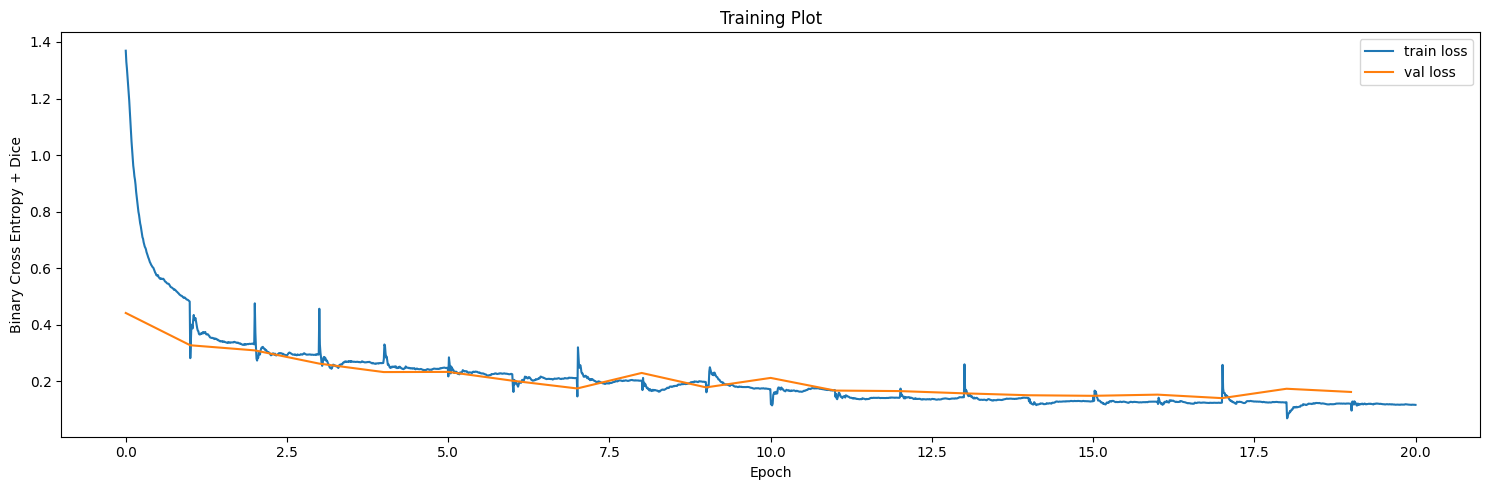

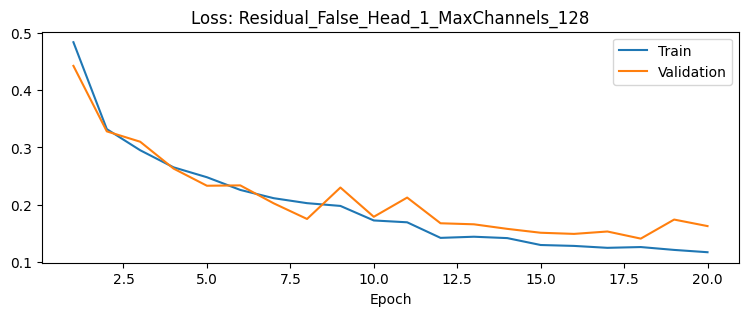

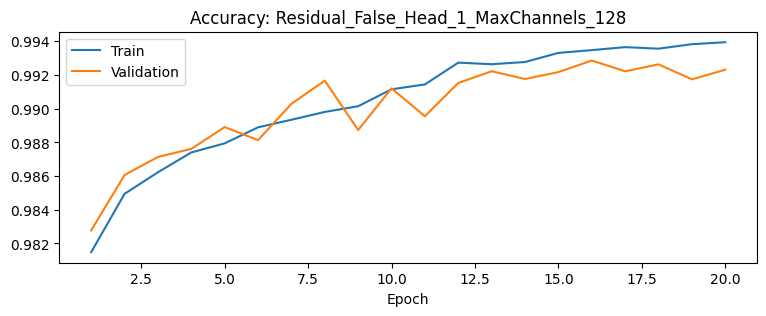

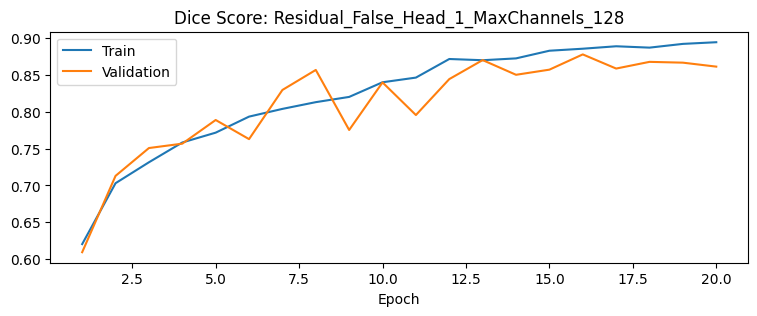

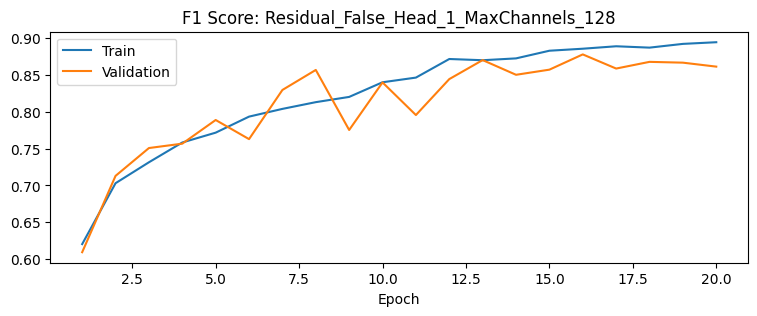

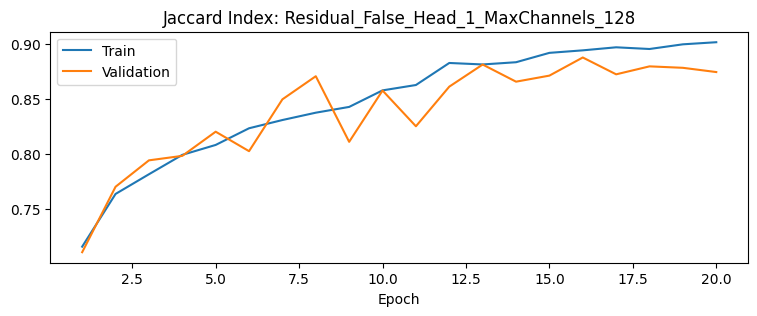

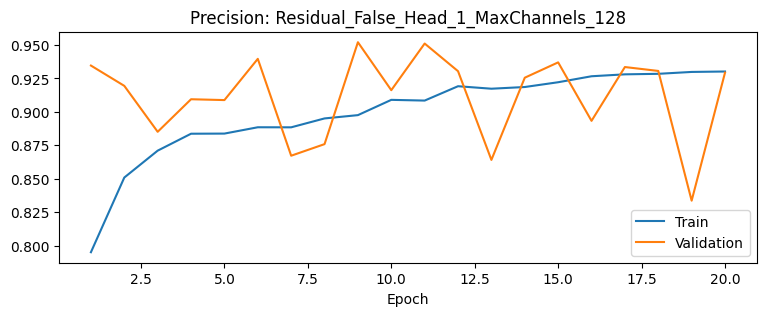

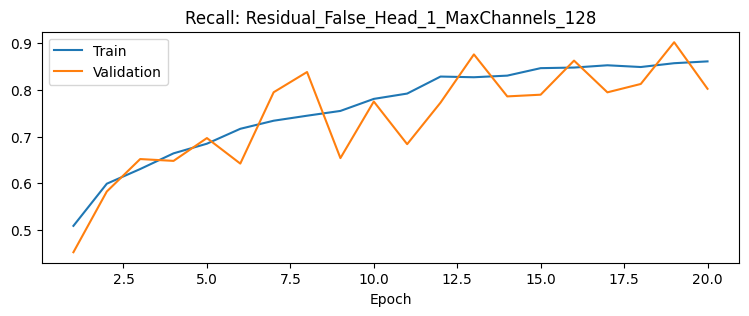

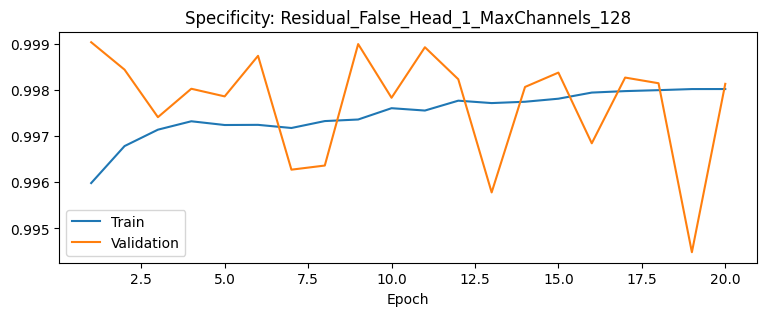

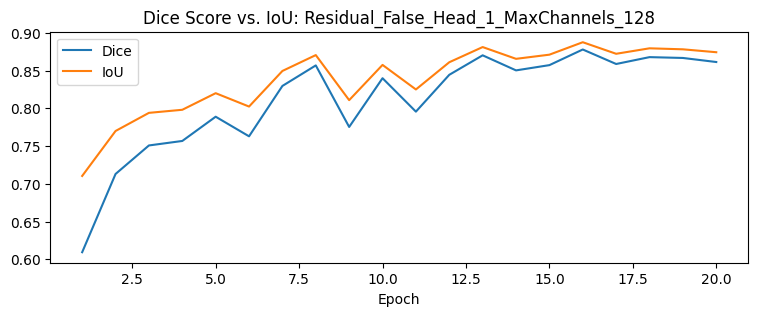

res_False_head_1_ch_256 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.50it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.4659]


Training   - Accuracy: 0.9473 | Dice: 0.3652 | IoU: 0.5850 | Loss: 0.7806
Validation - Accuracy: 0.9849 | Dice: 0.6969 | IoU: 0.7597 | Loss: 0.4535

res_False_head_1_ch_256 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3787]


Training   - Accuracy: 0.9839 | Dice: 0.6689 | IoU: 0.7431 | Loss: 0.4195
Validation - Accuracy: 0.9843 | Dice: 0.6621 | IoU: 0.7394 | Loss: 0.3711

res_False_head_1_ch_256 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.46it/s, Acc=0.9841, Dice=0.3897, IoU=0.6130, Loss=0.3040]


Training   - Accuracy: 0.9860 | Dice: 0.7241 | IoU: 0.7766 | Loss: 0.3250
Validation - Accuracy: 0.9872 | Dice: 0.7484 | IoU: 0.7925 | Loss: 0.3017

res_False_head_1_ch_256 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.45it/s, Acc=0.9949, Dice=0.8748, IoU=0.8862, Loss=0.3111]


Training   - Accuracy: 0.9879 | Dice: 0.7718 | IoU: 0.8080 | Loss: 0.2641
Validation - Accuracy: 0.9864 | Dice: 0.7368 | IoU: 0.7847 | Loss: 0.3136

res_False_head_1_ch_256 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.48it/s, Acc=0.9803, Dice=0.1168, IoU=0.5211, Loss=0.3150]


Training   - Accuracy: 0.9878 | Dice: 0.7732 | IoU: 0.8089 | Loss: 0.2586
Validation - Accuracy: 0.9870 | Dice: 0.7787 | IoU: 0.8121 | Loss: 0.3082

res_False_head_1_ch_256 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.50it/s, Acc=0.9845, Dice=0.4181, IoU=0.6244, Loss=0.2220]


Training   - Accuracy: 0.9883 | Dice: 0.7828 | IoU: 0.8156 | Loss: 0.2401
Validation - Accuracy: 0.9900 | Dice: 0.8177 | IoU: 0.8407 | Loss: 0.2170

res_False_head_1_ch_256 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.48it/s, Acc=0.9947, Dice=0.8630, IoU=0.8768, Loss=0.1883]


Training   - Accuracy: 0.9897 | Dice: 0.8113 | IoU: 0.8360 | Loss: 0.2123
Validation - Accuracy: 0.9912 | Dice: 0.8489 | IoU: 0.8643 | Loss: 0.1894

res_False_head_1_ch_256 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.51it/s, Acc=0.9920, Dice=0.7693, IoU=0.8085, Loss=0.1879]


Training   - Accuracy: 0.9905 | Dice: 0.8279 | IoU: 0.8483 | Loss: 0.1940
Validation - Accuracy: 0.9913 | Dice: 0.8536 | IoU: 0.8678 | Loss: 0.1875

res_False_head_1_ch_256 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.37it/s, Acc=0.9951, Dice=0.8794, IoU=0.8899, Loss=0.1862]


Training   - Accuracy: 0.9907 | Dice: 0.8331 | IoU: 0.8522 | Loss: 0.1905
Validation - Accuracy: 0.9912 | Dice: 0.8452 | IoU: 0.8614 | Loss: 0.1874

res_False_head_1_ch_256 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.52it/s, Acc=0.9915, Dice=0.7506, IoU=0.7961, Loss=0.1861]


Training   - Accuracy: 0.9917 | Dice: 0.8515 | IoU: 0.8664 | Loss: 0.1676
Validation - Accuracy: 0.9915 | Dice: 0.8477 | IoU: 0.8635 | Loss: 0.1853

res_False_head_1_ch_256 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.43it/s, Acc=0.9950, Dice=0.8706, IoU=0.8829, Loss=0.1658]


Training   - Accuracy: 0.9922 | Dice: 0.8620 | IoU: 0.8748 | Loss: 0.1559
Validation - Accuracy: 0.9921 | Dice: 0.8603 | IoU: 0.8734 | Loss: 0.1666

res_False_head_1_ch_256 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.52it/s, Acc=0.9950, Dice=0.8702, IoU=0.8825, Loss=0.1697]


Training   - Accuracy: 0.9928 | Dice: 0.8735 | IoU: 0.8840 | Loss: 0.1441
Validation - Accuracy: 0.9917 | Dice: 0.8481 | IoU: 0.8639 | Loss: 0.1707

res_False_head_1_ch_256 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.43it/s, Acc=0.9923, Dice=0.7807, IoU=0.8163, Loss=0.1940]


Training   - Accuracy: 0.9922 | Dice: 0.8609 | IoU: 0.8738 | Loss: 0.1547
Validation - Accuracy: 0.9911 | Dice: 0.8548 | IoU: 0.8686 | Loss: 0.1939

res_False_head_1_ch_256 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.53it/s, Acc=0.9955, Dice=0.8864, IoU=0.8957, Loss=0.1781]


Training   - Accuracy: 0.9927 | Dice: 0.8703 | IoU: 0.8815 | Loss: 0.1461
Validation - Accuracy: 0.9912 | Dice: 0.8355 | IoU: 0.8543 | Loss: 0.1793

res_False_head_1_ch_256 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.49it/s, Acc=0.9963, Dice=0.9119, IoU=0.9171, Loss=0.1772]


Training   - Accuracy: 0.9916 | Dice: 0.8490 | IoU: 0.8645 | Loss: 0.1673
Validation - Accuracy: 0.9915 | Dice: 0.8573 | IoU: 0.8708 | Loss: 0.1786

res_False_head_1_ch_256 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.52it/s, Acc=0.9923, Dice=0.7807, IoU=0.8163, Loss=0.1550]


Training   - Accuracy: 0.9926 | Dice: 0.8688 | IoU: 0.8802 | Loss: 0.1462
Validation - Accuracy: 0.9925 | Dice: 0.8652 | IoU: 0.8774 | Loss: 0.1547

res_False_head_1_ch_256 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.47it/s, Acc=0.9959, Dice=0.9001, IoU=0.9071, Loss=0.1481]


Training   - Accuracy: 0.9934 | Dice: 0.8847 | IoU: 0.8933 | Loss: 0.1278
Validation - Accuracy: 0.9926 | Dice: 0.8684 | IoU: 0.8799 | Loss: 0.1489

res_False_head_1_ch_256 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.39it/s, Acc=0.9965, Dice=0.9188, IoU=0.9231, Loss=0.1530]


Training   - Accuracy: 0.9935 | Dice: 0.8851 | IoU: 0.8936 | Loss: 0.1295
Validation - Accuracy: 0.9925 | Dice: 0.8676 | IoU: 0.8793 | Loss: 0.1541

res_False_head_1_ch_256 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.51it/s, Acc=0.9960, Dice=0.9059, IoU=0.9119, Loss=0.1419]


Training   - Accuracy: 0.9937 | Dice: 0.8891 | IoU: 0.8969 | Loss: 0.1250
Validation - Accuracy: 0.9932 | Dice: 0.8838 | IoU: 0.8924 | Loss: 0.1425

res_False_head_1_ch_256 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:09<00:00,  3.50it/s, Acc=0.9939, Dice=0.8335, IoU=0.8542, Loss=0.1485]


Training   - Accuracy: 0.9937 | Dice: 0.8898 | IoU: 0.8975 | Loss: 0.1244
Validation - Accuracy: 0.9928 | Dice: 0.8733 | IoU: 0.8838 | Loss: 0.1487



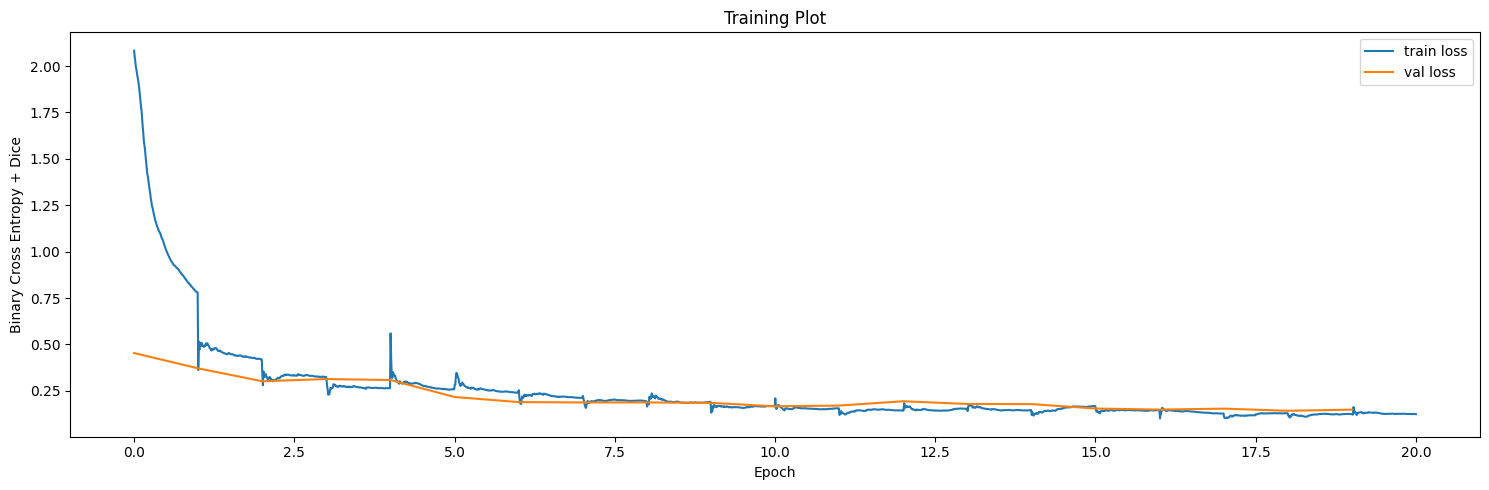

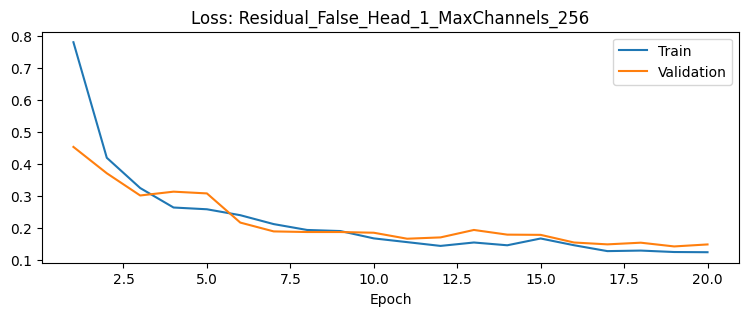

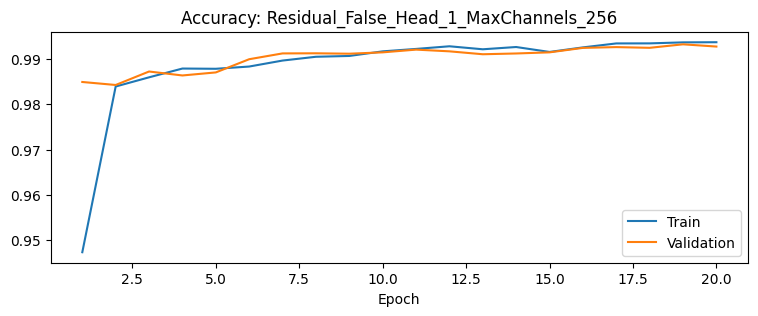

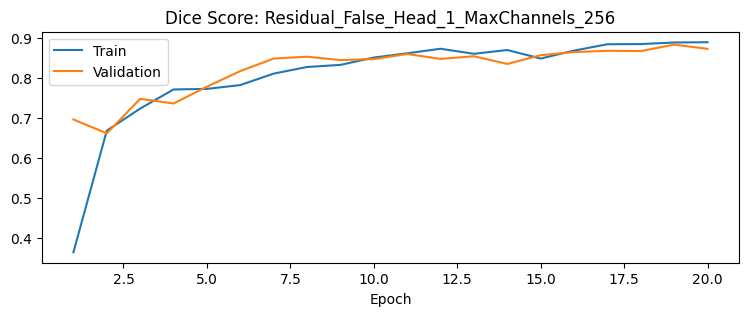

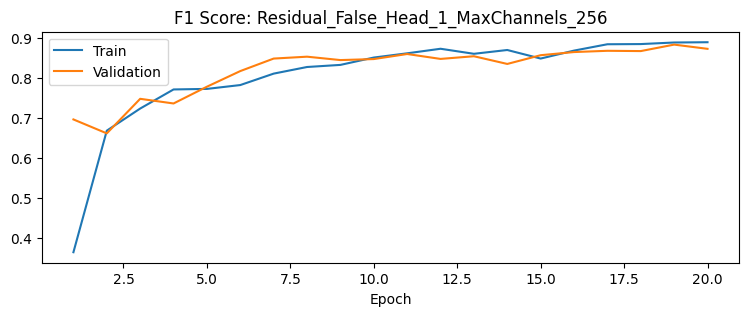

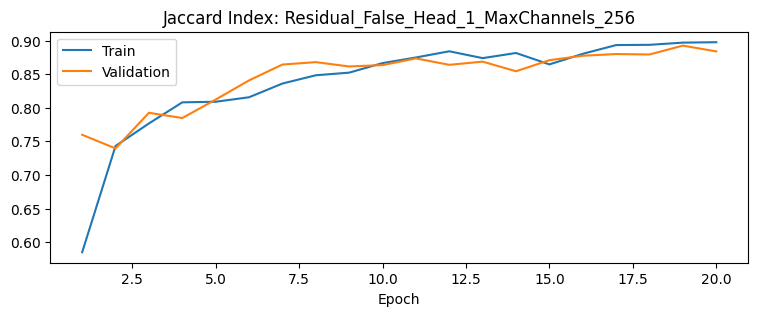

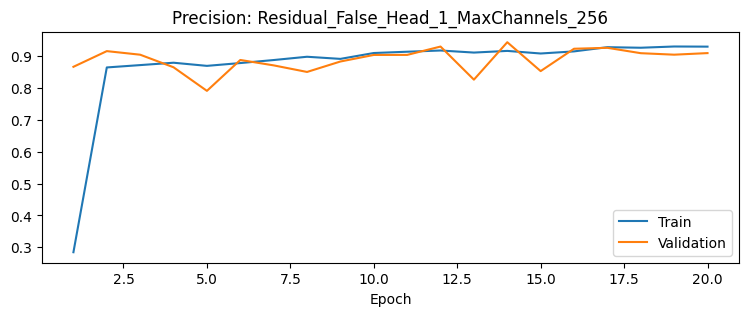

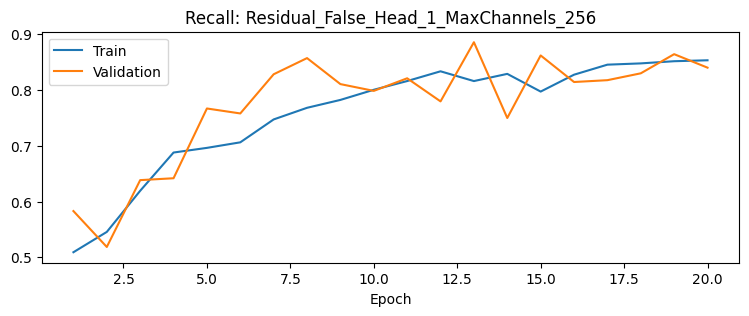

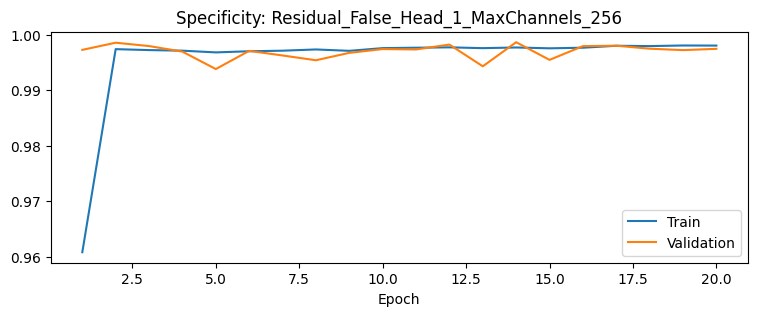

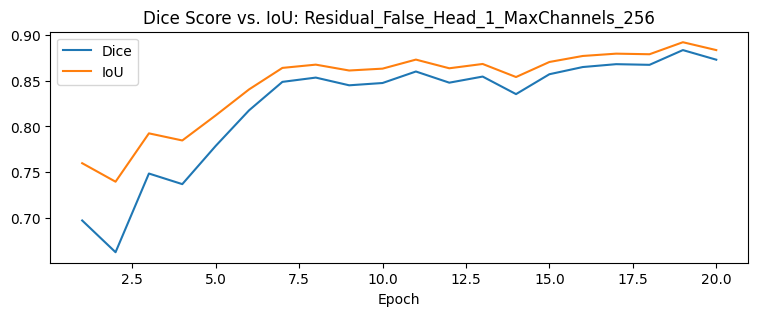

res_False_head_1_ch_512 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.38it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.5310]


Training   - Accuracy: 0.9579 | Dice: 0.3995 | IoU: 0.6035 | Loss: 0.7556
Validation - Accuracy: 0.9832 | Dice: 0.6354 | IoU: 0.7243 | Loss: 0.5197

res_False_head_1_ch_512 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.27it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.4108]


Training   - Accuracy: 0.9830 | Dice: 0.6459 | IoU: 0.7299 | Loss: 0.4379
Validation - Accuracy: 0.9849 | Dice: 0.6814 | IoU: 0.7507 | Loss: 0.3982

res_False_head_1_ch_512 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.39it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3946]


Training   - Accuracy: 0.9846 | Dice: 0.6917 | IoU: 0.7565 | Loss: 0.3589
Validation - Accuracy: 0.9842 | Dice: 0.7391 | IoU: 0.7850 | Loss: 0.3823

res_False_head_1_ch_512 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.24it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3571]


Training   - Accuracy: 0.9861 | Dice: 0.7284 | IoU: 0.7793 | Loss: 0.3090
Validation - Accuracy: 0.9860 | Dice: 0.7062 | IoU: 0.7658 | Loss: 0.3442

res_False_head_1_ch_512 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s, Acc=0.9850, Dice=0.4519, IoU=0.6384, Loss=0.2755]


Training   - Accuracy: 0.9866 | Dice: 0.7397 | IoU: 0.7866 | Loss: 0.2923
Validation - Accuracy: 0.9882 | Dice: 0.7734 | IoU: 0.8092 | Loss: 0.2720

res_False_head_1_ch_512 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.29it/s, Acc=0.9816, Dice=0.2207, IoU=0.5528, Loss=0.2796]


Training   - Accuracy: 0.9864 | Dice: 0.7357 | IoU: 0.7840 | Loss: 0.2894
Validation - Accuracy: 0.9884 | Dice: 0.7854 | IoU: 0.8174 | Loss: 0.2723

res_False_head_1_ch_512 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.37it/s, Acc=0.9855, Dice=0.4758, IoU=0.6488, Loss=0.2623]


Training   - Accuracy: 0.9880 | Dice: 0.7741 | IoU: 0.8096 | Loss: 0.2534
Validation - Accuracy: 0.9880 | Dice: 0.7639 | IoU: 0.8029 | Loss: 0.2595

res_False_head_1_ch_512 - Epoch 8/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.30it/s, Acc=0.9895, Dice=0.6743, IoU=0.7490, Loss=0.2633]


Training   - Accuracy: 0.9885 | Dice: 0.7866 | IoU: 0.8183 | Loss: 0.2365
Validation - Accuracy: 0.9877 | Dice: 0.7537 | IoU: 0.7961 | Loss: 0.2637

res_False_head_1_ch_512 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.37it/s, Acc=0.9867, Dice=0.5460, IoU=0.6811, Loss=0.2220]


Training   - Accuracy: 0.9891 | Dice: 0.7980 | IoU: 0.8263 | Loss: 0.2238
Validation - Accuracy: 0.9896 | Dice: 0.8153 | IoU: 0.8388 | Loss: 0.2195

res_False_head_1_ch_512 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.27it/s, Acc=0.9865, Dice=0.5325, IoU=0.6746, Loss=0.2621]


Training   - Accuracy: 0.9901 | Dice: 0.8207 | IoU: 0.8429 | Loss: 0.1978
Validation - Accuracy: 0.9877 | Dice: 0.7494 | IoU: 0.7934 | Loss: 0.2614

res_False_head_1_ch_512 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.40it/s, Acc=0.9877, Dice=0.5939, IoU=0.7050, Loss=0.2338]


Training   - Accuracy: 0.9907 | Dice: 0.8318 | IoU: 0.8512 | Loss: 0.1880
Validation - Accuracy: 0.9888 | Dice: 0.7810 | IoU: 0.8146 | Loss: 0.2325

res_False_head_1_ch_512 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.22it/s, Acc=0.9941, Dice=0.8432, IoU=0.8615, Loss=0.1761]


Training   - Accuracy: 0.9908 | Dice: 0.8331 | IoU: 0.8522 | Loss: 0.1821
Validation - Accuracy: 0.9911 | Dice: 0.8391 | IoU: 0.8568 | Loss: 0.1769

res_False_head_1_ch_512 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.41it/s, Acc=0.9930, Dice=0.8050, IoU=0.8333, Loss=0.1866]


Training   - Accuracy: 0.9920 | Dice: 0.8587 | IoU: 0.8721 | Loss: 0.1571
Validation - Accuracy: 0.9911 | Dice: 0.8385 | IoU: 0.8564 | Loss: 0.1874

res_False_head_1_ch_512 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.36it/s, Acc=0.9908, Dice=0.7330, IoU=0.7846, Loss=0.2059]


Training   - Accuracy: 0.9916 | Dice: 0.8507 | IoU: 0.8658 | Loss: 0.1648
Validation - Accuracy: 0.9903 | Dice: 0.8233 | IoU: 0.8448 | Loss: 0.2059

res_False_head_1_ch_512 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s, Acc=0.9953, Dice=0.8861, IoU=0.8954, Loss=0.1993]


Training   - Accuracy: 0.9925 | Dice: 0.8667 | IoU: 0.8786 | Loss: 0.1473
Validation - Accuracy: 0.9904 | Dice: 0.8363 | IoU: 0.8544 | Loss: 0.2008

res_False_head_1_ch_512 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.40it/s, Acc=0.9946, Dice=0.8825, IoU=0.8921, Loss=0.1652]


Training   - Accuracy: 0.9923 | Dice: 0.8640 | IoU: 0.8763 | Loss: 0.1527
Validation - Accuracy: 0.9918 | Dice: 0.8555 | IoU: 0.8696 | Loss: 0.1650

res_False_head_1_ch_512 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.38it/s, Acc=0.9941, Dice=0.8444, IoU=0.8624, Loss=0.1646]


Training   - Accuracy: 0.9921 | Dice: 0.8594 | IoU: 0.8727 | Loss: 0.1606
Validation - Accuracy: 0.9920 | Dice: 0.8595 | IoU: 0.8727 | Loss: 0.1651

res_False_head_1_ch_512 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.37it/s, Acc=0.9957, Dice=0.8926, IoU=0.9008, Loss=0.1680]


Training   - Accuracy: 0.9921 | Dice: 0.8601 | IoU: 0.8732 | Loss: 0.1544
Validation - Accuracy: 0.9918 | Dice: 0.8555 | IoU: 0.8695 | Loss: 0.1694

res_False_head_1_ch_512 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.36it/s, Acc=0.9967, Dice=0.9237, IoU=0.9274, Loss=0.1580]


Training   - Accuracy: 0.9929 | Dice: 0.8742 | IoU: 0.8846 | Loss: 0.1403
Validation - Accuracy: 0.9923 | Dice: 0.8688 | IoU: 0.8801 | Loss: 0.1591

res_False_head_1_ch_512 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.37it/s, Acc=0.9960, Dice=0.8992, IoU=0.9064, Loss=0.1693]


Training   - Accuracy: 0.9931 | Dice: 0.8787 | IoU: 0.8883 | Loss: 0.1354
Validation - Accuracy: 0.9915 | Dice: 0.8452 | IoU: 0.8616 | Loss: 0.1706



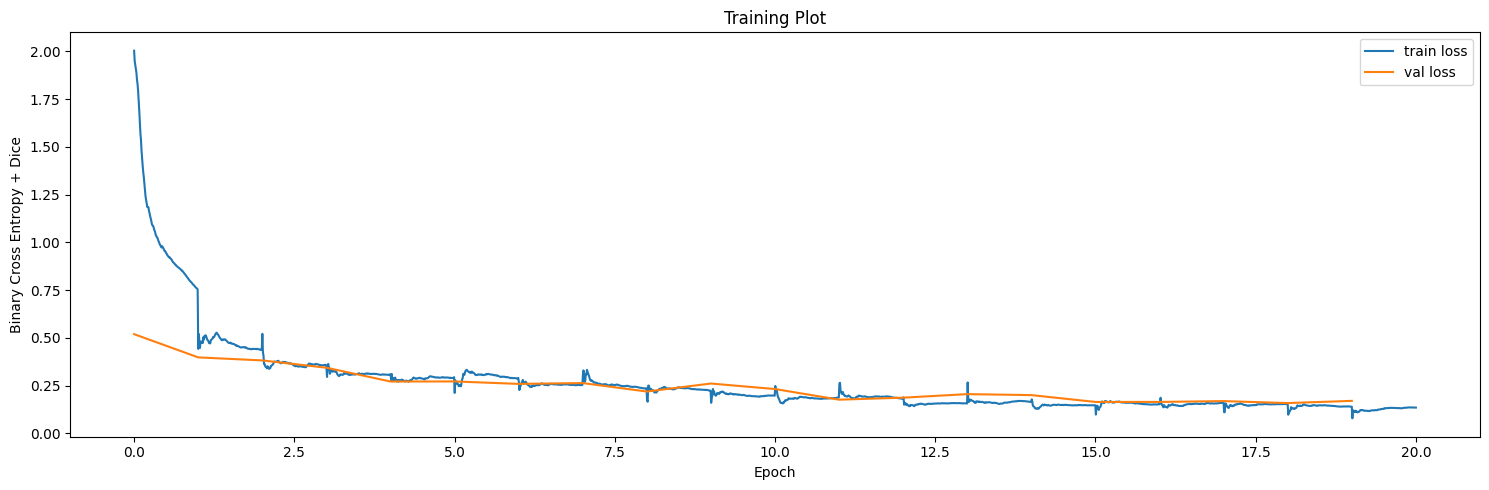

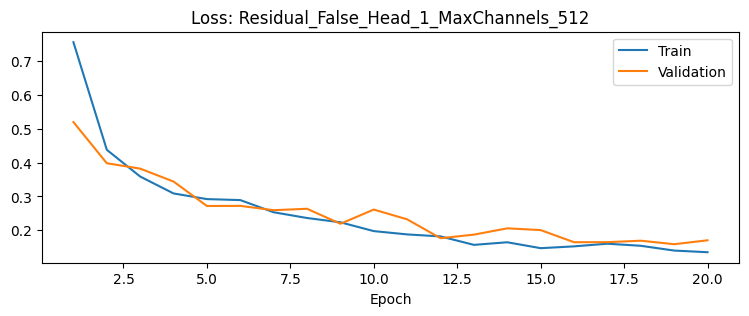

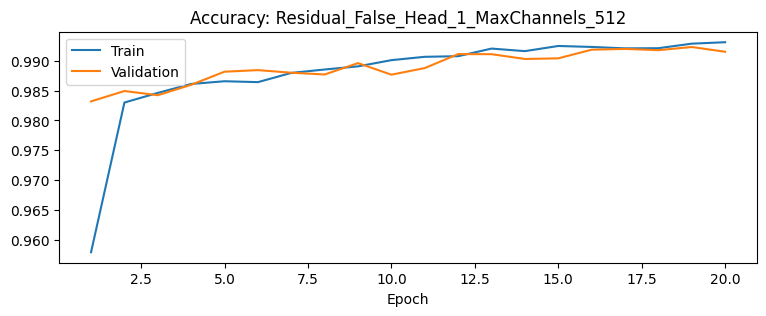

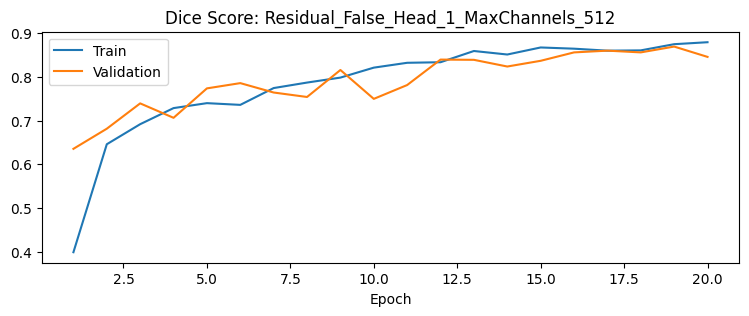

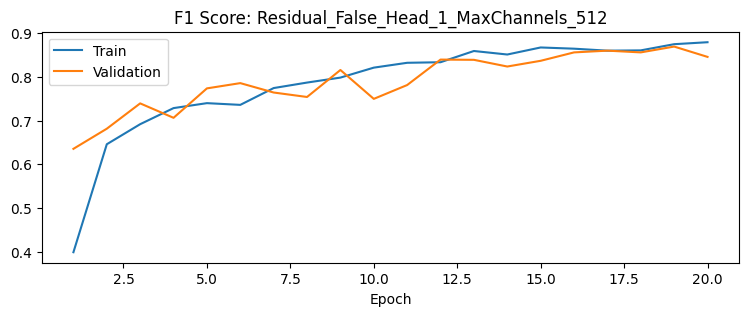

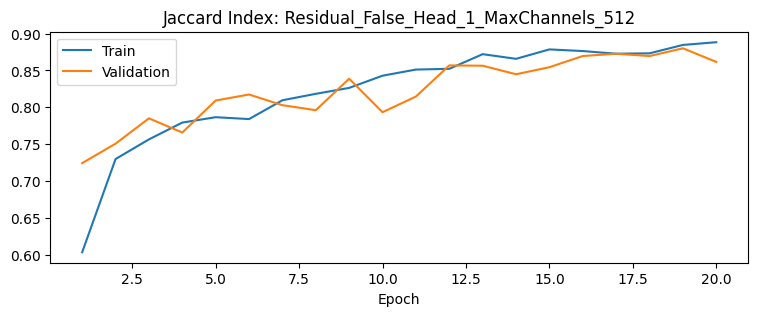

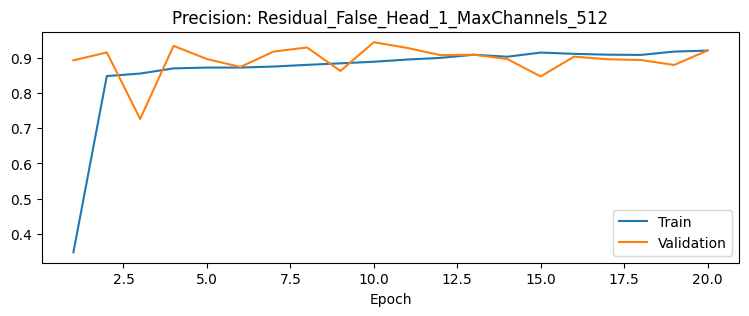

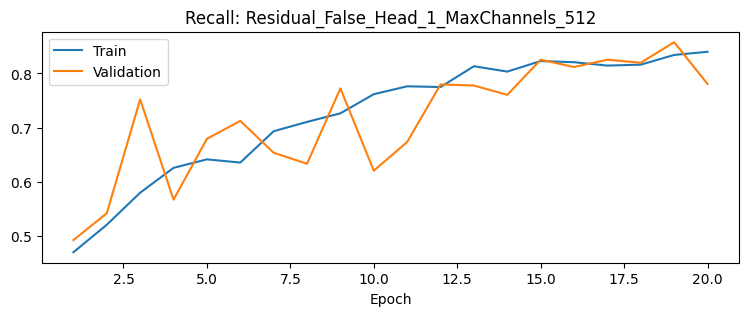

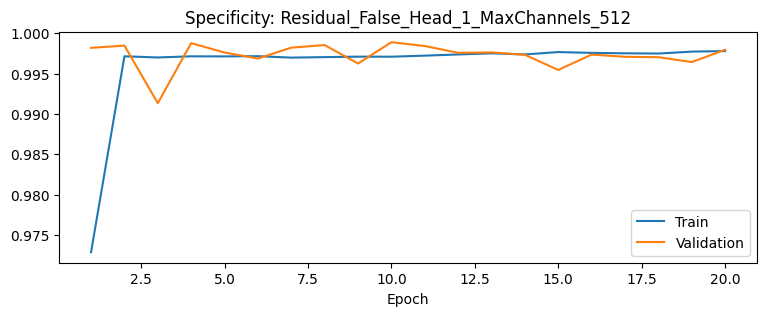

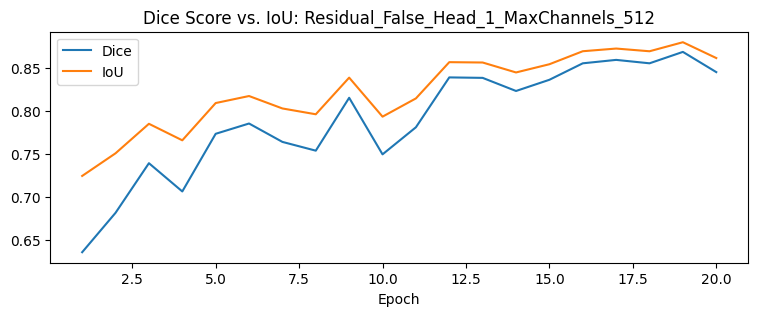

res_True_head_1_ch_128 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.05it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3543]


Training   - Accuracy: 0.9812 | Dice: 0.6040 | IoU: 0.7068 | Loss: 0.4543
Validation - Accuracy: 0.9861 | Dice: 0.7287 | IoU: 0.7795 | Loss: 0.3421

res_True_head_1_ch_128 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.03it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3414]


Training   - Accuracy: 0.9861 | Dice: 0.7296 | IoU: 0.7801 | Loss: 0.2995
Validation - Accuracy: 0.9865 | Dice: 0.7373 | IoU: 0.7851 | Loss: 0.3284

res_True_head_1_ch_128 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.05it/s, Acc=0.9840, Dice=0.3910, IoU=0.6135, Loss=0.2934]


Training   - Accuracy: 0.9869 | Dice: 0.7490 | IoU: 0.7927 | Loss: 0.2780
Validation - Accuracy: 0.9867 | Dice: 0.7852 | IoU: 0.8164 | Loss: 0.2897

res_True_head_1_ch_128 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.03it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3776]


Training   - Accuracy: 0.9888 | Dice: 0.7930 | IoU: 0.8228 | Loss: 0.2282
Validation - Accuracy: 0.9846 | Dice: 0.6580 | IoU: 0.7373 | Loss: 0.3654

res_True_head_1_ch_128 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.04it/s, Acc=0.9935, Dice=0.8232, IoU=0.8465, Loss=0.2350]


Training   - Accuracy: 0.9889 | Dice: 0.7967 | IoU: 0.8254 | Loss: 0.2229
Validation - Accuracy: 0.9891 | Dice: 0.7987 | IoU: 0.8269 | Loss: 0.2369

res_True_head_1_ch_128 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.05it/s, Acc=0.9868, Dice=0.5491, IoU=0.6826, Loss=0.2251]


Training   - Accuracy: 0.9897 | Dice: 0.8135 | IoU: 0.8376 | Loss: 0.2072
Validation - Accuracy: 0.9893 | Dice: 0.8205 | IoU: 0.8423 | Loss: 0.2243

res_True_head_1_ch_128 - Epoch 7/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.02it/s, Acc=0.9916, Dice=0.7566, IoU=0.8000, Loss=0.1933]

Training   - Accuracy: 0.9903 | Dice: 0.8233 | IoU: 0.8449 | Loss: 0.1916
Validation - Accuracy: 0.9904 | Dice: 0.8238 | IoU: 0.8453 | Loss: 0.1934

res_True_head_1_ch_128 - Epoch 8/20



Validation: 100%|██████████| 35/35 [00:08<00:00,  4.03it/s, Acc=0.9960, Dice=0.9027, IoU=0.9092, Loss=0.1899]


Training   - Accuracy: 0.9908 | Dice: 0.8343 | IoU: 0.8532 | Loss: 0.1847
Validation - Accuracy: 0.9905 | Dice: 0.8268 | IoU: 0.8475 | Loss: 0.1916

res_True_head_1_ch_128 - Epoch 9/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.07it/s, Acc=0.9958, Dice=0.8975, IoU=0.9049, Loss=0.1741]


Training   - Accuracy: 0.9914 | Dice: 0.8461 | IoU: 0.8622 | Loss: 0.1712
Validation - Accuracy: 0.9911 | Dice: 0.8377 | IoU: 0.8558 | Loss: 0.1753

res_True_head_1_ch_128 - Epoch 10/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.03it/s, Acc=0.9942, Dice=0.8465, IoU=0.8640, Loss=0.2114]


Training   - Accuracy: 0.9923 | Dice: 0.8636 | IoU: 0.8760 | Loss: 0.1498
Validation - Accuracy: 0.9895 | Dice: 0.7953 | IoU: 0.8248 | Loss: 0.2126

res_True_head_1_ch_128 - Epoch 11/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.04it/s, Acc=0.9926, Dice=0.7920, IoU=0.8241, Loss=0.1668]


Training   - Accuracy: 0.9919 | Dice: 0.8556 | IoU: 0.8696 | Loss: 0.1584
Validation - Accuracy: 0.9918 | Dice: 0.8543 | IoU: 0.8686 | Loss: 0.1665

res_True_head_1_ch_128 - Epoch 12/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.04it/s, Acc=0.9944, Dice=0.8558, IoU=0.8711, Loss=0.1558]


Training   - Accuracy: 0.9923 | Dice: 0.8634 | IoU: 0.8758 | Loss: 0.1505
Validation - Accuracy: 0.9921 | Dice: 0.8607 | IoU: 0.8737 | Loss: 0.1563

res_True_head_1_ch_128 - Epoch 13/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.05it/s, Acc=0.9942, Dice=0.8413, IoU=0.8601, Loss=0.1605]


Training   - Accuracy: 0.9930 | Dice: 0.8776 | IoU: 0.8874 | Loss: 0.1359
Validation - Accuracy: 0.9916 | Dice: 0.8445 | IoU: 0.8611 | Loss: 0.1609

res_True_head_1_ch_128 - Epoch 14/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.05it/s, Acc=0.9963, Dice=0.9086, IoU=0.9144, Loss=0.1522]


Training   - Accuracy: 0.9933 | Dice: 0.8826 | IoU: 0.8916 | Loss: 0.1295
Validation - Accuracy: 0.9925 | Dice: 0.8709 | IoU: 0.8818 | Loss: 0.1535

res_True_head_1_ch_128 - Epoch 15/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.04it/s, Acc=0.9966, Dice=0.9172, IoU=0.9218, Loss=0.1479]


Training   - Accuracy: 0.9934 | Dice: 0.8836 | IoU: 0.8924 | Loss: 0.1289
Validation - Accuracy: 0.9925 | Dice: 0.8677 | IoU: 0.8793 | Loss: 0.1490

res_True_head_1_ch_128 - Epoch 16/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.03it/s, Acc=0.9920, Dice=0.7712, IoU=0.8097, Loss=0.1580]


Training   - Accuracy: 0.9933 | Dice: 0.8824 | IoU: 0.8914 | Loss: 0.1327
Validation - Accuracy: 0.9919 | Dice: 0.8548 | IoU: 0.8691 | Loss: 0.1574

res_True_head_1_ch_128 - Epoch 17/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.03it/s, Acc=0.9865, Dice=0.5236, IoU=0.6705, Loss=0.2015]


Training   - Accuracy: 0.9920 | Dice: 0.8578 | IoU: 0.8714 | Loss: 0.1554
Validation - Accuracy: 0.9899 | Dice: 0.8028 | IoU: 0.8301 | Loss: 0.1982

res_True_head_1_ch_128 - Epoch 18/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.03it/s, Acc=0.9962, Dice=0.9046, IoU=0.9110, Loss=0.1497]


Training   - Accuracy: 0.9932 | Dice: 0.8801 | IoU: 0.8894 | Loss: 0.1342
Validation - Accuracy: 0.9920 | Dice: 0.8528 | IoU: 0.8676 | Loss: 0.1509

res_True_head_1_ch_128 - Epoch 19/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.04it/s, Acc=0.9971, Dice=0.9307, IoU=0.9337, Loss=0.1458]


Training   - Accuracy: 0.9939 | Dice: 0.8936 | IoU: 0.9007 | Loss: 0.1182
Validation - Accuracy: 0.9926 | Dice: 0.8692 | IoU: 0.8806 | Loss: 0.1471

res_True_head_1_ch_128 - Epoch 20/20


Validation: 100%|██████████| 35/35 [00:08<00:00,  4.05it/s, Acc=0.9957, Dice=0.8889, IoU=0.8978, Loss=0.1426]


Training   - Accuracy: 0.9934 | Dice: 0.8833 | IoU: 0.8921 | Loss: 0.1293
Validation - Accuracy: 0.9927 | Dice: 0.8712 | IoU: 0.8821 | Loss: 0.1435



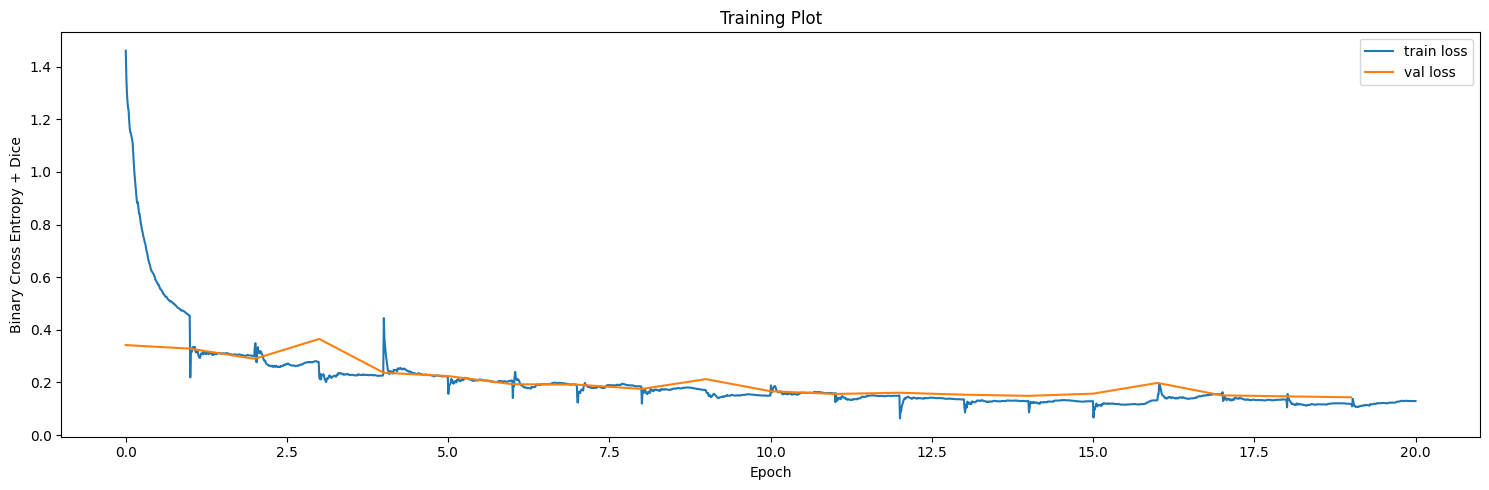

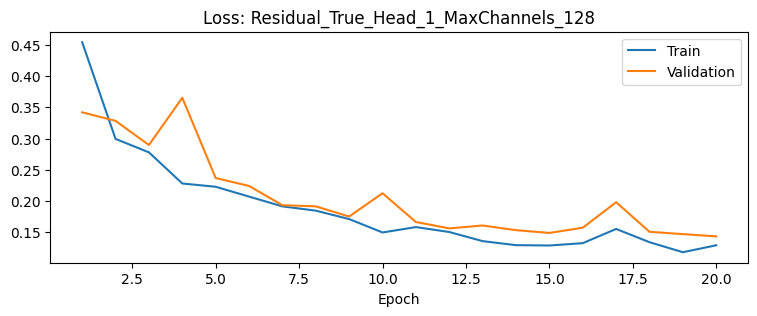

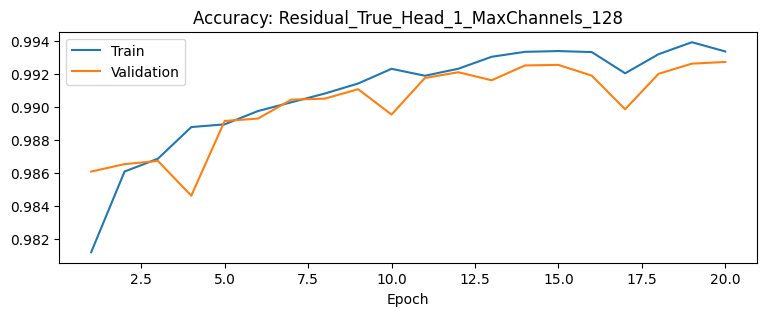

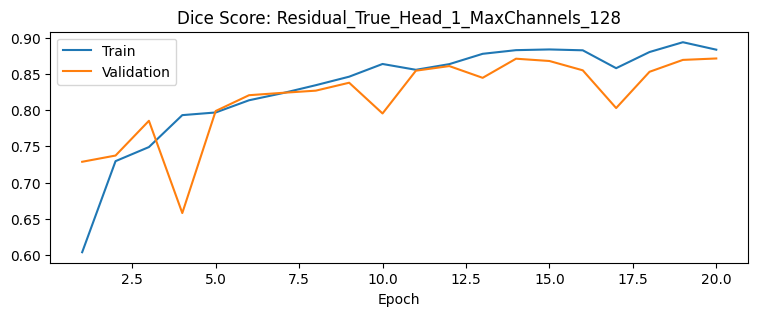

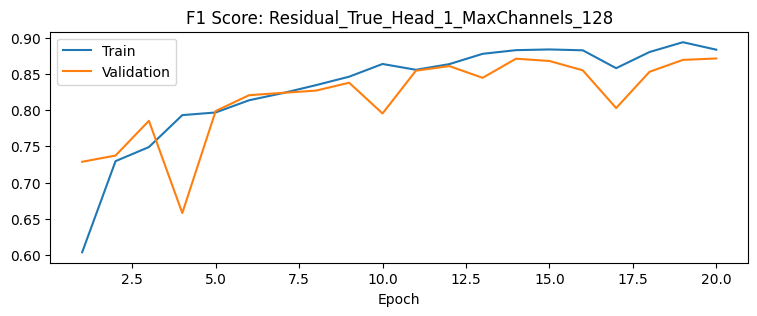

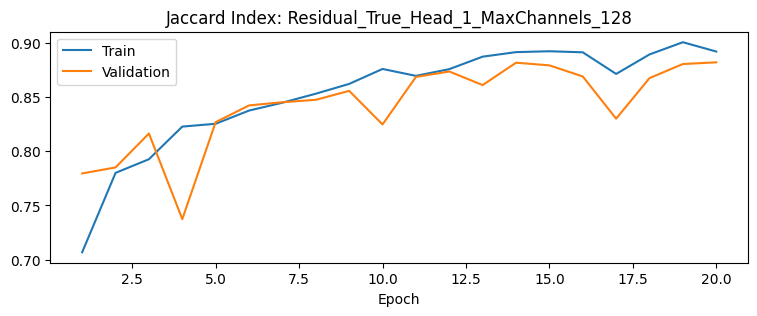

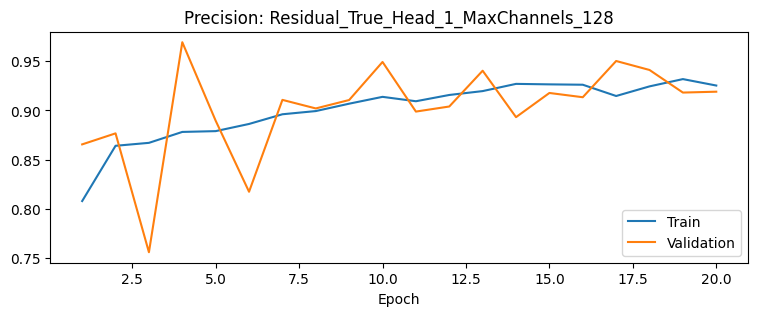

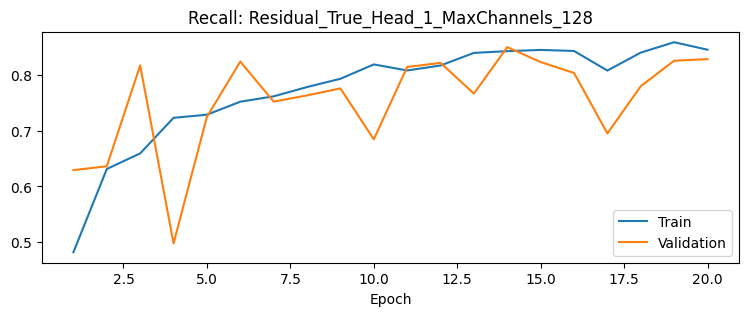

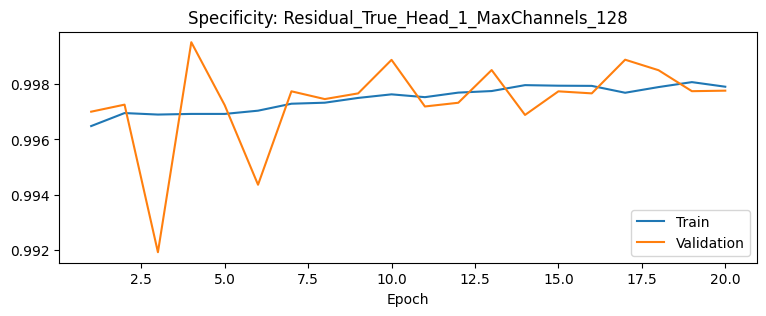

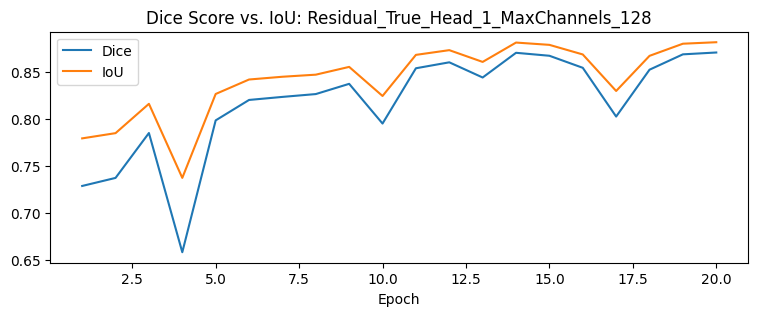

res_True_head_1_ch_256 - Epoch 1/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.24it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3465]


Training   - Accuracy: 0.9756 | Dice: 0.5216 | IoU: 0.6641 | Loss: 0.5165
Validation - Accuracy: 0.9865 | Dice: 0.7355 | IoU: 0.7840 | Loss: 0.3331

res_True_head_1_ch_256 - Epoch 2/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.3008]


Training   - Accuracy: 0.9860 | Dice: 0.7272 | IoU: 0.7785 | Loss: 0.3015
Validation - Accuracy: 0.9877 | Dice: 0.7672 | IoU: 0.8049 | Loss: 0.2878

res_True_head_1_ch_256 - Epoch 3/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s, Acc=0.9790, Dice=0.0000, IoU=0.4895, Loss=0.2947]


Training   - Accuracy: 0.9869 | Dice: 0.7486 | IoU: 0.7925 | Loss: 0.2791
Validation - Accuracy: 0.9877 | Dice: 0.7645 | IoU: 0.8031 | Loss: 0.2808

res_True_head_1_ch_256 - Epoch 4/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.24it/s, Acc=0.9826, Dice=0.2968, IoU=0.5784, Loss=0.2433]


Training   - Accuracy: 0.9876 | Dice: 0.7660 | IoU: 0.8041 | Loss: 0.2620
Validation - Accuracy: 0.9890 | Dice: 0.7956 | IoU: 0.8246 | Loss: 0.2382

res_True_head_1_ch_256 - Epoch 5/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s, Acc=0.9884, Dice=0.6259, IoU=0.7219, Loss=0.2034]


Training   - Accuracy: 0.9890 | Dice: 0.7974 | IoU: 0.8259 | Loss: 0.2203
Validation - Accuracy: 0.9903 | Dice: 0.8265 | IoU: 0.8472 | Loss: 0.2025

res_True_head_1_ch_256 - Epoch 6/20


Validation: 100%|██████████| 35/35 [00:10<00:00,  3.23it/s, Acc=0.9939, Dice=0.8369, IoU=0.8566, Loss=0.2383]


Training   - Accuracy: 0.9897 | Dice: 0.8111 | IoU: 0.8358 | Loss: 0.2103
Validation - Accuracy: 0.9879 | Dice: 0.7558 | IoU: 0.7976 | Loss: 0.2403

res_True_head_1_ch_256 - Epoch 7/20


Training:  53%|█████▎    | 59/112 [00:34<00:31,  1.70it/s, Acc=0.9935, Dice=0.8349, IoU=0.8550, Loss=0.1942]


KeyboardInterrupt: 

In [9]:
best_model = None
best_dice_score = 0.0
best_train_loss_batch_history = None
best_train_loss_history = None
best_val_loss_history = None
best_train_metrics = None
best_val_metrics = None

seed = 42
epochs = 20
channels = (3, 32, 64, 128, 256, 512)
is_residual = True
bias = True
heads = 4
learning_rate = 1e-3
weight_decay = 1e-5
lr_reduce_factor = 0.15
patience = 2
model_name = 'TransformerUNet'

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

channels = [[3, 32, 64, 128], [3, 32, 64, 128, 256], [3, 32, 64, 128, 256, 512]]
residuals = [False, True]
all_heads = [1]

for res in residuals:
    for head in all_heads:
        for ch in channels:
            model_path = f'res_{res}_head_{head}_ch_{ch[-1]}'
            model = TransformerUNetParallel(ch, head, size[0], res, bias)
            criterion = DiceBCELoss('cuda:0').to(device='cuda:0')
            optimizer = torch.optim.Adam(model.parameters())
            # scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=lr_reduce_factor, patience=patience)
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-6)

            solver = Solver(
                model,
                epochs,
                device,
                train_loader,
                val_loader,
                criterion,
                optimizer,
                scheduler,
                model_name,
                model_path
            )

            solver.fit()
        
            best_train_loss_batch_history = solver.train_loss_batch
            best_train_loss_history = solver.train_loss_history
            best_val_loss_history = solver.val_loss_history
            best_train_metrics = solver.train_metrics
            best_val_metrics = solver.val_metrics

            plot_path = f'saved_plots/{model_name}/{model_path}'
            title = f'Residual_{res}_Head_{head}_MaxChannels_{ch[-1]}'
            plot_losses(best_train_loss_batch_history, best_val_loss_history, f'{plot_path}_train.png')
            train_metrics_acc = best_train_metrics.get_metrics()
            val_metrics_acc = best_val_metrics.get_metrics()

            plot_generic(f'Loss: {title}', 'Epoch', 'Train', best_train_loss_history, 'Validation', best_val_loss_history, f'{plot_path}_Loss.png')
            plot_generic(f'Accuracy: {title}', 'Epoch', 'Train', train_metrics_acc[ACCURACY], 'Validation', val_metrics_acc[ACCURACY], f'{plot_path}_Accuracy.png')
            plot_generic(f'Dice Score: {title}', 'Epoch', 'Train', train_metrics_acc[DICE_SCORE], 'Validation', val_metrics_acc[DICE_SCORE], f'{plot_path}_Dice.png')
            plot_generic(f'F1 Score: {title}', 'Epoch', 'Train', train_metrics_acc[F1_SCORE], 'Validation', val_metrics_acc[F1_SCORE], f'{plot_path}_F1.png')
            plot_generic(f'Jaccard Index: {title}', 'Epoch', 'Train', train_metrics_acc[JACCARD_INDEX], 'Validation', val_metrics_acc[JACCARD_INDEX], f'{plot_path}_IoU.png')
            plot_generic(f'Precision: {title}', 'Epoch', 'Train', train_metrics_acc[PRECISION], 'Validation', val_metrics_acc[PRECISION], f'{plot_path}_Precision.png')
            plot_generic(f'Recall: {title}', 'Epoch', 'Train', train_metrics_acc[RECALL], 'Validation', val_metrics_acc[RECALL], f'{plot_path}_Recall.png')
            plot_generic(f'Specificity: {title}', 'Epoch', 'Train', train_metrics_acc[SPECIFICITY], 'Validation', val_metrics_acc[SPECIFICITY], f'{plot_path}_Specifity.png')
            plot_generic(f'Dice Score vs. IoU: {title}', 'Epoch', 'Dice', val_metrics_acc[DICE_SCORE], 'IoU', val_metrics_acc[JACCARD_INDEX], f'{plot_path}_DiceVsIoU.png')

            #if solver.best_dice_score > best_dice_score:
                #best_model = solver.best_model
                #best_dice_score = solver.best_dice_score
                #best_train_loss_batch_history = solver.train_loss_batch
                #best_train_loss_history = solver.train_loss_history
                #best_val_loss_history = solver.val_loss_history
                #best_train_metrics = solver.train_metrics
                #best_val_metrics = solver.val_metrics
                #best_train_loss = solver.best_train_loss
                #best_val_loss = solver.best_val_loss
                #torch.save(best_model, f'saved_models/{model_name}/Dice_{best_dice_score:.4f}_lr_{learning_rate}_train_loss_{best_train_loss:.4f}_val_loss_{best_val_loss:.4f}_heads_{heads}_ch_{channels[-1]}.pt')


In [17]:
test_metrics_acc = Metrics(device, 2)
criterion = DiceBCELoss(device).to(device=device)
model_test = '19_TDice_0.9029_VDice_0.8925_TLoss_0.1086_VLoss_0.1238.pt'
test_loss = solver.evaluate(torch.load(f'../saved_models/TransformerUNet/res_True_head_2_ch_512/{model_test}'), criterion, device, val_loader, test_metrics_acc)
test_metrics_acc.compute()
test_metrics_acc = test_metrics_acc.get_metrics()
print(f'Acc: {test_metrics_acc[ACCURACY][0].item():.4f}')
print(f'Dice: {test_metrics_acc[DICE_SCORE][0].item():.4f}')
print(f'F1: {test_metrics_acc[F1_SCORE][0].item():.4f}')
print(f'IoU: {test_metrics_acc[JACCARD_INDEX][0].item():.4f}')
print(f'Prec: {test_metrics_acc[PRECISION][0].item():.4f}')
print(f'RECALL: {test_metrics_acc[RECALL][0].item():.4f}')
print(f'SPECIFICITY: {test_metrics_acc[SPECIFICITY][0].item():.4f}')

Validation: 100%|██████████| 35/35 [00:12<00:00,  2.75it/s, Acc=0.9968, Dice=0.9198, IoU=0.9241, Loss=0.1229]

Acc: 0.9939
Dice: 0.8925
F1: 0.8925
IoU: 0.8998
Prec: 0.9289
RECALL: 0.8589
SPECIFICITY: 0.9980


In [56]:
def plot_images(test_image, predicted_mask, ground_truth):
    test_image = test_image.permute(1, 2, 0).detach().cpu().numpy()
    predicted_mask = predicted_mask.permute(1, 2, 0).detach().cpu().numpy()
    ground_truth = ground_truth.permute(1, 2, 0).detach().cpu().numpy()
    plt.figure(figsize=(20, 20))

    plt.subplot(1, 3, 1)
    plt.imshow(test_image)
    plt.title('Image')

    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth)
    plt.title('Ground truth mask')

    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask)
    plt.title('Predicted mask')

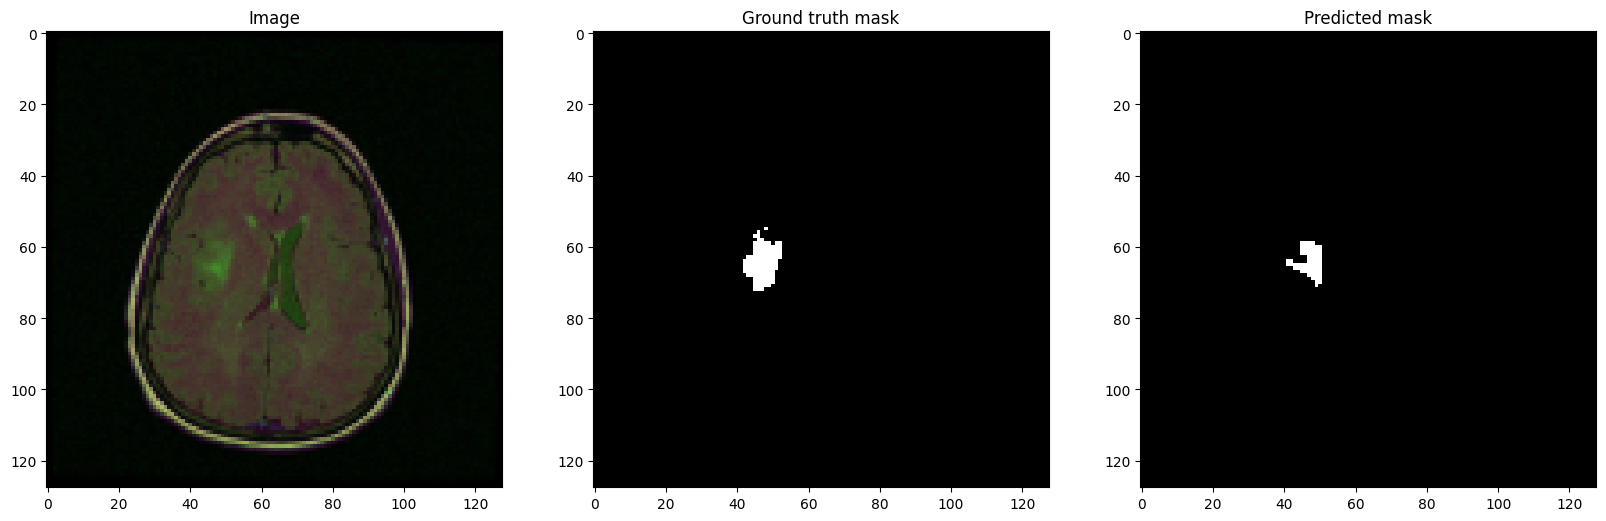

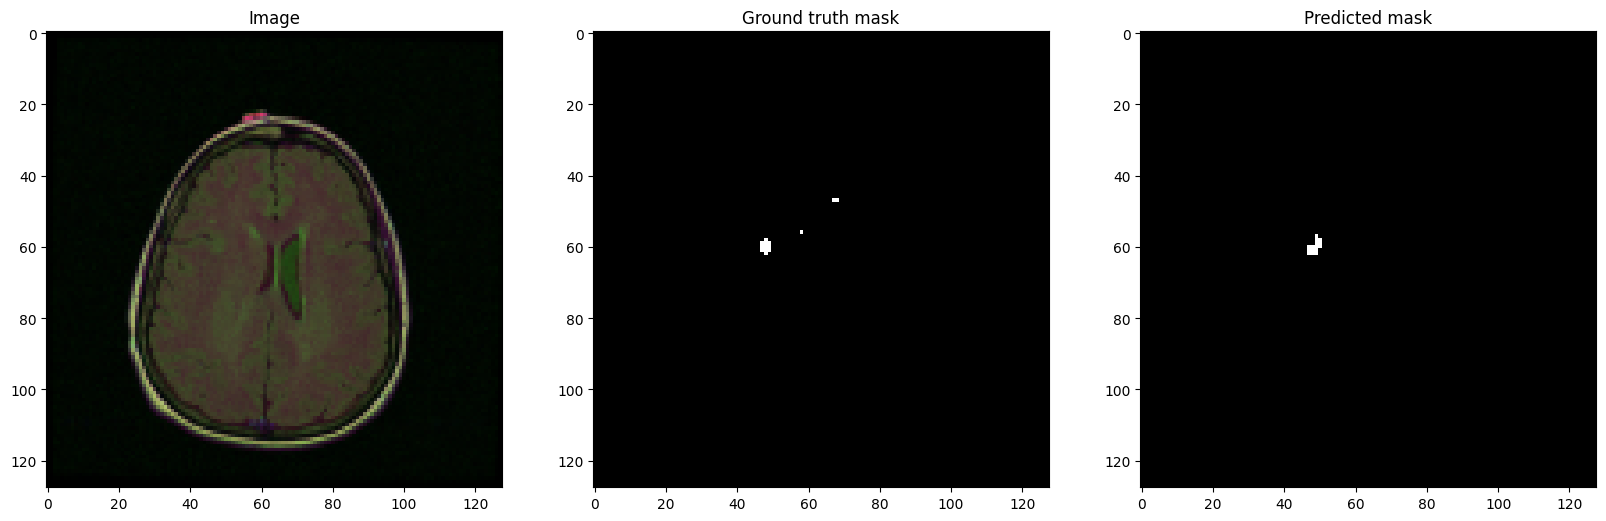

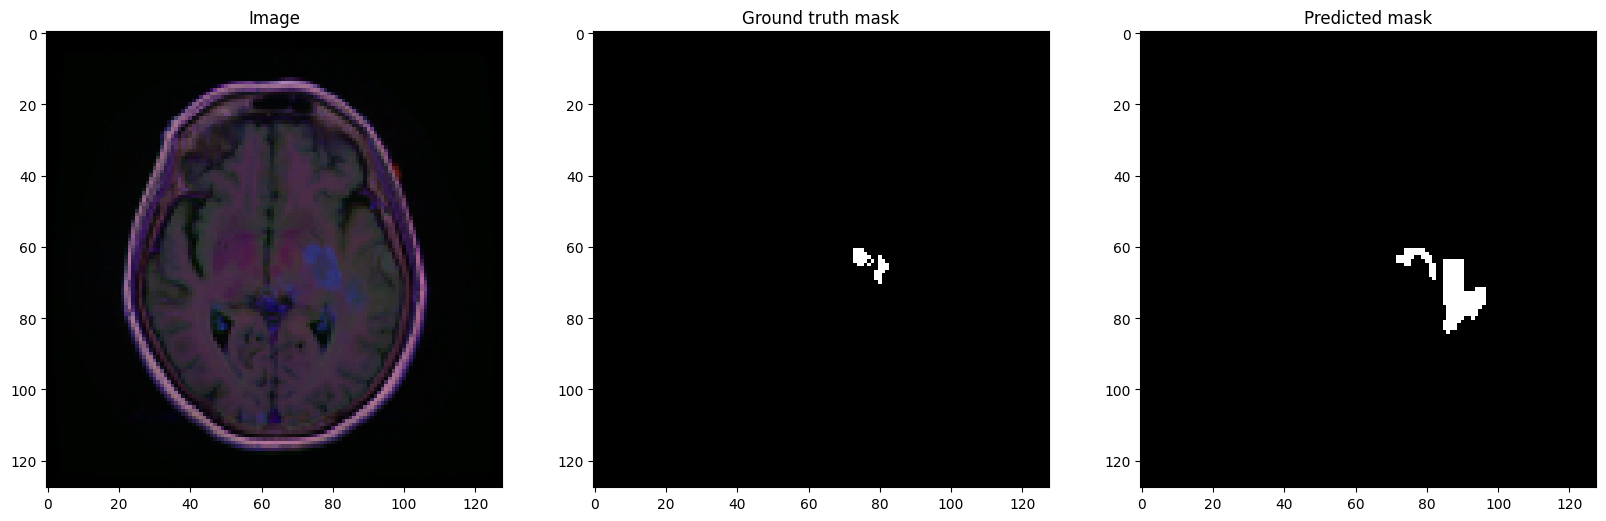

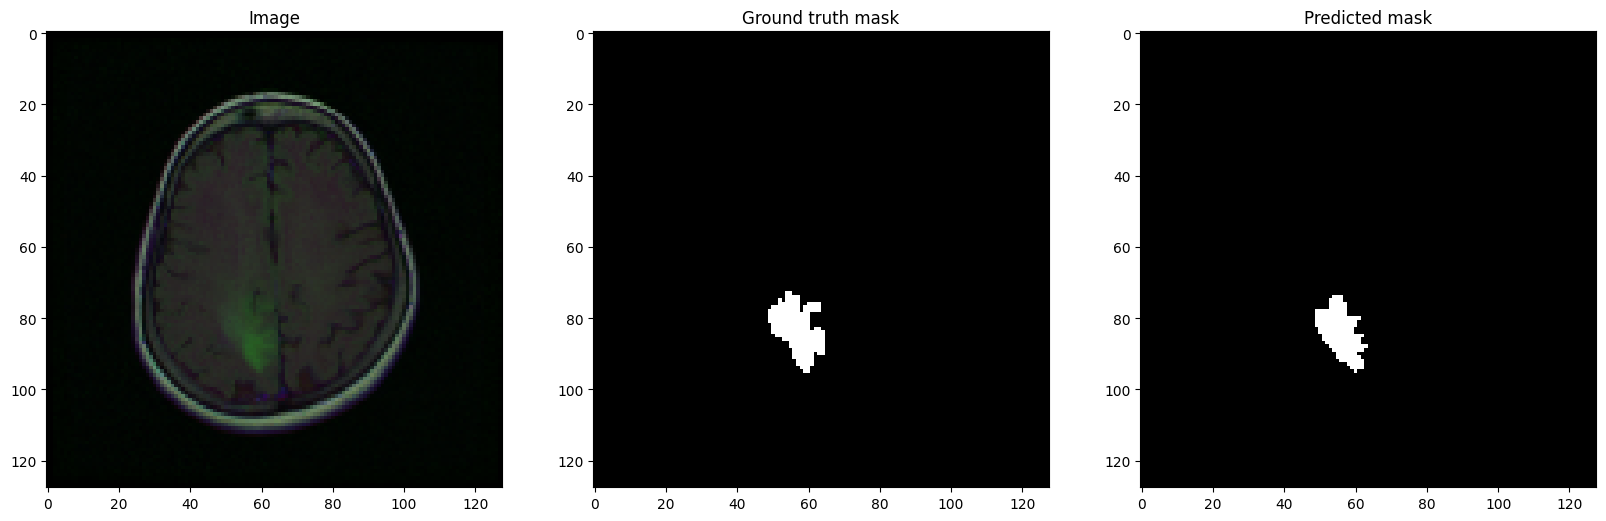

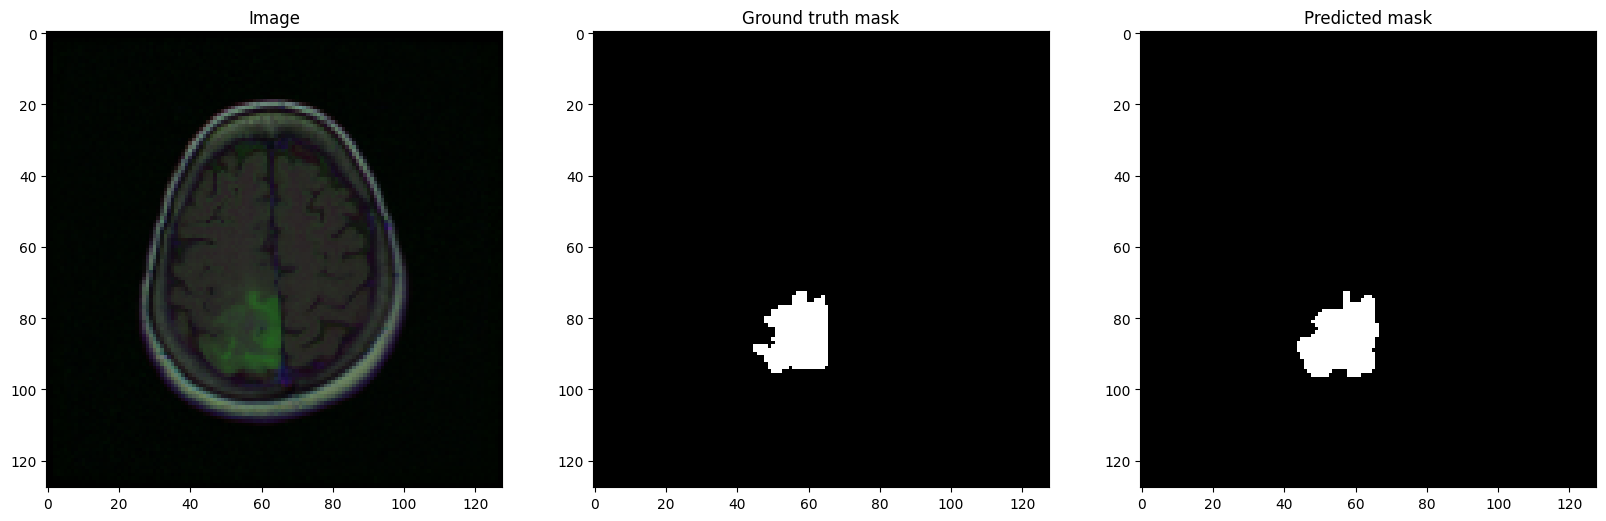

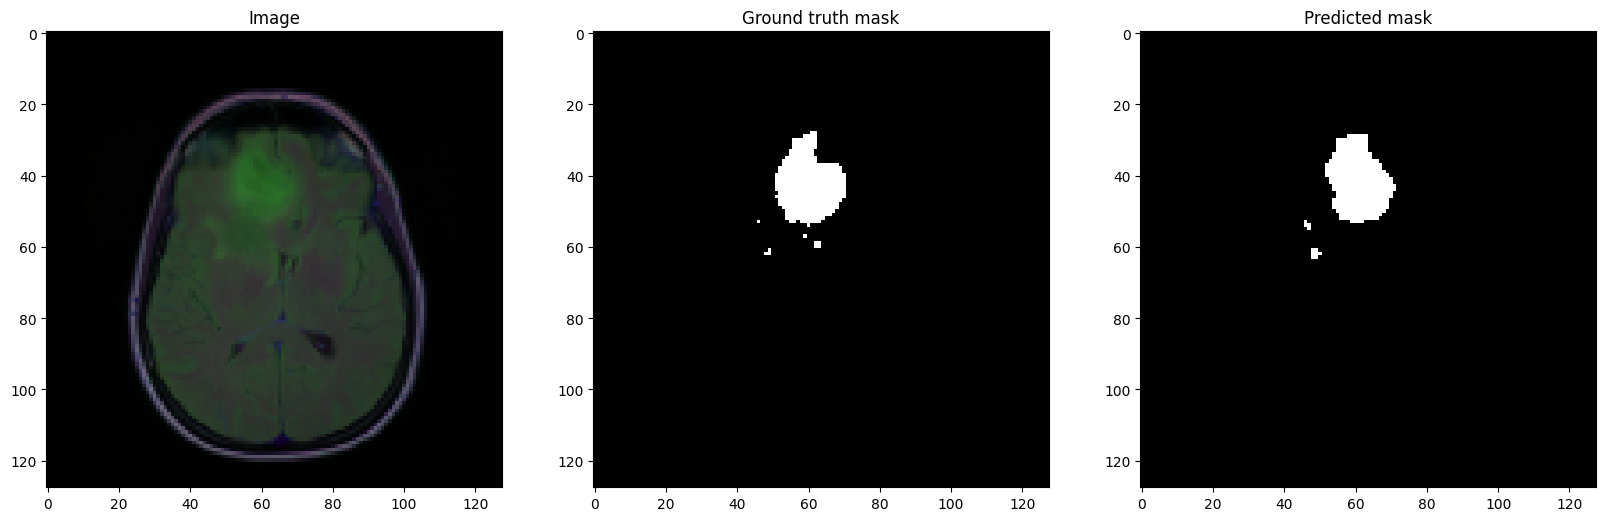

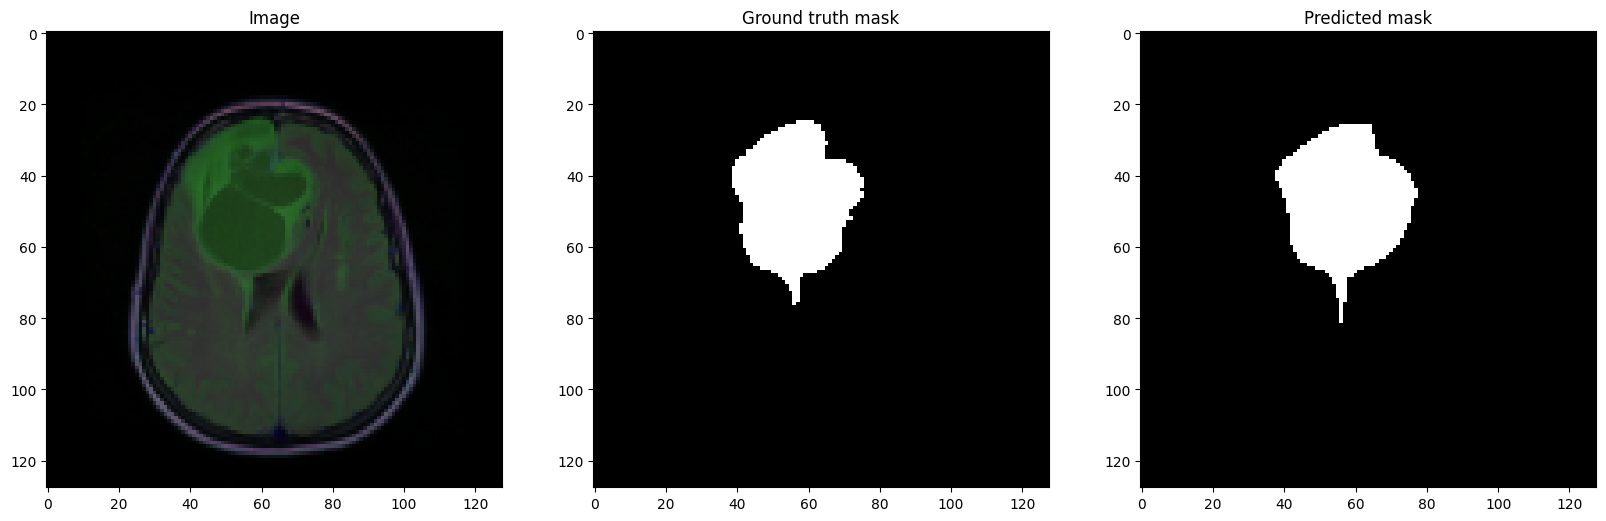

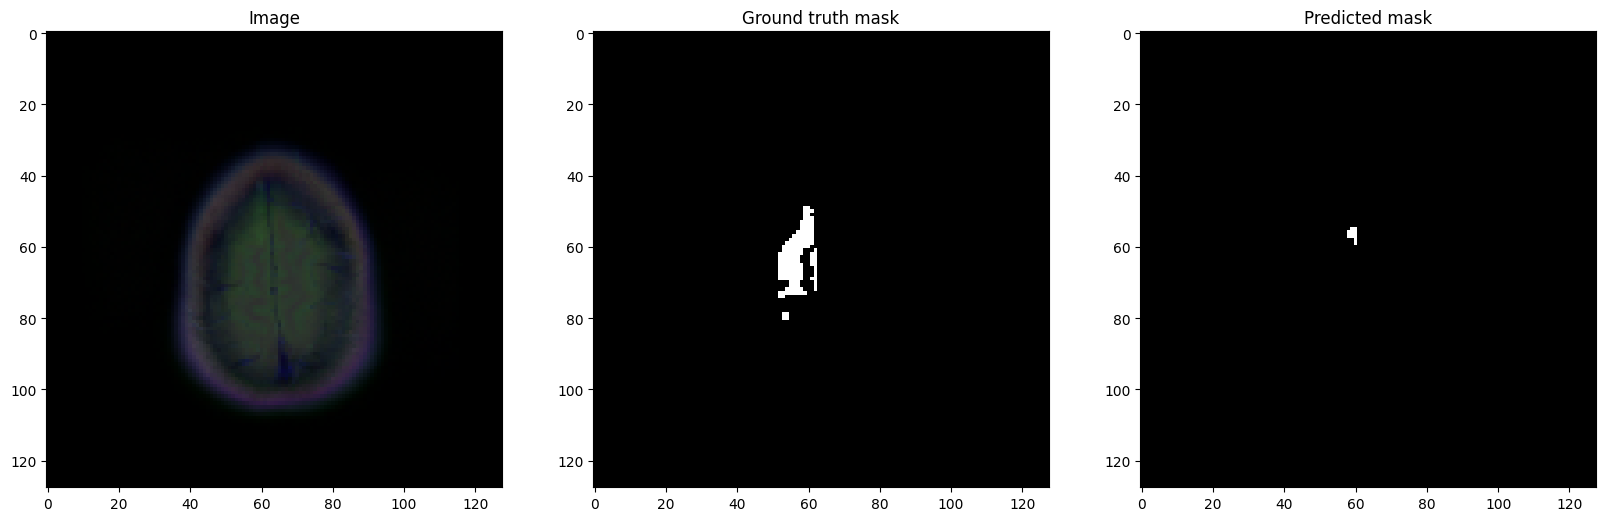

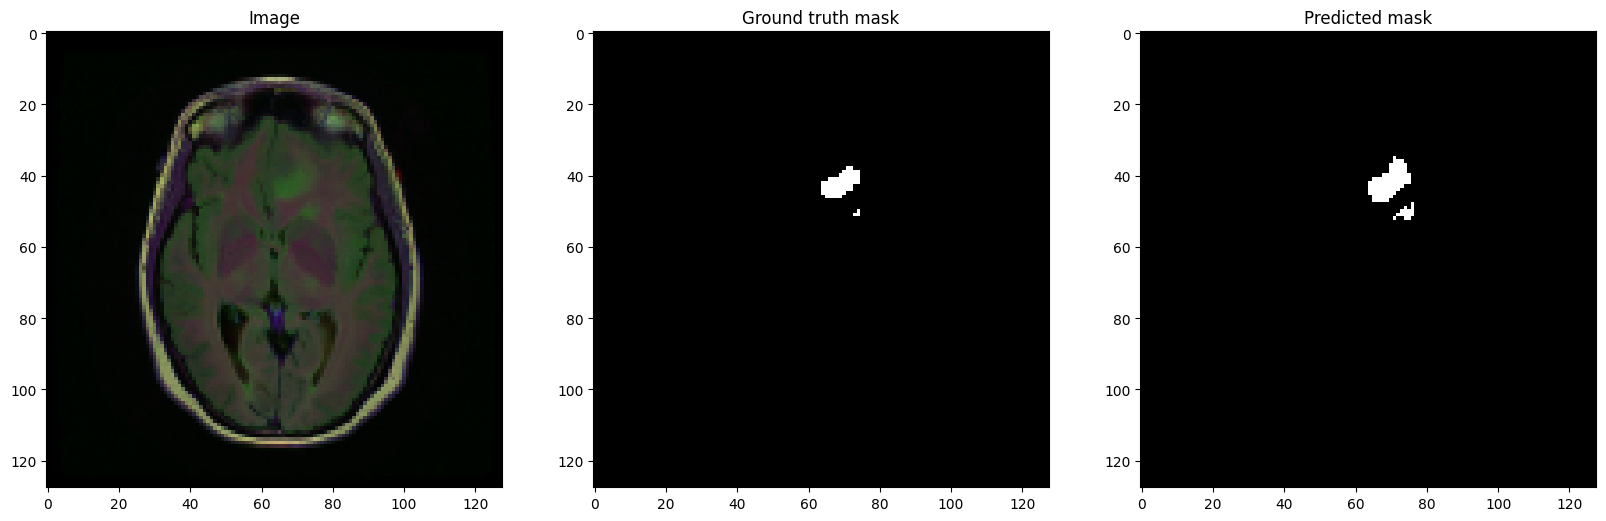

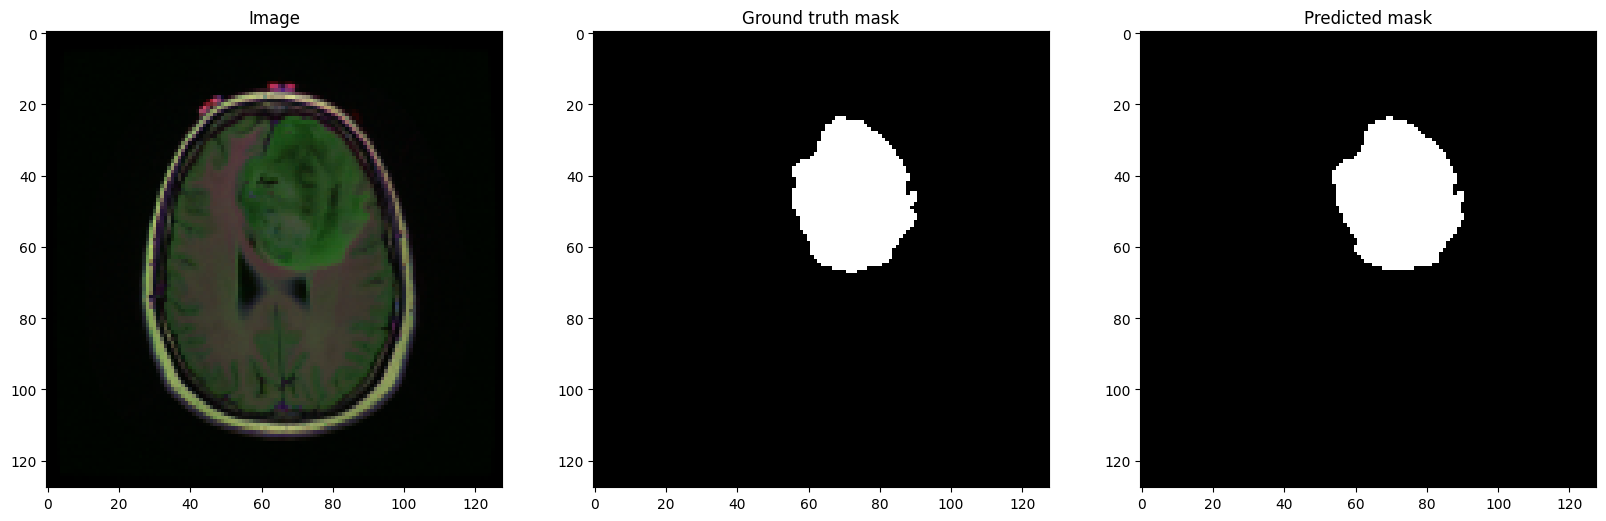

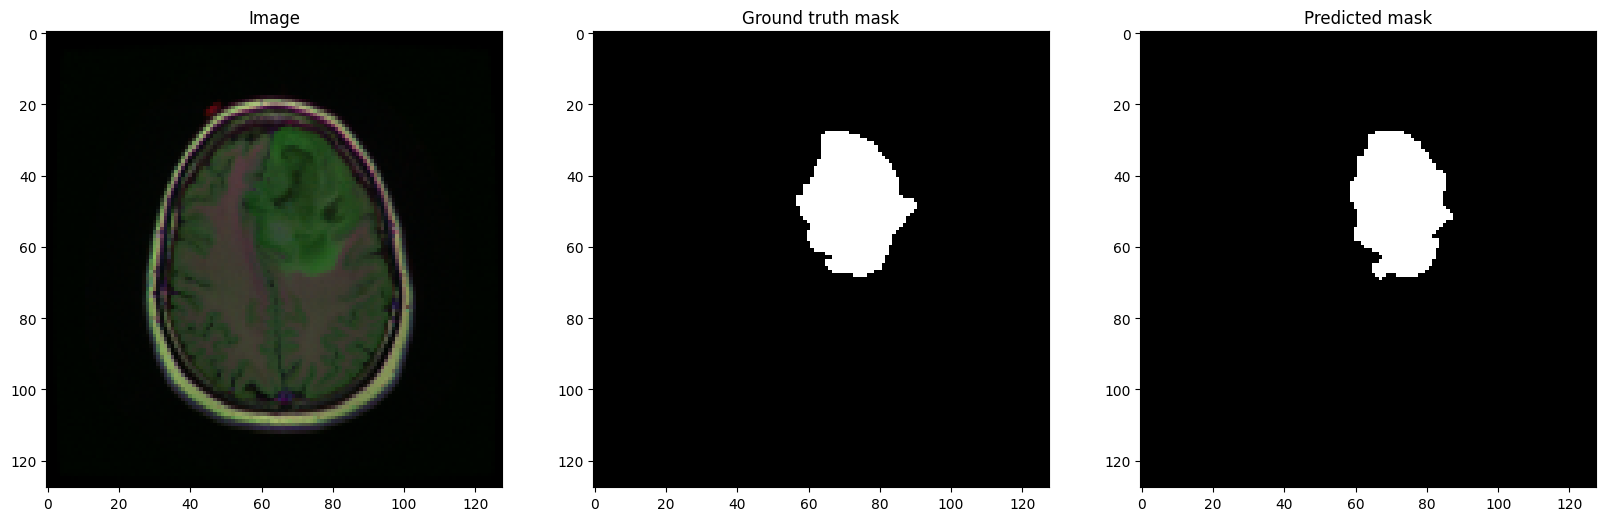

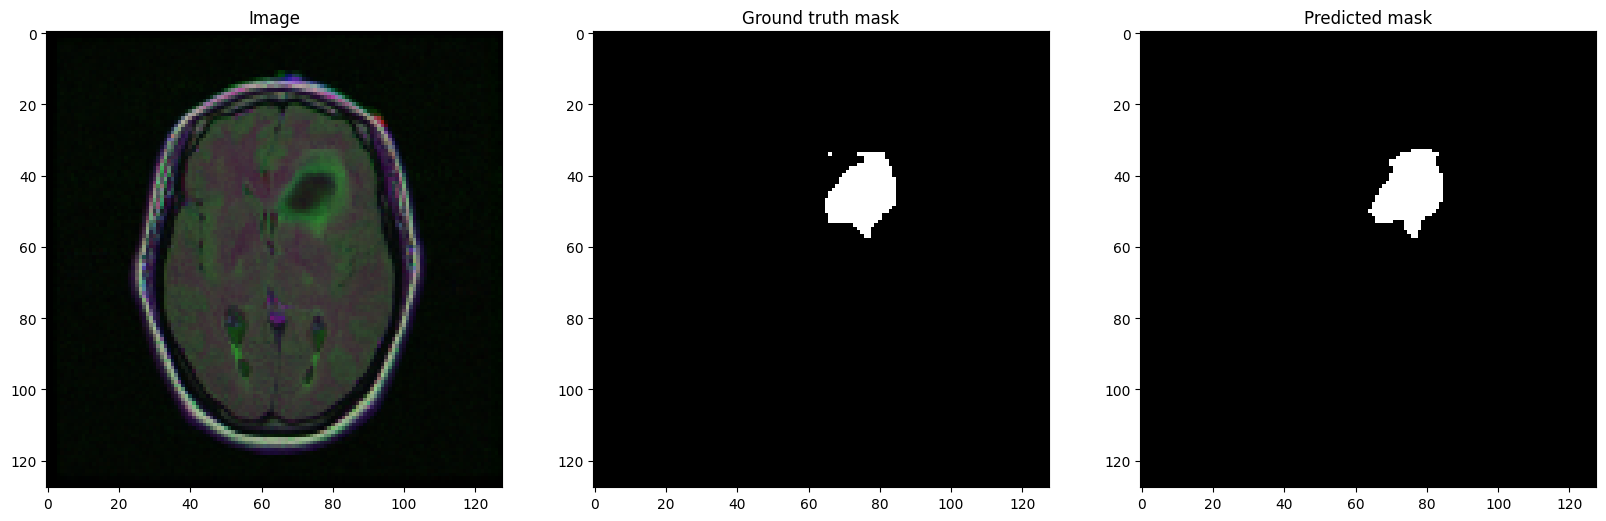

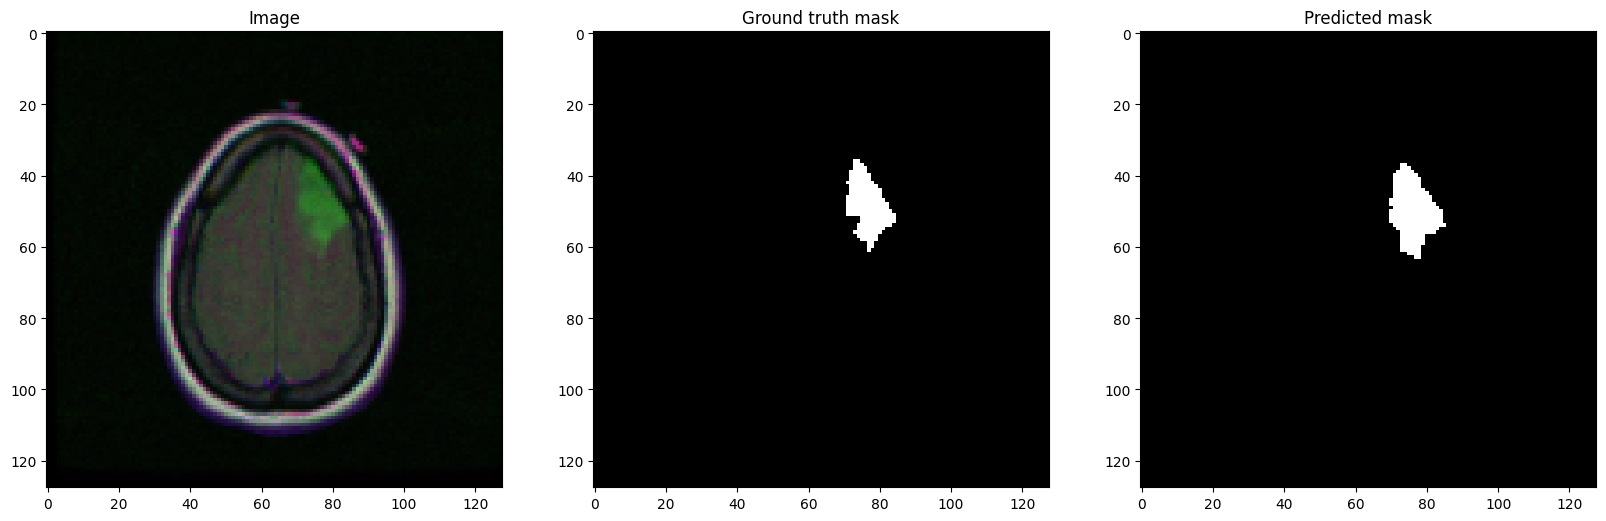

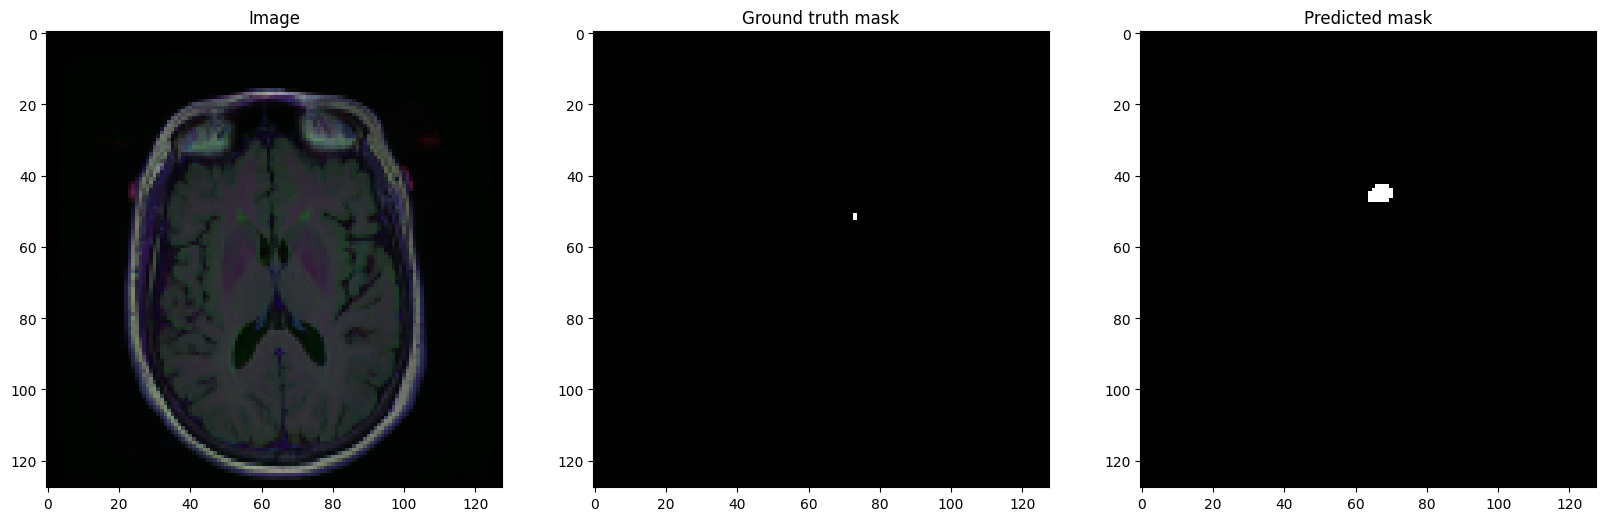

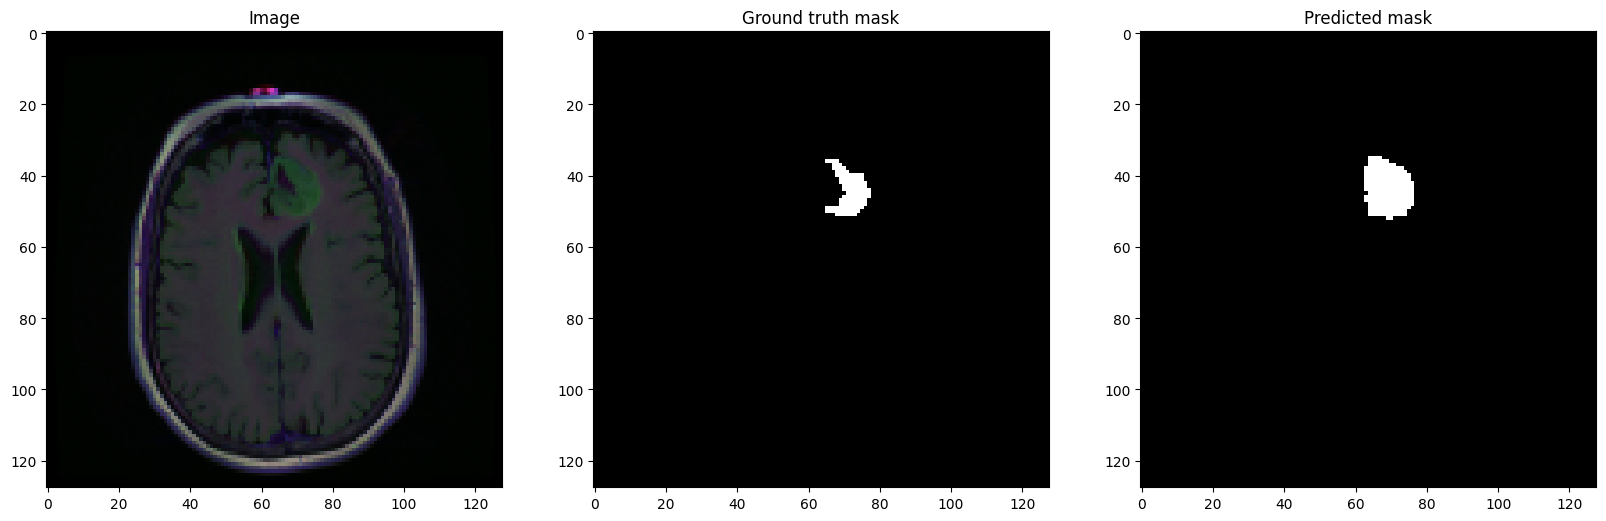

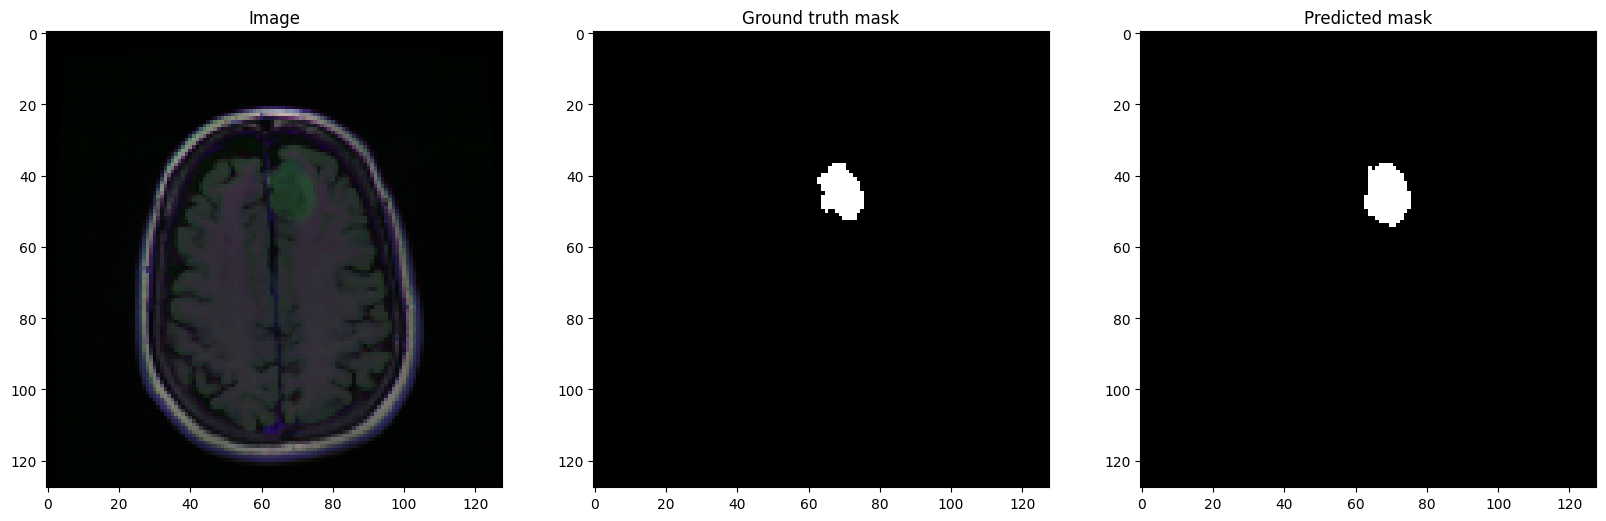

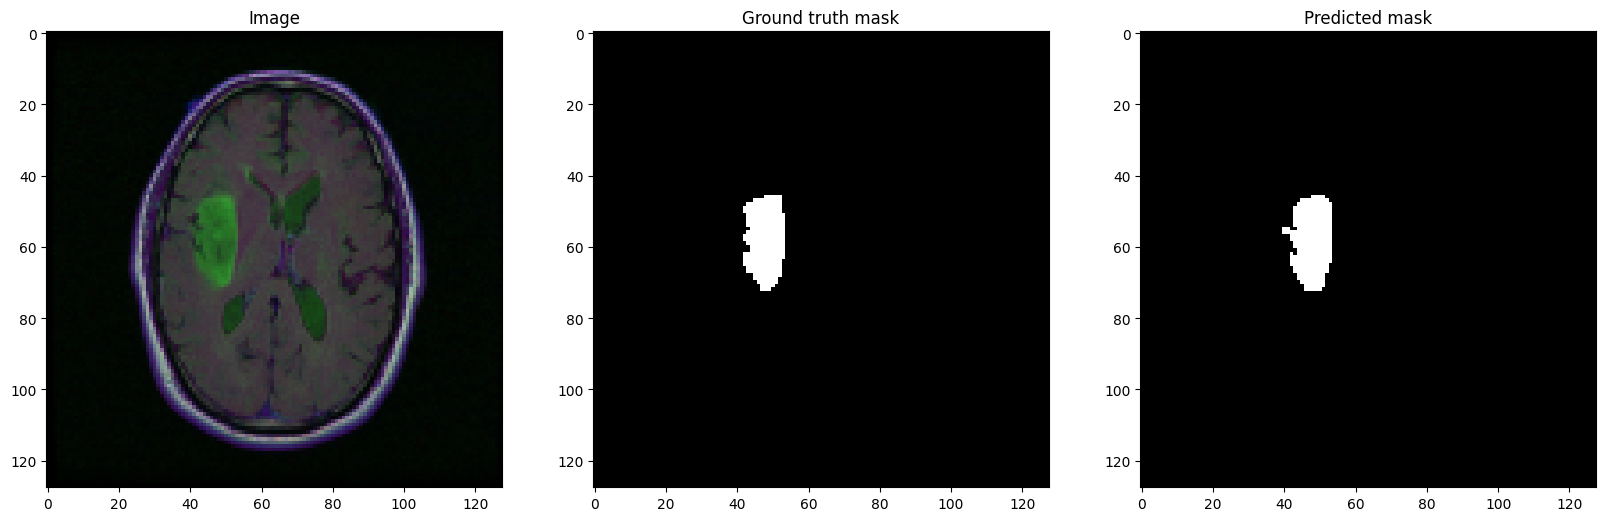

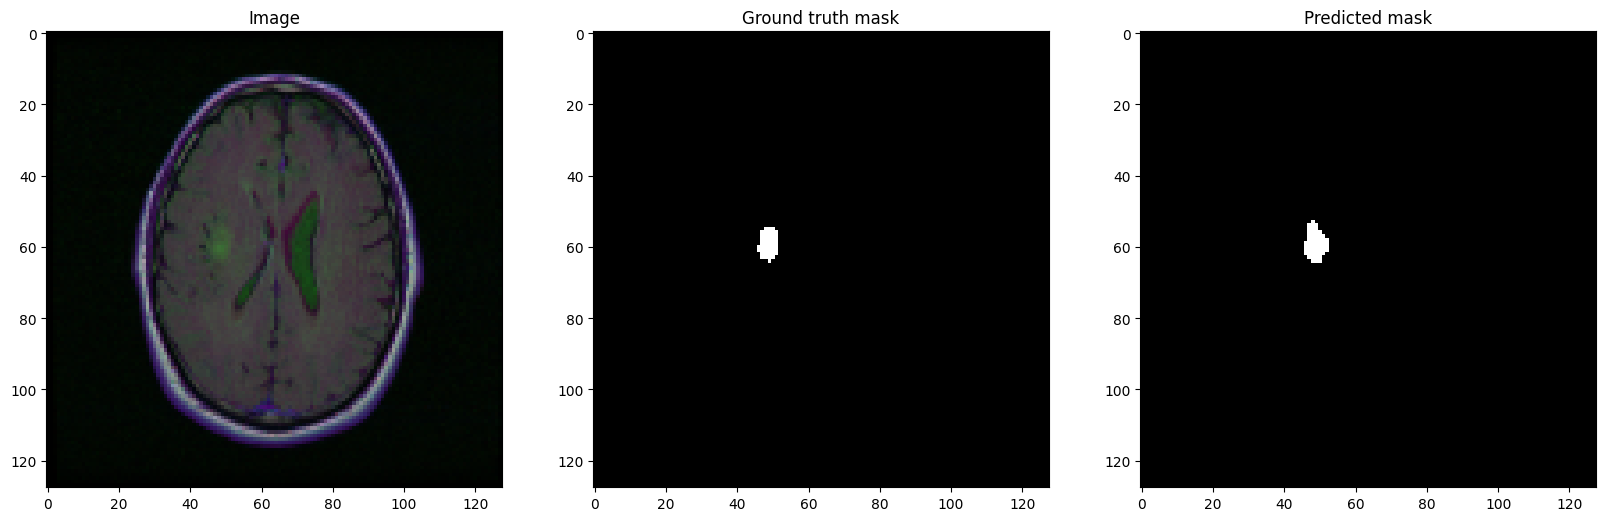

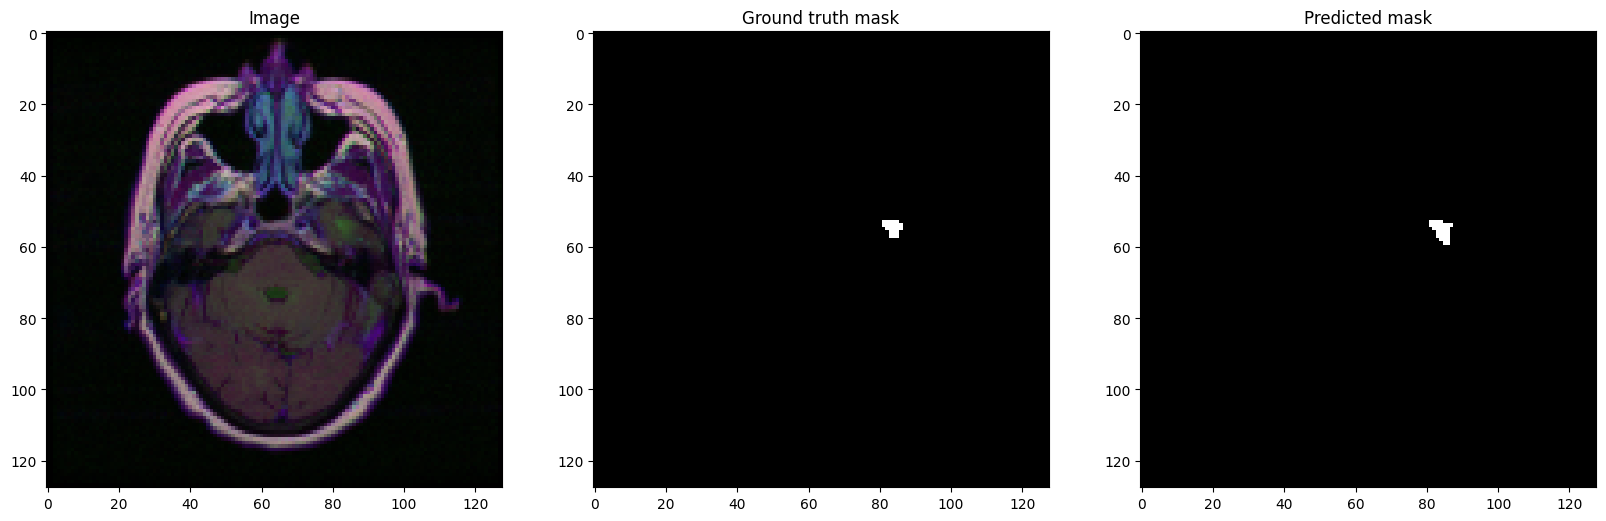

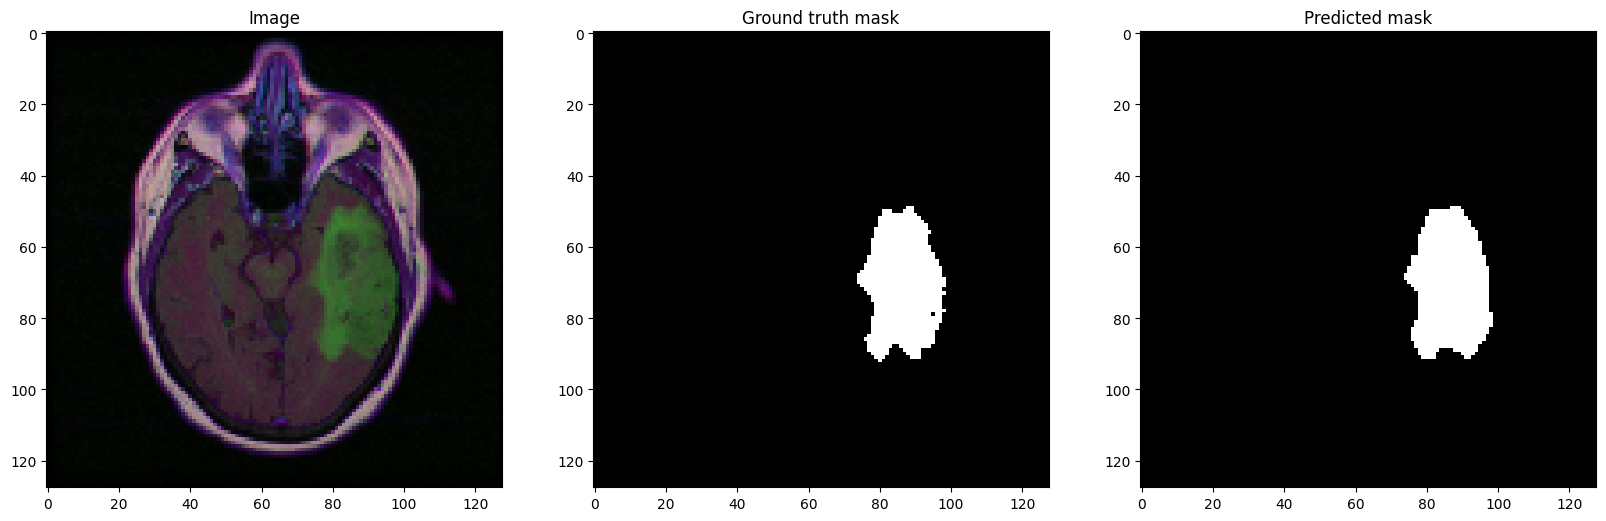

In [55]:
# load_model = torch.load(f'../saved_models/TransformerUNet/res_True_head_2_ch_512/{model_test}')
load_model.eval()
for idx in range(20, 40):
    plot_images(test_loader.dataset[idx][0], test_loader.dataset[idx][1], torch.round(torch.sigmoid(load_model(torch.unsqueeze(test_loader.dataset[idx][0], dim=0)).squeeze(dim=0))))

torch.Size([128, 128, 3])

torch.Size([1, 128, 128])